# Analysis of the marketing campaign of an entertainment application

### Introduction

#### Brief description, goal and tasks of the project

Datasets for analysis were provided by the educational service Yandex Practicum.

Brief description: despite huge investments in advertising, the company has been suffering losses for the last few months.\
The goal is to understand the reasons and help the company to come in positive.

We have data about users attracted from May 1 to October 27, 2019:
* server log with data about their visits,
* data about their purchases for this period,
* advertising expenses.

The following tasks are to be solved:
* find out where do users come from and what devices they use,
* how much does it cost to attract users from various advertising channels;
* how much money does each client bring,
* in which case the costs of attracting clients pays off,
* what factors hinder the attraction of customers.

#### Data description

We have three datasets: 
* "visits_info_short.csv" file stores the server log with information about site visits;
* "orders_info_short.csv" file — information about orders;
* "costs_info_short.csv" file — information about advertising expenses.

**Structure of "visits_info_short.csv":**
* User Id — unique identifier of user,
* Region — country of user,
* Device — type of user device,
* Channel — id of source of customer engagement,
* Session Start — date and time of start of visitor's session on website,
* Session End — date and time of end of visitor's session on website.

**Structure of orders_info_short.csv:**
* User Id — unique identifier of user,
* Event Dt — date and time of visitor's purchase on website,
* Revenue — order amount.

**Structure of costs_info_short.csv:**
* dt — date of advertising campaign,
* Channel — id of source of customer engagement,
* costs — advertising campaign expenses.

#### Decomposition of the work

##### Step 1 - Data preprocessing

Downloading the data, studying what is presented there. Checking data types, bringing the column names to one style. Also exploring gaps in data.

##### Step 2 - Calculation of marketing campaign performance indicators

Setting functions for calculating the necessary indicators of marketing campaign analysis: LTV, ROI, retention and conversion rate.

These are functions for such metricks:
* get_profiles() — to create user profiles,
* get_retention() — calculation of Retention Rate,
* get_conversion() — calculation of Conversion Rate,
* get_ltv() — calculation of LTV

As well as functions for plotting:
* filter_data() — for smoothing data,
* plot_retention() — for plotting Retention Rate,
* plot_conversion() — for plotting conversion,
* plot_ltv_roi — for LTV and ROI visualization.

##### Step 3. Exploratory data analysis

* Creation of user profiles. Specification of the minimum and maximum dates for attracting users.
* Finding out from which countries users come to the application and which country accounts for the biggest number of paying users. We will build a table reflecting the number of users and the share of those who are paying from each country.
* We will find out which devices are used by customers and which devices are preferred by paying users. Let's build a table reflecting the number of users and the share of those paying for each device.
* Studying the advertising sources of engagement and determining the channels from which most of paying users came. Building a table reflecting the number of users and the share of payers for each engagement channel.

##### Step 4. Marketing

* Let's calculate the total amount of marketing expenses.
* We need to find out how the expenses are distributed by advertising sources, that is, how much money was spent on each source.
* Then we build a visualization of the dynamics of changes in expenses over time (by weeks and months) for each source.
* Also we will find out how much it cost on average to attract one user (CAC) from each source.

##### Step 5. Evaluation of the payback of advertising

* Analysis of the payback of advertising using LTV and ROI charts, as well as charts of the dynamics of LTV, CAC and ROI.
* Checking user conversion and the dynamics of its change. The same for user retention. Building and studying conversion and retention charts.
* Analysis of the payback of advertising by device. Plotting LTV and ROI graphs, as well as LTV, CAC and ROI dynamics graphs.
* Analysis of the payback of advertising by country. Plotting LTV and ROI graphs, as well as LTV, CAC and ROI dynamics graphs.
* Analysis of the payback of advertising, broken down by advertising channels. Plotting LTV and ROI graphs, as well as LTV, CAC and ROI dynamics graphs.

##### Step 6. Final conclusions

* The reasons for the inefficiency of attracting users.
* Recommendations for the marketing department.

### Downloading the data and preparing it for analysis

We have data about visits, orders and advertising expenses.

**Files**

- visits: `visits_info_short.csv`. 
- orders: `orders_info_short.csv`. 
- costs: `costs_info_short.csv`. 

Let's study the data and perform preprocessing. Let's find out if there are omissions and duplicates in the data. Let's make sure that the data types in all columns correspond to the values stored in them.

#### Getting to know the data we have

First of all list of libraries we need.

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from datetime import datetime, timedelta

Opening and saving our data as variables.

In [2]:
visits = data = pd.read_csv('visits_info_short.csv')
visits.head()

User Id         Region   Device  Channel        Session Start  \
0  981449118918  United States   iPhone  organic  2019-05-01 02:36:01   
1  278965908054  United States   iPhone  organic  2019-05-01 04:46:31   
2  590706206550  United States      Mac  organic  2019-05-01 14:09:25   
3  326433527971  United States  Android   TipTop  2019-05-01 00:29:59   
4  349773784594  United States      Mac  organic  2019-05-01 03:33:35   

           Session End  
0  2019-05-01 02:45:01  
1  2019-05-01 04:47:35  
2  2019-05-01 15:32:08  
3  2019-05-01 00:54:25  
4  2019-05-01 03:57:40

In [3]:
orders = data = pd.read_csv('orders_info_short.csv')
orders.head()

User Id             Event Dt  Revenue
0  188246423999  2019-05-01 23:09:52     4.99
1  174361394180  2019-05-01 12:24:04     4.99
2  529610067795  2019-05-01 11:34:04     4.99
3  319939546352  2019-05-01 15:34:40     4.99
4  366000285810  2019-05-01 13:59:51     4.99

In [4]:
costs = data = pd.read_csv('costs_info_short.csv')
costs.head()

dt   Channel  costs
0  2019-05-01  FaceBoom  113.3
1  2019-05-02  FaceBoom   78.1
2  2019-05-03  FaceBoom   85.8
3  2019-05-04  FaceBoom  136.4
4  2019-05-05  FaceBoom  122.1

#### Data preprocessing

**Let's examine the gaps, column names, data types and see if there are duplicates in each table. Let's start with the "visits" table.".**

In [5]:
visits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309901 entries, 0 to 309900
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   User Id        309901 non-null  int64 
 1   Region         309901 non-null  object
 2   Device         309901 non-null  object
 3   Channel        309901 non-null  object
 4   Session Start  309901 non-null  object
 5   Session End    309901 non-null  object
dtypes: int64(1), object(5)
memory usage: 14.2+ MB


There are no omissions, but it is better, for convenience, to bring the column names to lowercase, changing the column names "Session Start" and "Session End" and also to change the data type to datetime.

In [6]:
visits.rename(columns = {'Session Start':'session_start', 
                         'Session End':'session_end', 'User Id':'user_id'}, inplace = True )

In [7]:
visits.columns = visits.columns.str.lower()

In [8]:
visits['session_start']=pd.to_datetime(visits['session_start'])
visits['session_end']=pd.to_datetime(visits['session_end'])

Exploring duplicates.

In [9]:
visits.duplicated().sum()

0

No explicit duplicates. We also should search through unique values of columns "region", "device", "channel". Maybe we have non-explicit duplicates.

In [10]:
visits['region'].unique()

array(['United States', 'UK', 'France', 'Germany'], dtype=object)

In [11]:
visits['device'].unique()

array(['iPhone', 'Mac', 'Android', 'PC'], dtype=object)

In [12]:
visits['channel'].unique()

array(['organic', 'TipTop', 'RocketSuperAds', 'YRabbit', 'FaceBoom',
       'MediaTornado', 'AdNonSense', 'LeapBob', 'WahooNetBanner',
       'OppleCreativeMedia', 'lambdaMediaAds'], dtype=object)

In [13]:
visits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309901 entries, 0 to 309900
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   user_id        309901 non-null  int64         
 1   region         309901 non-null  object        
 2   device         309901 non-null  object        
 3   channel        309901 non-null  object        
 4   session_start  309901 non-null  datetime64[ns]
 5   session_end    309901 non-null  datetime64[ns]
dtypes: datetime64[ns](2), int64(1), object(3)
memory usage: 14.2+ MB


There are no explicit and non-explicit duplicates.

**Preprocessing of table "orders".**

In [14]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40212 entries, 0 to 40211
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   User Id   40212 non-null  int64  
 1   Event Dt  40212 non-null  object 
 2   Revenue   40212 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 942.6+ KB


There are no omissions, it is necessary to bring the names of the columns to the lower case and correct them, also we need to check if there are obvious duplicates. We will convert the date and time of purchase to datetime.

In [15]:
orders.rename(columns = {'User Id':'user_id', 'Event Dt':'event_dt', 'Revenue':'revenue'}, inplace = True )

In [16]:
orders['event_dt']=pd.to_datetime(orders['event_dt'])

In [17]:
orders.duplicated().sum()

0

In [18]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40212 entries, 0 to 40211
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   user_id   40212 non-null  int64         
 1   event_dt  40212 non-null  datetime64[ns]
 2   revenue   40212 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 942.6 KB


The columns have been corrected, there are no obvious duplicates.

**Table "costs".**

In [19]:
costs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1800 entries, 0 to 1799
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   dt       1800 non-null   object 
 1   Channel  1800 non-null   object 
 2   costs    1800 non-null   float64
dtypes: float64(1), object(2)
memory usage: 42.3+ KB


Let's check for explicit duplicates and implicit ones in the "Channel" column. We will bring the date of the advertising campaign to the datetime type, and the name of the "Channel" column to the lower case.

In [20]:
costs.duplicated().sum()

0

In [21]:
costs.columns = costs.columns.str.lower()

In [22]:
costs['channel'].unique()

array(['FaceBoom', 'MediaTornado', 'RocketSuperAds', 'TipTop', 'YRabbit',
       'AdNonSense', 'LeapBob', 'OppleCreativeMedia', 'WahooNetBanner',
       'lambdaMediaAds'], dtype=object)

In [23]:
visits['channel'].unique()

array(['organic', 'TipTop', 'RocketSuperAds', 'YRabbit', 'FaceBoom',
       'MediaTornado', 'AdNonSense', 'LeapBob', 'WahooNetBanner',
       'OppleCreativeMedia', 'lambdaMediaAds'], dtype=object)

In [24]:
costs['dt'] = pd.to_datetime(costs['dt'])

In [25]:
costs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1800 entries, 0 to 1799
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   dt       1800 non-null   datetime64[ns]
 1   channel  1800 non-null   object        
 2   costs    1800 non-null   float64       
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 42.3+ KB


There are no implicit and explicit duplicates, the unique values in the costs and visits tables are the same. The column names are written in lowercase and the date column has the datetime type.

#### Interim conclusion after preprocessing

It was not necessary to make any serious adjustments to the data. There are no duplicates or omissions. The data type was changed in some columns, and the names of some columns were slightly changed for further convenience of work.

### Functions for calculating and analyzing TV, ROI, retention and conversion..

These are functions for calculating metric values:
* get_profiles() — to create user profiles,
* get_retention() — calculation of Retention Rate,
* get_conversion() — calculation of Conversion Rate,
* get_ltv() — calculation of LTV

As well as functions for plotting:
* filter_data() — for smoothing data,
* plot_retention() — for plotting Retention Rate,
* plot_conversion() — for plotting conversion,
* plot_ltv_roi — for LTV and ROI visualization.

#### Functions for calculating metric values

##### User profiles

In [26]:
def get_profiles(sessions, orders, ad_costs):

    # parameters of the first visits
    profiles = (
        sessions.sort_values(by=['user_id', 'session_start'])
        .groupby('user_id')
        .agg(
            {
                'session_start': 'first',
                'channel': 'first',
                'device': 'first',
                'region': 'first',
            }
        )
        .rename(columns={'session_start': 'first_ts'})
        .reset_index()
    )

    # for cohort analysis, we determine the date of the first visit
    # and the first day of the month in which this visit occurred
    profiles['dt'] = profiles['first_ts'].dt.date
    profiles['month'] = profiles['first_ts'].astype('datetime64[M]')

    # adding a sign of paying users
    profiles['payer'] = profiles['user_id'].isin(orders['user_id'].unique())

    # counting the number of unique users
    # with the same source and date of attraction
    new_users = (
        profiles.groupby(['dt', 'channel'])
        .agg({'user_id': 'nunique'})
        .rename(columns={'user_id': 'unique_users'})
        .reset_index()
    )

    # spending on advertising and the number of attracted users combined
    ad_costs = ad_costs.merge(new_users, on=['dt', 'channel'], how='left')

    # advertising expenses divided by the number of attracted users
    ad_costs['acquisition_cost'] = ad_costs['costs'] / ad_costs['unique_users']

    # adding the cost of attraction to profiles
    profiles = profiles.merge(
        ad_costs[['dt', 'channel', 'acquisition_cost']],
        on=['dt', 'channel'],
        how='left',
    )

    # the cost of attracting organic users is zero
    profiles['acquisition_cost'] = profiles['acquisition_cost'].fillna(0)

    return profiles

In [27]:
costs['dt'] = pd.to_datetime(costs['dt']).dt.date 

In [28]:
profiles = get_profiles(visits, orders, costs)
profiles.head()

user_id            first_ts     channel  device         region  \
0    599326 2019-05-07 20:58:57    FaceBoom     Mac  United States   
1   4919697 2019-07-09 12:46:07    FaceBoom  iPhone  United States   
2   6085896 2019-10-01 09:58:33     organic  iPhone         France   
3  22593348 2019-08-22 21:35:48  AdNonSense      PC        Germany   
4  31989216 2019-10-02 00:07:44     YRabbit  iPhone  United States   

           dt      month  payer  acquisition_cost  
0  2019-05-07 2019-05-01   True          1.088172  
1  2019-07-09 2019-07-01  False          1.107237  
2  2019-10-01 2019-10-01  False          0.000000  
3  2019-08-22 2019-08-01  False          0.988235  
4  2019-10-02 2019-10-01  False          0.230769

##### Retention rate

In [29]:
def get_retention(
    profiles,
    sessions,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # adding the payer column to the dimensions list
    dimensions = ['payer'] + dimensions

    # we exclude users who have not "lived up" to the horizon of analysis
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    # we collect "raw" data to calculate retention
    result_raw = result_raw.merge(
        sessions[['user_id', 'session_start']], on='user_id', how='left'
    )
    result_raw['lifetime'] = (
        result_raw['session_start'] - result_raw['first_ts']
    ).dt.days

    # a function for grouping a table by desired attributes
    def group_by_dimensions(df, dims, horizon_days):
        result = df.pivot_table(
            index=dims, columns='lifetime', values='user_id', aggfunc='nunique'
        )
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        result = result.div(result['cohort_size'], axis=0)
        result = result[['cohort_size'] + list(range(horizon_days))]
        result['cohort_size'] = cohort_sizes
        return result

    # we get the retention table
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)

    # the table of retention dynamics
    result_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    # both tables and raw data
    return result_raw, result_grouped, result_in_time 

In [30]:
observation_date = datetime(2019,11,1).date()  # moment of analysis
horizon_days = 14  # analysis horizon 

In [31]:
retention_raw, retention_grouped, retention_history  = get_retention(
    profiles,
    visits,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
)
retention_grouped

cohort_size    0         1         2         3         4         5  \
payer                                                                       
False       134200  1.0  0.176811  0.086356  0.051468  0.034493  0.024516   
True          8420  1.0  0.404751  0.316746  0.259739  0.226841  0.209264   

              6         7         8         9        10        11        12  \
payer                                                                         
False  0.018443  0.013994  0.011818  0.009478  0.007750  0.006610  0.005872   
True   0.187767  0.173634  0.162589  0.150950  0.149406  0.137173  0.133373   

             13  
payer            
False  0.004575  
True   0.121496

In [32]:
retention_history.head()

cohort_size    0         1         2         3         4  \
payer dt                                                                     
False 2019-05-01          868  1.0  0.191244  0.074885  0.047235  0.031106   
      2019-05-02          728  1.0  0.185440  0.111264  0.046703  0.035714   
      2019-05-03          807  1.0  0.175960  0.091698  0.053284  0.026022   
      2019-05-04          960  1.0  0.179167  0.096875  0.065625  0.027083   
      2019-05-05          935  1.0  0.193583  0.096257  0.065241  0.034225   

                         5         6         7         8         9        10  \
payer dt                                                                       
False 2019-05-01  0.021889  0.023041  0.012673  0.013825  0.011521  0.006912   
      2019-05-02  0.017857  0.015110  0.012363  0.008242  0.005495  0.012363   
      2019-05-03  0.035936  0.022305  0.022305  0.011152  0.009913  0.008674   
      2019-05-04  0.016667  0.019792  0.009375  0.013542  0.010417  0.011458   
      2019-05-05  0.020321  0.020321  0.018182  0.010695  0.004278  0.005348   

                        11        12        13  
payer dt                                        
False 2019-05-01  0.010369  0.004608  0.005760  
      2019-05-02  0.010989  0.012363  0.004121  
      2019-05-03  0.004957  0.004957  0.004957  
      2019-05-04  0.009375  0.004167  0.007292  
      2019-05-05  0.006417  0.009626  0.003209

In [33]:
retention_raw.head()

user_id            first_ts   channel  device         region          dt  \
0   599326 2019-05-07 20:58:57  FaceBoom     Mac  United States  2019-05-07   
1   599326 2019-05-07 20:58:57  FaceBoom     Mac  United States  2019-05-07   
2   599326 2019-05-07 20:58:57  FaceBoom     Mac  United States  2019-05-07   
3  4919697 2019-07-09 12:46:07  FaceBoom  iPhone  United States  2019-07-09   
4  4919697 2019-07-09 12:46:07  FaceBoom  iPhone  United States  2019-07-09   

       month  payer  acquisition_cost       session_start  lifetime  
0 2019-05-01   True          1.088172 2019-05-07 20:58:57         0  
1 2019-05-01   True          1.088172 2019-05-08 06:00:42         0  
2 2019-05-01   True          1.088172 2019-05-09 07:33:16         1  
3 2019-07-01  False          1.107237 2019-07-09 12:46:07         0  
4 2019-07-01  False          1.107237 2019-07-10 22:27:24         1

**Let's check whether the retention coefficients are calculated correctly:**
* To do this, let's check that the sum of the cohort sizes is equal to the number of new customers in the study period.
* The sum of the sizes of paying cohorts is equal to the number of buyers in the study period.
* Retention of non-payers decreases faster than retention of payers.

In [34]:
# is the sum of the cohort sizes equal to the number of new clients in the study period?

last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1)
report = profiles.query('dt <= @last_suitable_acquisition_date')
print(
    # counting unique users in profiles and adding up the cohort sizes
    'Total number of new users: {} {}'.format(
        len(report['user_id'].unique()), retention_grouped['cohort_size'].sum()))

Total number of new users: 142620 142620


In [35]:
# is the sum of the sizes of paying cohorts equal to the number of buyers in the study period?

report = profiles.query('dt <= @last_suitable_acquisition_date and payer == True')
print(
    # we count the unique paying users in the profiles and add up the sizes of the paying cohorts
    'Total number of new buyers: {} {}'.format(
        len(report['user_id'].unique()),
        retention_grouped.query('payer == True')['cohort_size'].sum())) 

Total number of new buyers: 8420 8420


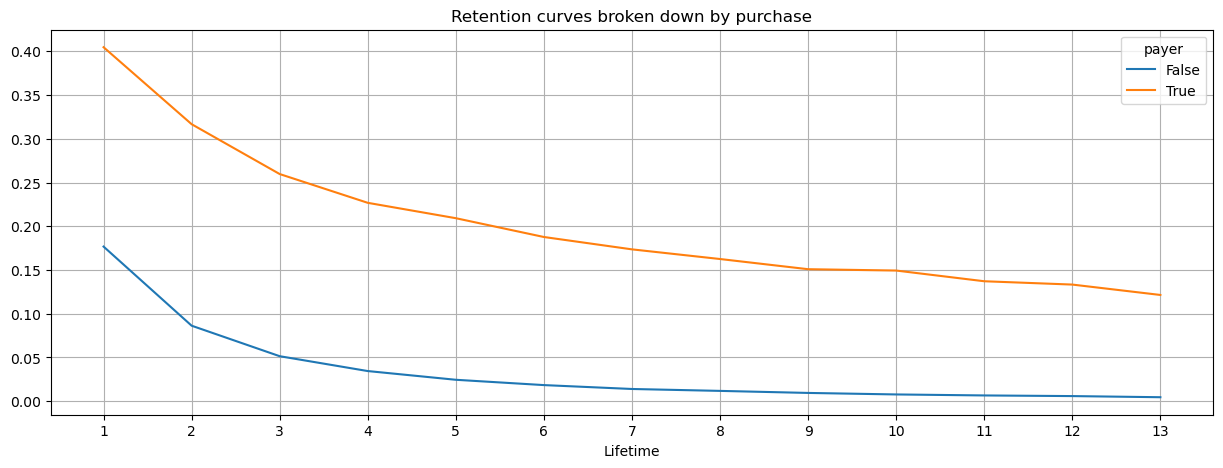

In [36]:
# retention of non-paying decreases faster than retention of paying?

report = retention_grouped.drop(columns=['cohort_size', 0])
report.T.plot(grid=True, xticks=list(report.columns.values), figsize=(15, 5))
plt.xlabel('Lifetime')
plt.title('Retention curves broken down by purchase')
plt.show() 

It can be seen that the retention of non-paying users decreased significantly faster. All tests are passed. Therefore, we can assume that the retention coefficients are calculated correctly.

##### Calculation of conversion

In [37]:
def get_conversion(
    profiles,
    purchases,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # we exclude users who have not "lived up" to the horizon of analysis
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    # we determine the date and time of the first purchase for each user
    first_purchases = (
        purchases.sort_values(by=['user_id', 'event_dt'])
        .groupby('user_id')
        .agg({'event_dt': 'first'})
        .reset_index()
    )

    # adding data about purchases in the profile
    result_raw = result_raw.merge(
        first_purchases[['user_id', 'event_dt']], on='user_id', how='left'
    )

    # we calculate the lifetime for each purchase
    result_raw['lifetime'] = (
        result_raw['event_dt'] - result_raw['first_ts']
    ).dt.days

    # group by cohort if there is nothing in dimensions
    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users' 
        dimensions = dimensions + ['cohort']

    # a function for grouping a table by desired attributes
    def group_by_dimensions(df, dims, horizon_days):
        result = df.pivot_table(
            index=dims, columns='lifetime', values='user_id', aggfunc='nunique'
        )
        result = result.fillna(0).cumsum(axis = 1)
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        
        # divide each "cell" in the row by the size of the cohort
        # and get the conversion rate
        result = result.div(result['cohort_size'], axis=0)
        result = result[['cohort_size'] + list(range(horizon_days))]
        result['cohort_size'] = cohort_sizes
        return result

    # conversion table
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)

    # for the conversion dynamics table, we remove 'cohort' from dimensions
    if 'cohort' in dimensions: 
        dimensions = []

    # we get a table of conversion dynamics
    result_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    # both tables and raw data
    return result_raw, result_grouped, result_in_time 

In [38]:
conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles,
    orders,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False)

conversion_raw.head()

user_id            first_ts     channel  device         region  \
0    599326 2019-05-07 20:58:57    FaceBoom     Mac  United States   
1   4919697 2019-07-09 12:46:07    FaceBoom  iPhone  United States   
2   6085896 2019-10-01 09:58:33     organic  iPhone         France   
3  22593348 2019-08-22 21:35:48  AdNonSense      PC        Germany   
4  31989216 2019-10-02 00:07:44     YRabbit  iPhone  United States   

           dt      month  payer  acquisition_cost            event_dt  \
0  2019-05-07 2019-05-01   True          1.088172 2019-05-07 20:59:09   
1  2019-07-09 2019-07-01  False          1.107237                 NaT   
2  2019-10-01 2019-10-01  False          0.000000                 NaT   
3  2019-08-22 2019-08-01  False          0.988235                 NaT   
4  2019-10-02 2019-10-01  False          0.230769                 NaT   

   lifetime     cohort  
0       0.0  All users  
1       NaN  All users  
2       NaN  All users  
3       NaN  All users  
4       NaN  All users

In [39]:
conversion_grouped

cohort_size      0.0       1.0       2.0       3.0       4.0  \
cohort                                                                    
All users       142620  0.04092  0.046705  0.049516  0.051522  0.052973   

                5.0       6.0       7.0       8.0       9.0      10.0  \
cohort                                                                  
All users  0.053898  0.054677  0.055392  0.055946  0.056458  0.056738   

               11.0      12.0      13.0  
cohort                                   
All users  0.056977  0.057145  0.057369

In [40]:
conversion_history.head()

cohort_size       0.0       1.0       2.0       3.0       4.0  \
dt                                                                          
2019-05-01          909  0.031903  0.036304  0.038504  0.038504  0.040704   
2019-05-02          758  0.029024  0.035620  0.036939  0.036939  0.036939   
2019-05-03          849  0.031802  0.037691  0.043581  0.044759  0.047114   
2019-05-04         1015  0.035468  0.039409  0.040394  0.042365  0.047291   
2019-05-05          970  0.023711  0.026804  0.028866  0.030928  0.032990   

                 5.0       6.0       7.0       8.0       9.0      10.0  \
dt                                                                       
2019-05-01  0.040704  0.040704  0.041804  0.042904  0.044004  0.044004   
2019-05-02  0.036939  0.036939  0.038259  0.038259  0.038259  0.039578   
2019-05-03  0.047114  0.047114  0.047114  0.047114  0.047114  0.047114   
2019-05-04  0.047291  0.048276  0.050246  0.051232  0.052217  0.052217   
2019-05-05  0.032990  0.032990  0.032990  0.032990  0.032990  0.032990   

                11.0      12.0      13.0  
dt                                        
2019-05-01  0.044004  0.044004  0.045105  
2019-05-02  0.039578  0.039578  0.039578  
2019-05-03  0.047114  0.047114  0.048292  
2019-05-04  0.052217  0.052217  0.052217  
2019-05-05  0.032990  0.032990  0.032990

**Let's check if the conversion rates are calculated correctly:**
* To do this, let's check that the sum of the cohort sizes is equal to the number of new customers in the study period.
* The number of new customers is equal to the number of new clients multiplied by the total conversion.
* There are no values exceeding one in the conversion table.
* The conversion curve grows smoothly from zero in the direction of one.
* The conversion curve does not decrease.

In [41]:
# the sum of the cohort sizes is equal to the number of new clients in the study period

report = profiles.query('dt <= @last_suitable_acquisition_date')
print(
    # we count unique users in profiles and add up the cohort sizes
    'Total number of new users: {} {}'.format(
        len(report['user_id'].unique()), conversion_history['cohort_size'].sum())) 

Total number of new users: 142620 142620


In [42]:
# the number of new customers is equal to the number of new clients multiplied by the total conversion

# let's calculate the number of customers multiplied by the total conversion
report = profiles.query('dt <= @last_suitable_acquisition_date and payer == True')

print('The number of unique buyers from the conversion table: {:.0f}'.format(
        conversion_grouped['cohort_size'][0] * conversion_grouped[13][0])) 

The number of unique buyers from the conversion table: 8182


In [43]:
# the data of users attracted before the date we need

report = orders.merge(
    profiles.query('dt <= @last_suitable_acquisition_date'),on='user_id')

# the lifetime for each purchase
report['lifetime'] = (report['event_dt'] - report['first_ts']).dt.days

# excluding unnecessary lifetimes
report = report.query('lifetime <= 13')

print(
    'The number of unique buyers from the order table: {:.0f}'.format(
        len(report['user_id'].unique()))) 

The number of unique buyers from the order table: 8182


In [44]:
# There are no values higher than 1

print(conversion_history.drop(columns=['cohort_size']).max())

conversion_grouped.drop(columns=['cohort_size']).max()

0.0     0.061308
1.0     0.067416
2.0     0.071510
3.0     0.073780
4.0     0.073970
5.0     0.075843
6.0     0.076050
7.0     0.076050
8.0     0.076050
9.0     0.076152
10.0    0.076497
11.0    0.077605
12.0    0.077605
13.0    0.077605
dtype: float64


0.0     0.040920
1.0     0.046705
2.0     0.049516
3.0     0.051522
4.0     0.052973
5.0     0.053898
6.0     0.054677
7.0     0.055392
8.0     0.055946
9.0     0.056458
10.0    0.056738
11.0    0.056977
12.0    0.057145
13.0    0.057369
dtype: float64

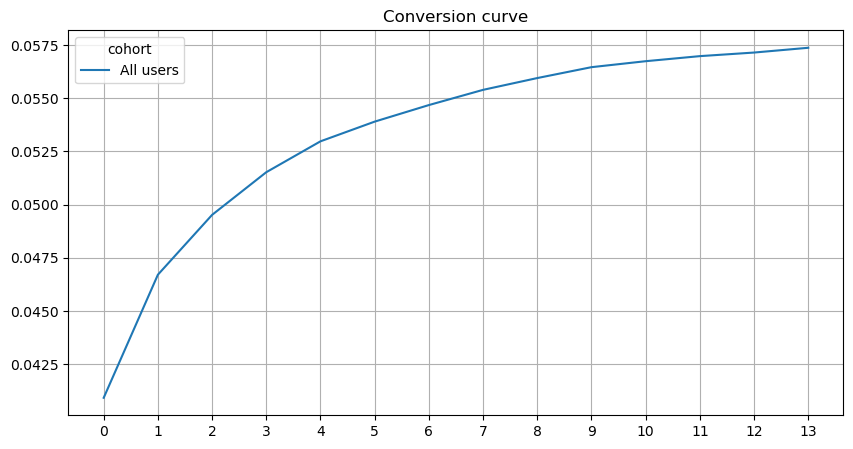

In [45]:
# building a conversion curve
report = conversion_grouped.drop(columns=['cohort_size'])
report.T.plot(grid=True, xticks=list(report.columns.values), figsize=(10, 5))
plt.title('Conversion curve')
plt.show() 

The conversion curve grows smoothly and does not decrease, there are no values higher than 1 in the tables with coefficients, the rest of the tests were also passed successfully. It can be concluded that the conversion rates are calculated correctly.

##### LTV and ROI

In [46]:
def get_ltv(
    profiles,
    purchases,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # we exclude users who have not "lived up" to the horizon of analysis
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')
    
    # adding data about purchases in the profile
    result_raw = result_raw.merge(
        purchases[['user_id', 'event_dt', 'revenue']], on='user_id', how='left'
)
    
    # user's lifetime for each purchase
    result_raw['lifetime'] = (
        result_raw['event_dt'] - result_raw['first_ts']
    ).dt.days
    
    # group by cohort if there is nothing in dimensions
    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users'
        dimensions = dimensions + ['cohort']

    # grouping function by desired attributes
    def group_by_dimensions(df, dims, horizon_days):
        
        # building a "triangular" revenue table
        result = df.pivot_table(
            index=dims, columns='lifetime', values='revenue', aggfunc='sum'
        )
        
        # the amount of revenue with accumulation
        result = result.fillna(0).cumsum(axis=1)
        
        # cohort sizes
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        # merging cohort sizes and revenue
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        # counting LTV: dividing each "cell" in a row by the size of the cohort
        result = result.div(result['cohort_size'], axis=0)
        # excluding all lifetimes exceeding the analysis horizon
        result = result[['cohort_size'] + list(range(horizon_days))]
        # restoring cohort sizes
        result['cohort_size'] = cohort_sizes

        # collecting a dataframe with user data and CAC values,
        # adding parameters from dimensions
        cac = df[['user_id', 'acquisition_cost'] + dims].drop_duplicates()

        # calculating the average CAC according to the parameters from dimensions
        cac = (
            cac.groupby(dims)
            .agg({'acquisition_cost': 'mean'})
            .rename(columns={'acquisition_cost': 'cac'})
        )

        # ROI: dividing LTV by CAC
        roi = result.div(cac['cac'], axis=0)

        # deleting rows with 'infinite' ROI
        roi = roi[~roi['cohort_size'].isin([np.inf])]

        # restoring cohort sizes in ROI tables
        roi['cohort_size'] = cohort_sizes

        # adding CAC to the ROI table
        roi['cac'] = cac['cac']

        # in the final table, we leave the cohort sizes, CAC
        # and ROI in lifetimes not exceeding the analysis horizon
        roi = roi[['cohort_size', 'cac'] + list(range(horizon_days))]

        # returning LTV and ROI tables
        return result, roi

    # getting LTV and ROI tables
    result_grouped, roi_grouped = group_by_dimensions(
        result_raw, dimensions, horizon_days
    )

    # for dynamics tables, we remove 'cohort' from dimensions
    if 'cohort' in dimensions:
        dimensions = []

    # we get tables of LTV and ROI dynamics
    result_in_time, roi_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    return (
        result_raw,  # raw data
        result_grouped,  # LTV table
        result_in_time,  # LTV dynamics table
        roi_grouped,  # ROI table
        roi_in_time,  # ROI dynamics table
    ) 

In [47]:
ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles,
    orders,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False)

In [48]:
ltv_raw.head()

user_id            first_ts   channel  device         region          dt  \
0   599326 2019-05-07 20:58:57  FaceBoom     Mac  United States  2019-05-07   
1   599326 2019-05-07 20:58:57  FaceBoom     Mac  United States  2019-05-07   
2   599326 2019-05-07 20:58:57  FaceBoom     Mac  United States  2019-05-07   
3  4919697 2019-07-09 12:46:07  FaceBoom  iPhone  United States  2019-07-09   
4  6085896 2019-10-01 09:58:33   organic  iPhone         France  2019-10-01   

       month  payer  acquisition_cost            event_dt  revenue  lifetime  \
0 2019-05-01   True          1.088172 2019-05-07 20:59:09     4.99       0.0   
1 2019-05-01   True          1.088172 2019-05-08 06:01:28     4.99       0.0   
2 2019-05-01   True          1.088172 2019-05-09 07:34:01     4.99       1.0   
3 2019-07-01  False          1.107237                 NaT      NaN       NaN   
4 2019-10-01  False          0.000000                 NaT      NaN       NaN   

      cohort  
0  All users  
1  All users  
2  All users  
3  All users  
4  All users

In [49]:
ltv_grouped

cohort_size       0.0       1.0       2.0       3.0       4.0  \
cohort                                                                     
All users       142620  0.241267  0.310905  0.364073  0.408661  0.447512   

                5.0       6.0       7.0       8.0       9.0      10.0  \
cohort                                                                  
All users  0.481909  0.513263  0.541481  0.569211  0.594565  0.617813   

               11.0      12.0      13.0  
cohort                                   
All users  0.639767  0.661289  0.680757

In [50]:
ltv_history.head(3)

cohort_size       0.0       1.0       2.0       3.0       4.0  \
dt                                                                          
2019-05-01          909  0.160297  0.215193  0.260209  0.294246  0.316205   
2019-05-02          758  0.157995  0.302942  0.335858  0.381939  0.408272   
2019-05-03          849  0.165748  0.249211  0.326796  0.379694  0.503227   

                 5.0       6.0       7.0       8.0       9.0      10.0  \
dt                                                                       
2019-05-01  0.316205  0.327184  0.338163  0.382079  0.426029  0.469945   
2019-05-02  0.441201  0.454367  0.493865  0.526781  0.546530  0.572863   
2019-05-03  0.550259  0.556137  0.562014  0.591402  0.620789  0.632544   

                11.0      12.0      13.0  
dt                                        
2019-05-01  0.502882  0.508372  0.524840  
2019-05-02  0.579446  0.592612  0.612361  
2019-05-03  0.667809  0.691319  0.708952

**To be sure that the LTV is calculated correctly, we will make several checks:**
* The sum of the cohort sizes is equal to the total number of new customers in the study period.
* The LTV curve grows smoothly from zero with a possible intersection of one.
* The LTV curve does not decrease.
* The total cost of purchases of new customers is equal to the maximum LTV multiplied by the number of new customers.

In [51]:
# the sum of the cohort sizes is equal to the total number of new clients in the researched period

report = profiles.query('dt <= @last_suitable_acquisition_date')
print(
    # counting unique users in profiles and add up the cohort sizes
    'Total number of new clients: {} {}'.format(
        len(report['user_id'].unique()), ltv_history['cohort_size'].sum())) 

Total number of new clients: 142620 142620


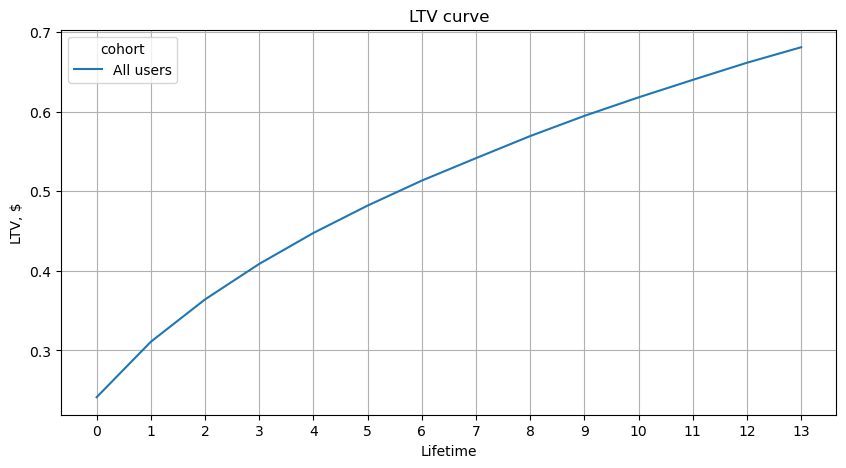

In [52]:
# the LTV curve grows smoothly from zero with a possible intersection of one and does not decrease

report = ltv_grouped.drop(columns=['cohort_size'])
report.T.plot(grid=True, figsize=(10, 5), xticks=list(report.columns.values))
plt.title('LTV curve')
plt.ylabel('LTV, $')
plt.xlabel('Lifetime')
plt.show() 

In [53]:
# The LTV of the maximum lifetime multiplied by the size of the cohort 
# is equal to the sum of the values of the revenue column in the orders table

last_suitable_acquisition_date = observation_date - timedelta(days=horizon_days - 1)

orders_check = orders 

profiles_check = profiles.query('dt <= @last_suitable_acquisition_date')

profiles_check = profiles_check.merge(orders_check[['user_id', 'event_dt', 'revenue']], on='user_id', how='left')

profiles_check['lifetime'] = (profiles_check['event_dt'] - profiles_check['first_ts']).dt.days

profiles_check = profiles_check.query('lifetime <= 13')
                          
print(
    'Total cost of orders in LTV table: {:.2f}'.format(
        ltv_grouped.loc['All users', 13] * ltv_grouped.loc['All users', 'cohort_size']
    )
)

print(
    'Total cost of orders from the order table: {:.2f}'.format(
        profiles_check['revenue'].sum()
    )
) 

Total cost of orders in LTV table: 97089.61
Total cost of orders from the order table: 97089.61


In [54]:
roi_grouped

cohort_size       cac       0.0       1.0       2.0      3.0  \
cohort                                                                    
All users       142620  0.694753  0.347269  0.447504  0.524031  0.58821   

                4.0      5.0       6.0       7.0       8.0       9.0  \
cohort                                                                 
All users  0.644131  0.69364  0.738771  0.779386  0.819299  0.855793   

               10.0      11.0      12.0      13.0  
cohort                                             
All users  0.889256  0.920855  0.951833  0.979855

In [55]:
roi_history.head(3)

cohort_size       cac       0.0       1.0       2.0       3.0  \
dt                                                                          
2019-05-01          909  0.335336  0.478020  0.641723  0.775966  0.877469   
2019-05-02          758  0.304545  0.518790  0.994737  1.102818  1.254132   
2019-05-03          849  0.309859  0.534915  0.804273  1.054662  1.225377   

                 4.0       5.0       6.0       7.0       8.0       9.0  \
dt                                                                       
2019-05-01  0.942950  0.942950  0.975691  1.008431  1.139394  1.270455   
2019-05-02  1.340597  1.448721  1.491953  1.621651  1.729732  1.794581   
2019-05-03  1.624054  1.775839  1.794807  1.813776  1.908617  2.003459   

                10.0      11.0      12.0      13.0  
dt                                                  
2019-05-01  1.401417  1.499639  1.516009  1.565120  
2019-05-02  1.881046  1.902662  1.945894  2.010743  
2019-05-03  2.041396  2.155206  2.231079  2.287984

LTV is calculated correctly.

**Let's check if the CAC is calculated correctly**
* The CAC from the ROI table multiplied by the size of the cohort is equal to the amount of advertising expenses for the period.

In [56]:
max_acquisition_date = roi_history.reset_index()['dt'].max()

print('Total cost of attraction from the ROI table: {:.2f}'.format(
       roi_grouped.loc['All users', 'cac'] * roi_grouped.loc['All users', 'cohort_size']))

print('Total cost of attraction from the costs table: {:.2f}'.format(
       costs.query('dt <= @max_acquisition_date')['costs'].sum()))

Total cost of attraction from the ROI table: 99085.74
Total cost of attraction from the costs table: 99085.74


**If we checked LTV and CAC, then we don't have to worry about ROI: since all the components are correct, the result is also correct. All metrics were calculated correctly, as the checks did not reveal any problems.**

#### Plotting

##### Retention Rate chart

In [57]:
# The function for smoothing the frame. When it is not needed can be used window = 1

def filter_data(df, window):
    # we use a moving average for each column
    for column in df.columns.values:
        df[column] = df[column].rolling(window).mean() 
    return df 

In [58]:
# function for visualizing retention

def plot_retention(retention, retention_history, horizon, window=7):

    # setting the chart size
    plt.figure(figsize=(15, 10))

    # cohort sizes and retention of the first day are excluded
    retention = retention.drop(columns=['cohort_size', 0])
    # in the dynamics table we leave only the necessary lifetime
    retention_history = retention_history.drop(columns=['cohort_size'])[
        [horizon - 1]
    ]

    # if only payer is in the retention table indexes,
    # we add the second attribute — cohort
    if retention.index.nlevels == 1:
        retention['cohort'] = 'All users'
        retention = retention.reset_index().set_index(['cohort', 'payer'])

    # in the graph table we have two columns and two rows - four cells
    # in the first one, we build retention curves for paying users
    ax1 = plt.subplot(2, 2, 1)
    retention.query('payer == True').droplevel('payer').T.plot(
        grid=True, ax=ax1
    )
    plt.legend()
    plt.xlabel('Lifetime')
    plt.title('Retention of paying users')

    # in the second cell, we build retention curves for non-paying
    # vertical axis — from the graph from the first cell
    ax2 = plt.subplot(2, 2, 2, sharey=ax1)
    retention.query('payer == False').droplevel('payer').T.plot(
        grid=True, ax=ax2
    )
    plt.legend()
    plt.xlabel('Lifetime')
    plt.title('Retention of non-paying users')

    # in the third cell — dynamics of retention of paying
    ax3 = plt.subplot(2, 2, 3)
    # getting column names for the pivot table
    columns = [
        name
        for name in retention_history.index.names
        if name not in ['dt', 'payer']
    ]
    # filtering the data and plotting
    filtered_data = retention_history.query('payer == True').pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax3)
    plt.xlabel('Engagement date')
    plt.title(
        'Dynamics of retention of paying users on {} day'.format(
            horizon
        )
    )

    # in the fourth cell — dynamics of non-paying retention
    ax4 = plt.subplot(2, 2, 4, sharey=ax3)
    # filtering the data and plotting
    filtered_data = retention_history.query('payer == False').pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax4)
    plt.xlabel('Engagement date')
    plt.title(
        'Dynamics of retention of non-paying users on {} day'.format(
            horizon
        )
    )
    
    plt.tight_layout()
    plt.show() 

In [59]:
# testing of plotting
#plot_retention(retention_grouped, retention_history, horizon_days) 

##### Сonversion Rate chart

In [60]:
# function for visualizing conversion

def plot_conversion(conversion, conversion_history, horizon, window=7):
    plt.figure(figsize=(15, 5))

    # excluding cohort sizes
    conversion = conversion.drop(columns=['cohort_size'])
    # in dynamics table we leave only neccessary lifetime
    conversion_history = conversion_history.drop(columns=['cohort_size'])[
        [horizon - 1]
    ]

    # the first graph is conversion curves
    ax1 = plt.subplot(1, 2, 1)
    conversion.T.plot(grid=True, ax=ax1)
    plt.legend()
    plt.xlabel('Lifetime')
    plt.title('Conversion of users')

    # 2nd chart — dynamics of conversion
    ax2 = plt.subplot(1, 2, 2, sharey=ax1)
    columns = [
    # all columns of the index, except the date, will become columns of the pivot table
        name for name in conversion_history.index.names if name not in ['dt']
    ]
    filtered_data = conversion_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax2)
    plt.xlabel('Engagement date')
    plt.title('Dynamics of conversion of users on {} day'.format(horizon))

    plt.tight_layout()
    plt.show() 

In [61]:
# testing of plotting
#plot_conversion(conversion_grouped, conversion_history, horizon_days) 

##### График LTV и ROI

In [62]:
# function for visualization LTV и ROI

def plot_ltv_roi(ltv, ltv_history, roi, roi_history, horizon, window=7):

    plt.figure(figsize=(20, 10))

    # we exclude cohort sizes from the ltv table
    ltv = ltv.drop(columns=['cohort_size'])
    # in the ltv dynamics table, we leave only the necessary lifetime
    ltv_history = ltv_history.drop(columns=['cohort_size'])[[horizon - 1]]

    # the cost of attraction will be in a separate frame
    cac_history = roi_history[['cac']]

    # we exclude cohort sizes and cac from the roi table
    roi = roi.drop(columns=['cohort_size', 'cac'])
    # in the roi dynamics table, we leave only the necessary lifetime
    roi_history = roi_history.drop(columns=['cohort_size', 'cac'])[
        [horizon - 1]
    ]

    # first chart — ltv curves
    ax1 = plt.subplot(2, 3, 1)
    ltv.T.plot(grid=True, ax=ax1)
    plt.legend()
    plt.xlabel('Lifetime')
    plt.title('LTV')

    # second chart — ltv dynamics
    ax2 = plt.subplot(2, 3, 2, sharey=ax1)
    # the columns of the pivot table will be all the columns of the index, except for the date
    columns = [name for name in ltv_history.index.names if name not in ['dt']]
    filtered_data = ltv_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax2)
    plt.xlabel('Engagement date')
    plt.title('Dynamics of LTV of users on {} day'.format(horizon))

    # 3rd chart — cac dynamics
    ax3 = plt.subplot(2, 3, 3, sharey=ax1)
    # the columns of the pivot table will be all the columns of the index, except for the date
    columns = [name for name in cac_history.index.names if name not in ['dt']]
    filtered_data = cac_history.pivot_table(
        index='dt', columns=columns, values='cac', aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax3)
    plt.xlabel('Engagement date')
    plt.title('Dynamics of the cost of attracting users')

    # 4th chart — roi curves
    ax4 = plt.subplot(2, 3, 4)
    roi.T.plot(grid=True, ax=ax4)
    plt.axhline(y=1, color='red', linestyle='--', label='Payback level')
    plt.legend()
    plt.xlabel('Lifetime')
    plt.title('ROI')

    # 5th chart — roi dynamics
    ax5 = plt.subplot(2, 3, 5, sharey=ax4)
    # the columns of the pivot table will be all the columns of the index, except for the date
    columns = [name for name in roi_history.index.names if name not in ['dt']]
    filtered_data = roi_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax5)
    plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
    plt.xlabel('Engagement date')
    plt.title('Dynamics of user ROI on {} day'.format(horizon))

    plt.tight_layout()
    plt.show() 

<a id='moving_average_costs'></a>

In [63]:
# testing plotting
#plot_ltv_roi(ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days) 

### Exploratory analysis of data
- We will create user profiles. We will determine the minimum and maximum dates for attracting users.
- We will find out which countries users come to the app from and which country accounts for the biggest number of paying users. Let's build a table reflecting the number of users and the share of payers from each country.
- Find out which devices are used by customers and which devices are preferred by paying users. Let's build a table reflecting the number of users and the share of those paying for each device.
- We will study the advertising sources of attraction and determine the channels from which the bigest amount of paying users came. Let's build a table reflecting the number of users and the share of payers for each attraction channel.
* After each point, conclusions are formulated.

#### Profiles of users

We made this table earlier.

In [64]:
profiles.head()

user_id            first_ts     channel  device         region  \
0    599326 2019-05-07 20:58:57    FaceBoom     Mac  United States   
1   4919697 2019-07-09 12:46:07    FaceBoom  iPhone  United States   
2   6085896 2019-10-01 09:58:33     organic  iPhone         France   
3  22593348 2019-08-22 21:35:48  AdNonSense      PC        Germany   
4  31989216 2019-10-02 00:07:44     YRabbit  iPhone  United States   

           dt      month  payer  acquisition_cost  
0  2019-05-07 2019-05-01   True          1.088172  
1  2019-07-09 2019-07-01  False          1.107237  
2  2019-10-01 2019-10-01  False          0.000000  
3  2019-08-22 2019-08-01  False          0.988235  
4  2019-10-02 2019-10-01  False          0.230769

There is all the necessary data:

* user ID;
* date and time of the first login to the application, the channel of attraction, the device from which the application was first logged in;
* the region from which the entry was made;
* entry date without time;
* an indication of whether the customer is a paying user or not.

In [65]:
max_date = profiles['dt'].max()
min_date = profiles['dt'].min()
print(f'Minimum date of attracting customers {min_date}. Maximum date of attracting customers {max_date}')

Minimum date of attracting customers 2019-05-01. Maximum date of attracting customers 2019-10-27


The minimum and maximum date of attracting users corresponds to the study period - from May 1 to October 27, 2019 is the period during which users were attracted.

#### Let's find out from which countries users come to the application and which country accounts for the most paying users

Let's see how many users there are in each of the countries.

In [66]:
users_count = profiles.pivot_table(index='region', values='user_id', aggfunc='nunique').rename(
    columns={'user_id': 'unique_users_total'})
users_count

unique_users_total
region                           
France                      17450
Germany                     14981
UK                          17575
United States              100002

There are 5.7 - 6.7 times more users from the USA than there are users from every other country. Now about paying users.

In [67]:
buyers_count = profiles.query('payer == True').pivot_table(index='region', values='user_id', aggfunc='nunique')
buyers_count

user_id
region                
France             663
Germany            616
UK                 700
United States     6902

There are about 10 times more paying users from the USA than in every other country. This means that users from the USA have a better conversion to buyers.

In [68]:
users_count['payers'] = buyers_count['user_id']/users_count['unique_users_total'] * 100
users_count.sort_values(by='payers', ascending=False)

unique_users_total    payers
region                                     
United States              100002  6.901862
Germany                     14981  4.111875
UK                          17575  3.982930
France                      17450  3.799427

The share of buyers among app users in the US is higher than in other countries. 
In other countries, the share of buyers is about the same.

#### Devices that customers use and deviceswhich are preferred by paying users

In [69]:
users_count = profiles.pivot_table(index='device', values='user_id', aggfunc='nunique').rename(
    columns={'user_id': 'unique_users_total'})
users_count

unique_users_total
device                     
Android               35032
Mac                   30042
PC                    30455
iPhone                54479

In [70]:
buyers_count = profiles.query('payer == True').pivot_table(index='device', values='user_id', aggfunc='nunique')
buyers_count

user_id
device          
Android     2050
Mac         1912
PC          1537
iPhone      3382

In [71]:
users_count['payers'] = buyers_count['user_id']/users_count['unique_users_total'] * 100
users_count.sort_values(by='payers', ascending=False)

unique_users_total    payers
device                               
Mac                   30042  6.364423
iPhone                54479  6.207897
Android               35032  5.851793
PC                    30455  5.046790

Most often, users of the application use an iPhone. Buyers by device do not have a clearly distinguished leader. But among the users of Apple technology: Mac, iPhone, the share of buyers is higher.

#### Advertising sources of attraction and channels from which the most paying users came

In [72]:
users_count = profiles.pivot_table(index='channel', values='user_id', aggfunc='nunique').rename(
    columns={'user_id': 'unique_users_total'})
users_count.sort_values(by='unique_users_total', ascending = False)

unique_users_total
channel                               
organic                          56439
FaceBoom                         29144
TipTop                           19561
OppleCreativeMedia                8605
LeapBob                           8553
WahooNetBanner                    8553
RocketSuperAds                    4448
MediaTornado                      4364
YRabbit                           4312
AdNonSense                        3880
lambdaMediaAds                    2149

In [73]:
buyers_count = profiles.query('payer == True').pivot_table(index='channel', values='user_id', aggfunc='nunique')
buyers_count

user_id
channel                    
AdNonSense              440
FaceBoom               3557
LeapBob                 262
MediaTornado            156
OppleCreativeMedia      233
RocketSuperAds          352
TipTop                 1878
WahooNetBanner          453
YRabbit                 165
lambdaMediaAds          225
organic                1160

In [74]:
users_count['payers'] = buyers_count['user_id']/users_count['unique_users_total'] * 100
users_count.sort_values(by='payers', ascending=False)

unique_users_total     payers
channel                                          
FaceBoom                         29144  12.204914
AdNonSense                        3880  11.340206
lambdaMediaAds                    2149  10.469986
TipTop                           19561   9.600736
RocketSuperAds                    4448   7.913669
WahooNetBanner                    8553   5.296387
YRabbit                           4312   3.826531
MediaTornado                      4364   3.574702
LeapBob                           8553   3.063253
OppleCreativeMedia                8605   2.707728
organic                          56439   2.055316

The app gets the most users naturally when customers find it themselves without advertising. Among the paid sources of customers, "TipTop" and "Faceboom" stand out, users mostly came through these sources. And these users also have a high conversion rate to buyers.

#### Conclusions on the section

* There are 5.7 - 6.7 times more users from the USA than users from every other country, and the share of buyers among them is higher.
* The largest number of users access the app from iPhone, the highest proportion of buyers among users with iPhone and Mac.
* The app gets customers mostly naturally when customers find it themselves without advertising, but only 2% of such users become buyers.
* Among the paid sources of customers, "TipTop" and "Faceboom" stand out, users mostly came through these sources. And these users also have a high conversion rate to buyers.

### Marketing

- We will calculate the total amount of marketing expenses.
- We will find out how the expenses are distributed by advertising sources, that is, how much money was spent on each source.
- We will build a visualization of the dynamics of changes in expenses over time (by weeks and months) for each source. We will show this on one chart.
- Find out how much it cost on average to attract one user (CAC) from each source.
* Intermediate conclusions.

#### Total amount of marketing expenses

In [75]:
total_costs = costs['costs'].sum()
print(f'Total amount spent on advertising {total_costs:.0f}')

Total amount spent on advertising 105497


#### Distributions of expenses by advertising sources, that is, how much money was spent on each source

In [76]:
costs_per_channel = costs.pivot_table(
    index='channel', values='costs', aggfunc='sum').sort_values(by='costs', ascending=False)
costs_per_channel['proportion'] = costs_per_channel / total_costs * 100
costs_per_channel

costs  proportion
channel                                 
TipTop              54751.30   51.898295
FaceBoom            32445.60   30.754910
WahooNetBanner       5151.00    4.882589
AdNonSense           3911.25    3.707441
OppleCreativeMedia   2151.25    2.039152
RocketSuperAds       1833.00    1.737485
LeapBob              1797.60    1.703930
lambdaMediaAds       1557.60    1.476436
MediaTornado          954.48    0.904744
YRabbit               944.22    0.895018

Most of the money is spent on "Tip Top" and "Faceboom". These sources bring the bisggest number of customers. And users who come from Faceboom more often than others become paying. Significantly less money was spent on other advertising sources.

#### Visualization of the dynamics of changes in expenses over time (by weeks and months) for each source

To do this, we group expenses by the numbers of weeks, and then by the numbers of months. For each week and month, we will calculate the amount of expenses for each channel.

In [77]:
costs['week'] = pd.to_datetime(costs['dt']).dt.isocalendar().week
costs['month'] = pd.to_datetime(costs['dt']).dt.month

In [78]:
week_costs = costs.pivot_table(index='week', columns='channel', values='costs', aggfunc='sum')
#week_costs

In [79]:
month_costs = costs.pivot_table(index='month', columns='channel', values='costs', aggfunc='sum')
#month_costs

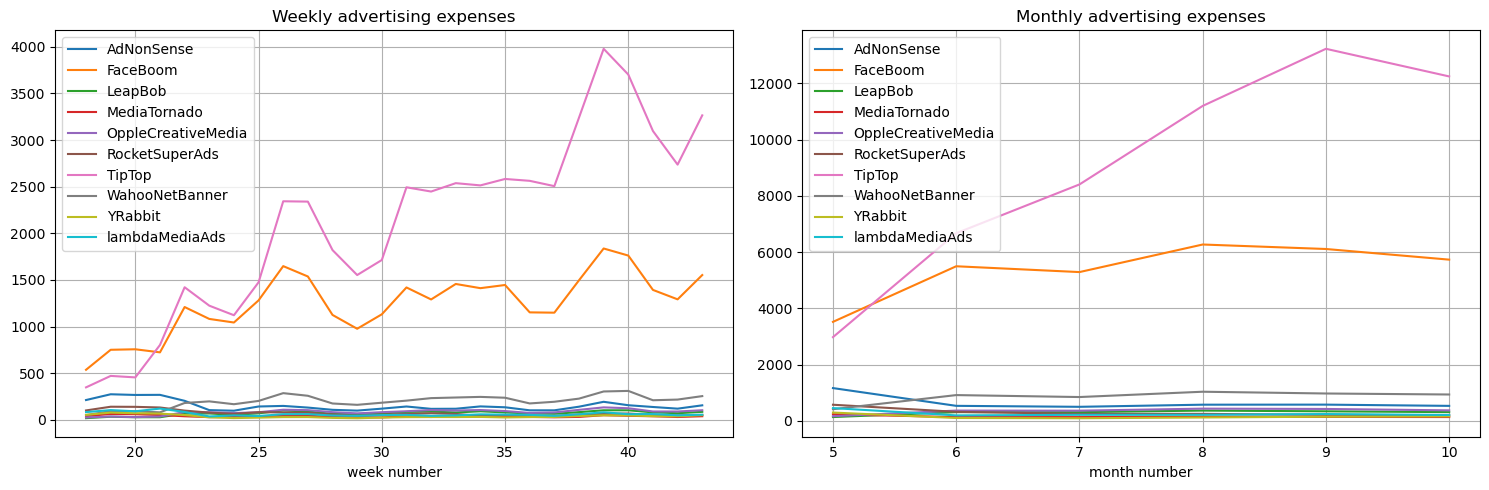

In [80]:
plt.figure(figsize=(15, 5))

ax1 = plt.subplot(1, 2, 1)
week_costs.plot(grid=True, ax=ax1)
plt.legend()
plt.xlabel('week number')
plt.title('Weekly advertising expenses')

ax2 = plt.subplot(1, 2, 2)
month_costs.plot(grid=True, ax=ax2)
plt.legend()
plt.xlabel('month number')
plt.title('Monthly advertising expenses')

plt.tight_layout()
plt.show()

Two channels stand out the most: Tip Top and Faceboom. The costs of these channels are growing with a certain volatility all the time. TipTop's weekly expenses have increased by about 8 times, monthly expenses by 4 times. Faceboom weekly expenses grew about 3 times, monthly 1.7 times.

Number of new users broken down by weeks and by months.

In [81]:
profiles['week'] = pd.to_datetime(profiles['dt']).dt.isocalendar().week
profiles['month'] = pd.to_datetime(profiles['dt']).dt.month

week_users = profiles.pivot_table(index='week', columns='channel', values='user_id', aggfunc='nunique')

In [82]:
month_users = profiles.pivot_table(index='month', columns='channel', values='user_id', aggfunc='nunique')

In [83]:
week_paying_users = profiles.query('payer == True').pivot_table(
    index='week', columns='channel', values='user_id', aggfunc='nunique')

In [84]:
month_paying_users = profiles.query('payer == True').pivot_table(
    index='month', columns='channel', values='user_id', aggfunc='nunique')

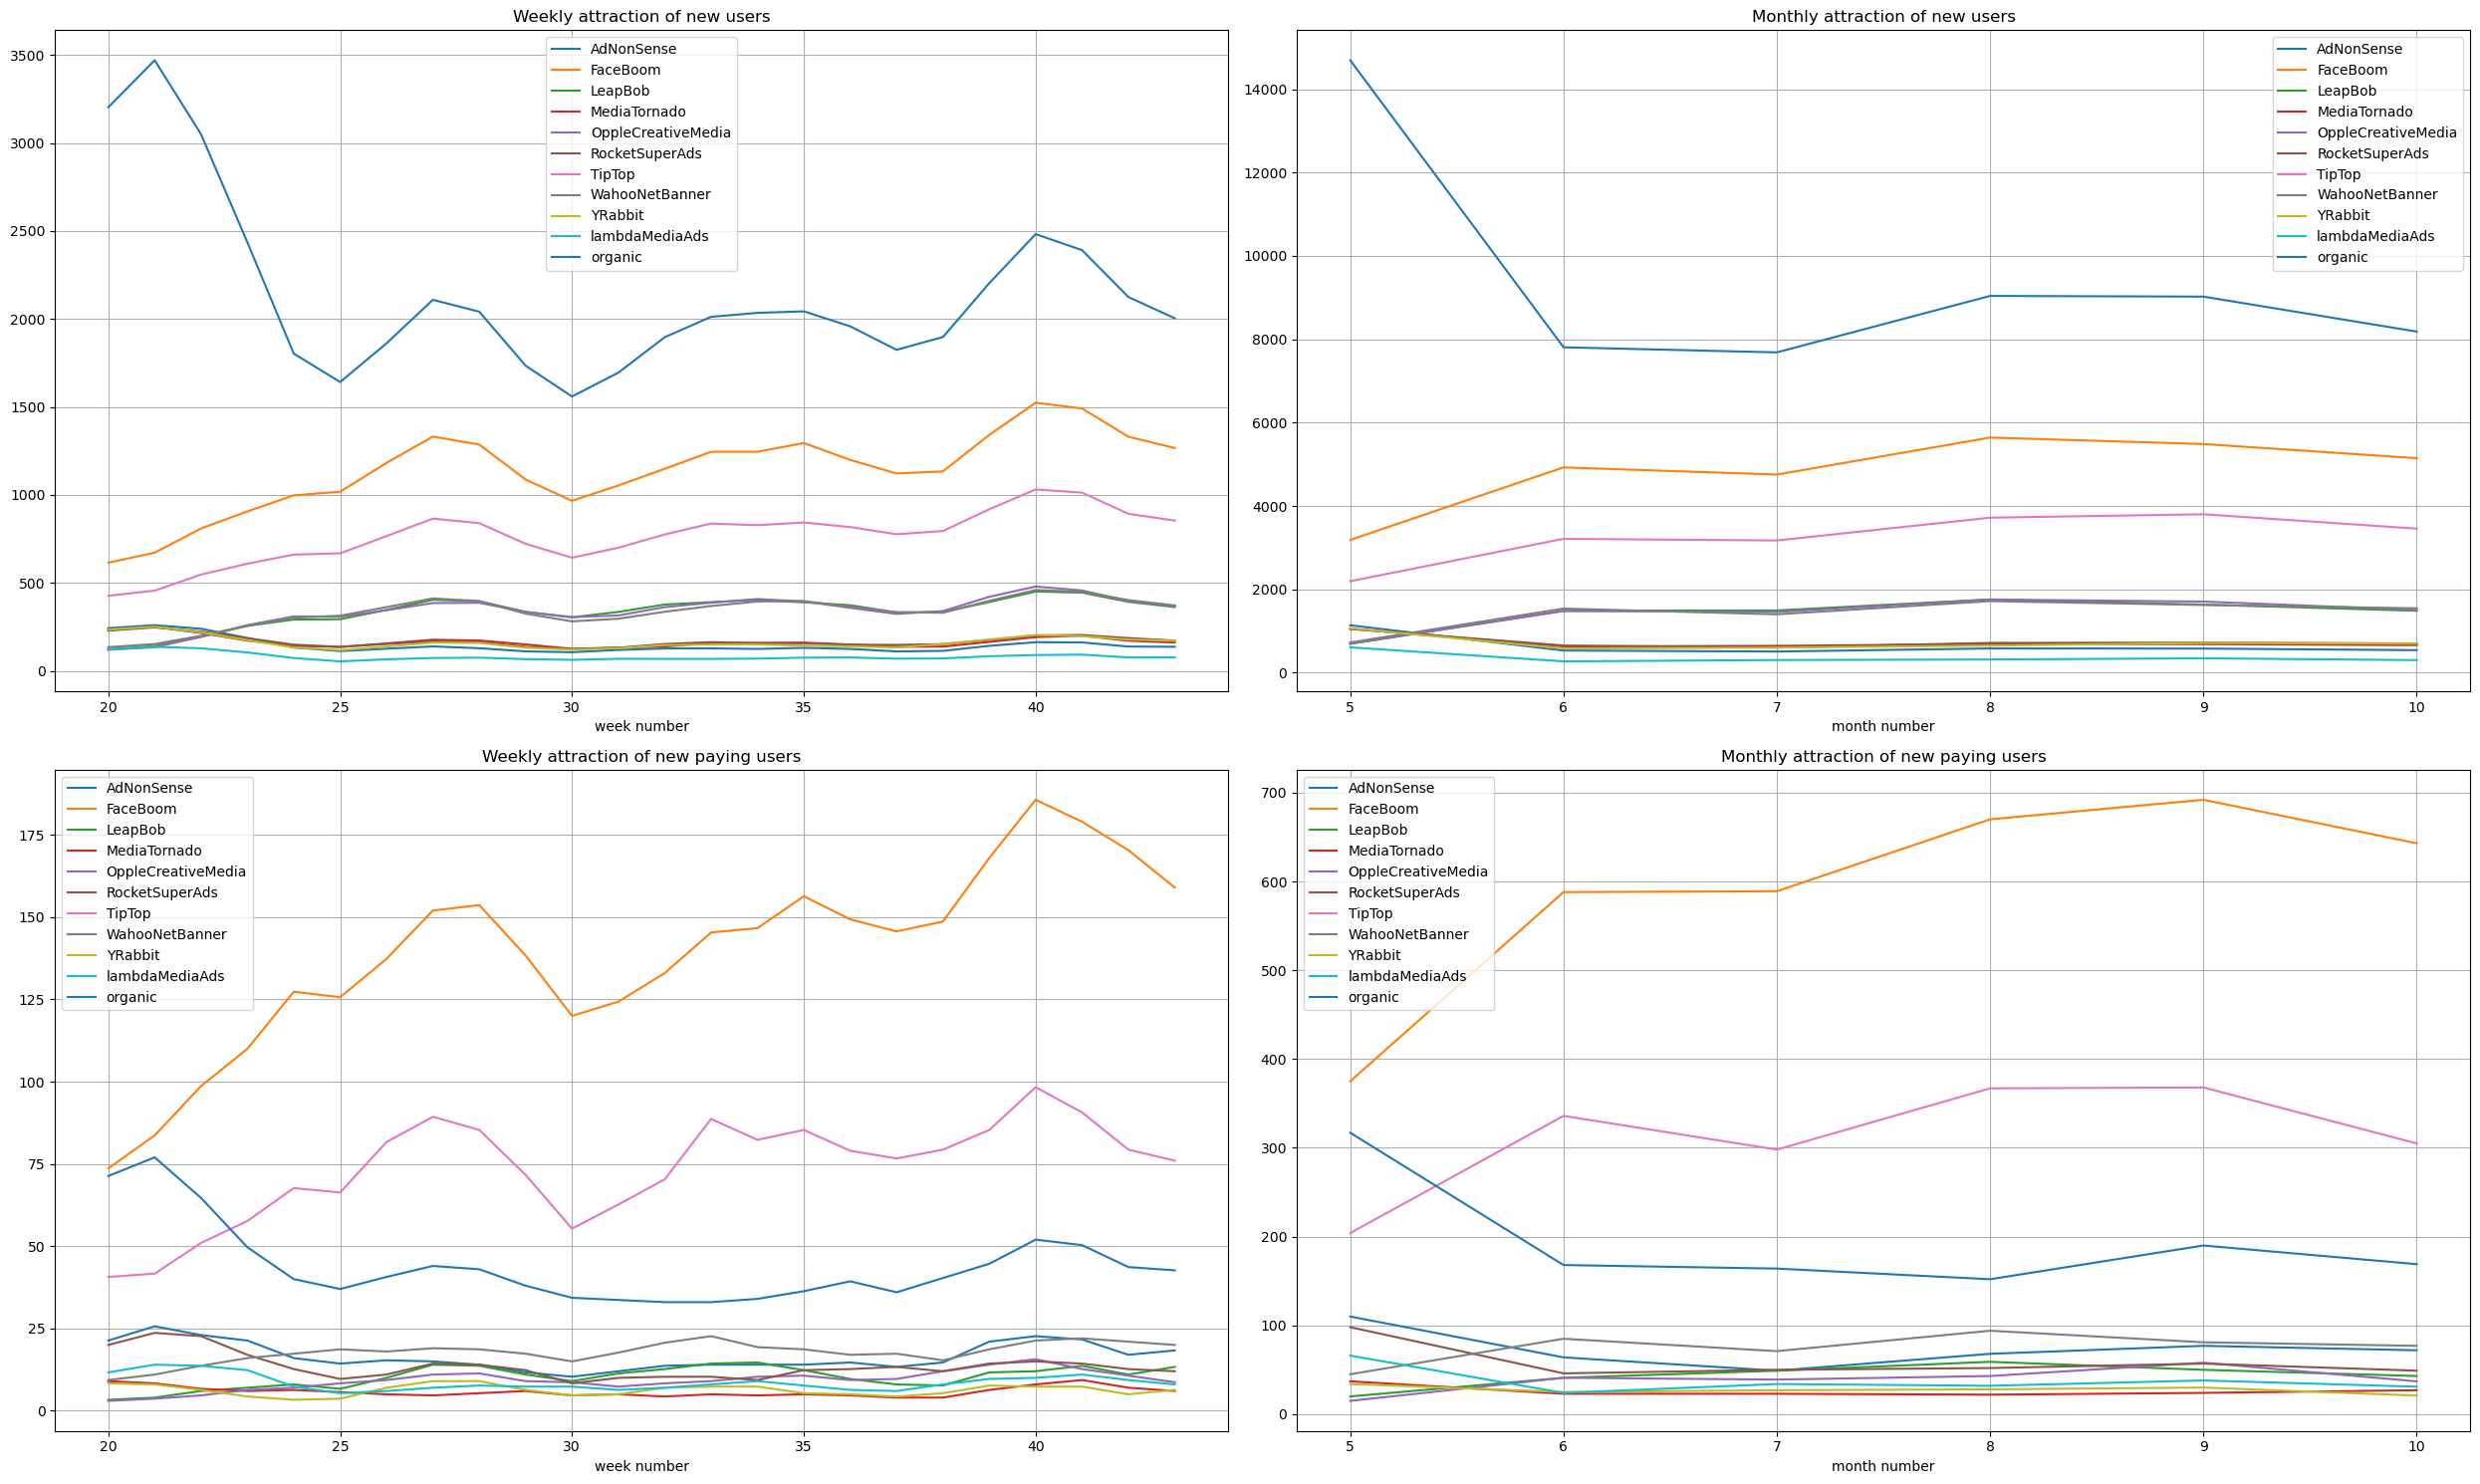

In [85]:
plt.figure(figsize=(25, 15))

ax1 = plt.subplot(2, 2, 1)
filter_data(week_users, 3).plot(grid=True, ax=ax1)
plt.legend()
plt.xlabel('week number')
plt.title('Weekly attraction of new users')

ax2 = plt.subplot(2, 2, 2)
month_users.plot(grid=True, ax=ax2)
plt.legend()
plt.xlabel('month number')
plt.title('Monthly attraction of new users')

ax3 = plt.subplot(2, 2, 3)
filter_data(week_paying_users, 3).plot(grid=True, ax=ax3)
plt.legend()
plt.xlabel('week number')
plt.title('Weekly attraction of new paying users')

ax4 = plt.subplot(2, 2, 4)
month_paying_users.plot(grid=True, ax=ax4)
plt.legend()
plt.xlabel('month number')
plt.title('Monthly attraction of new paying users')

plt.tight_layout()
plt.show()

Most of all new users come without ads, followed by TipTop and Faceboom.\
The organic channel has reduced weekly and monthly attraction by 1.6-1.7 times.\
TipTop has increased weekly attraction by 2 times, monthly by 1.5 times.\
Faceboom has increased weekly engagement by 2 times, monthly by 1.5 times.

The organic channel, as well as TipTop and Faceboom are leading in attracting new paying users. But the dynamics are weaker than the growth of expenses.\
The weekly attraction of new paying users for the entire period increased by 2 times for TipTop and Faceboom. Monthly for both is 1.5 times.\
The organic channel began to attract less. Weekly and monthly attraction fell by 1.5 times.

The growth of expenses for the main paid channels is faster than the growth of paying and non-paying users from them. Accordingly, profitability will fall.

#### Average cost to attract one user (CAC) from each source

The cost of attracting one user is calculated in our profiles. We already know that it has been growing all this time. Let's make a grouping according to the channels of attraction.\
We will also add a column where, for a visual comparison, we will display the average cost of attracting a user across all channels in the aggregate.

In [86]:
channael_CAC = profiles.pivot_table(index = 'channel', values = 'acquisition_cost', aggfunc = 'mean').sort_values(
    by = 'acquisition_cost', ascending = False).reset_index()
channael_CAC['all_average'] = profiles['acquisition_cost'].mean()
channael_CAC = channael_CAC.loc[channael_CAC['channel']!='organic']
channael_CAC

channel  acquisition_cost  all_average
0              TipTop          2.799003     0.703278
1            FaceBoom          1.113286     0.703278
2          AdNonSense          1.008054     0.703278
3      lambdaMediaAds          0.724802     0.703278
4      WahooNetBanner          0.602245     0.703278
5      RocketSuperAds          0.412095     0.703278
6  OppleCreativeMedia          0.250000     0.703278
7             YRabbit          0.218975     0.703278
8        MediaTornado          0.218717     0.703278
9             LeapBob          0.210172     0.703278

In paragraph 5.2, we found out that the most amount of money was spent on TipTop and Faceboom. The table above says that, per user, this advertisement is more expensive than the rest.
Ads for "AdNonSense" and "lambdaMediaAds" are also higher than the average cost of attraction.

#### Conclusion on section 5

* Most of the money is spent on "Tip Top" and "Faceboom". Those channels bring biggest amount of customers among paid sources. Users who came from Faceboom more often buy something.
* According to total costs, two channels stand out the most: "Tip Top" and "Faceboom". The costs of these channels are growing with a certain volatility all the time. At TipTop, weekly expenses increased by about 8 times, monthly expenses by 4 times. Faceboom has weekly ones about 3 times, monthly ones 1.7 times.
* The growth of expenses for the main paid channels is faster than the growth of paying and non-paying users from them. Accordingly, profitability will fall.
* The average costs for users across all communication channels are 0.7. The highest costs are for "TipTop", "Faceboom", "AdNonSense" and "lambdaMediaAds".

### Evaluation the payback of advertising

Using LTV, ROI and CAC charts, we will analyze the payback of advertising. We proceed from the fact that November 1, 2019 is on the calendar, and the business plan stipulates that users should pay off no later than two weeks after the attraction. 

- Analysis of the payback of advertising using LTV and ROI graphs, as well as LTV, CAC and ROI dynamics graphs.
- Checking the user conversion and the dynamics of its changes. We will do the same with user retention. Let's build and study conversion and retention charts.
- Analysis of the  payback of advertising by device. Let's plot LTV and ROI graphs, as well as LTV, CAC and ROI dynamics graphs.
- Let's analyze the payback of advertising by country. Let's plot LTV and ROI graphs, as well as LTV, CAC and ROI dynamics graphs.
- Let's analyze the payback of advertising by advertising channels. Let's plot LTV and ROI graphs, as well as LTV, CAC and ROI dynamics graphs.
- We will answer such questions:
    - Does advertising aimed at attracting users pay off in general?
    - Which devices, countries and advertising channels can have a negative impact on the payback of advertising?
    - What can cause payback problems?

We will write a conclusion, possible causes of the detected problems and interim recommendations for the advertising department.

#### Analysis of the payback of advertising using LTV and ROI graphs, as well as LTV, CAC and ROI dynamics graphs

We will leave profiles only with paid sources, since payback is important for them.

In [87]:
profiles = profiles.query('channel!="organic"')

ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles,
    orders,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False)

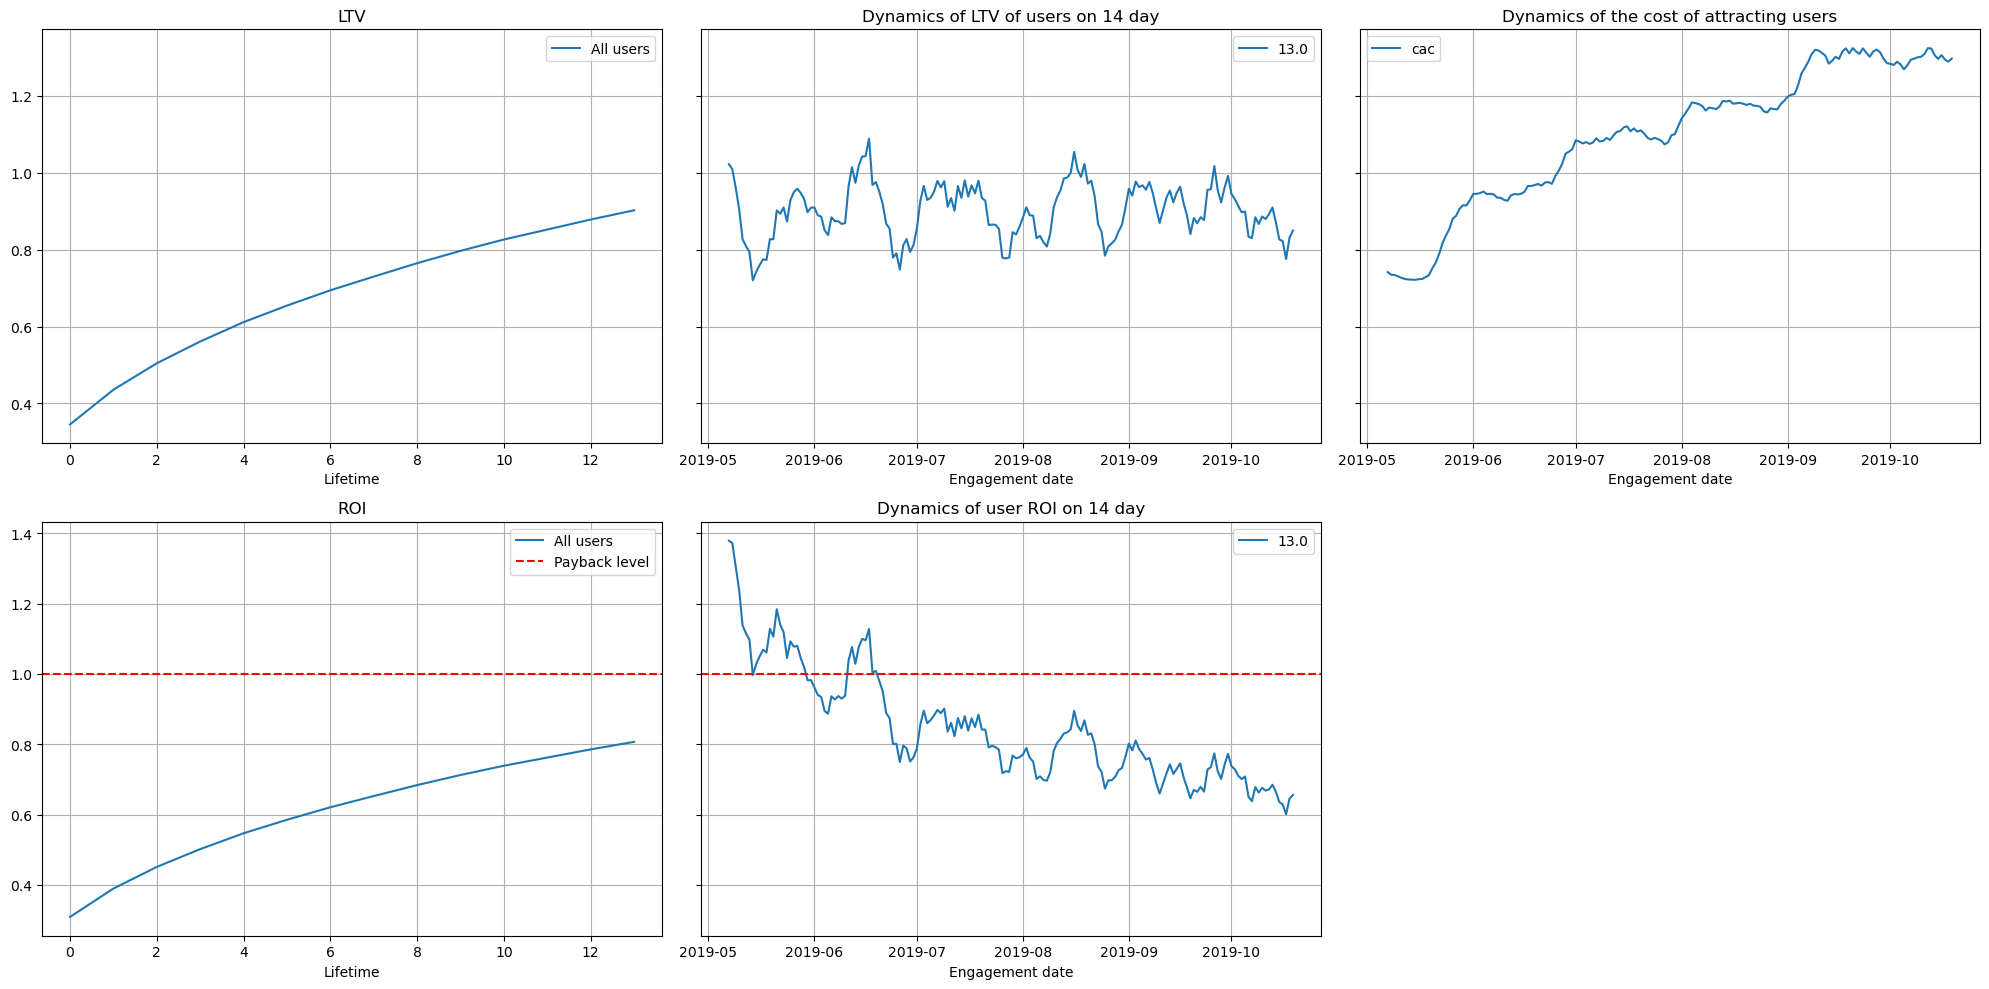

In [88]:
plot_ltv_roi(ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days) 

To smooth out strong jumps in the dynamics of ROI, LTV and attraction costs, a moving average with a window of 7 was used.
The expense per customer grows noticeably over time. That is why the return on marketing investments (ROI) on the 14th day is falling during the entire period of review from May to the end of October. Since mid-June, the ROI has remained below 1, which means that marketing is unprofitable, investments are more than revenue from the client and the situation is getting worse.

If we are not tied to dates, but consider the total ROI for the entire period based on total expenses and total revenue per client, then it turns out that in the end, marketing is unprofitable for the period from May to October.

We saw earlier that advertising costs are growing very much and growing faster than the number of new users and the number of new payers. LTV is too small to recoup such advertising costs.
Accordingly, taking into account the above, it is possible to write as a general note that it is necessary to radically reduce advertising costs. Or also radically increase LTV.

#### Conversion and retention

Conversion.

In [89]:
conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles,
    orders,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False)

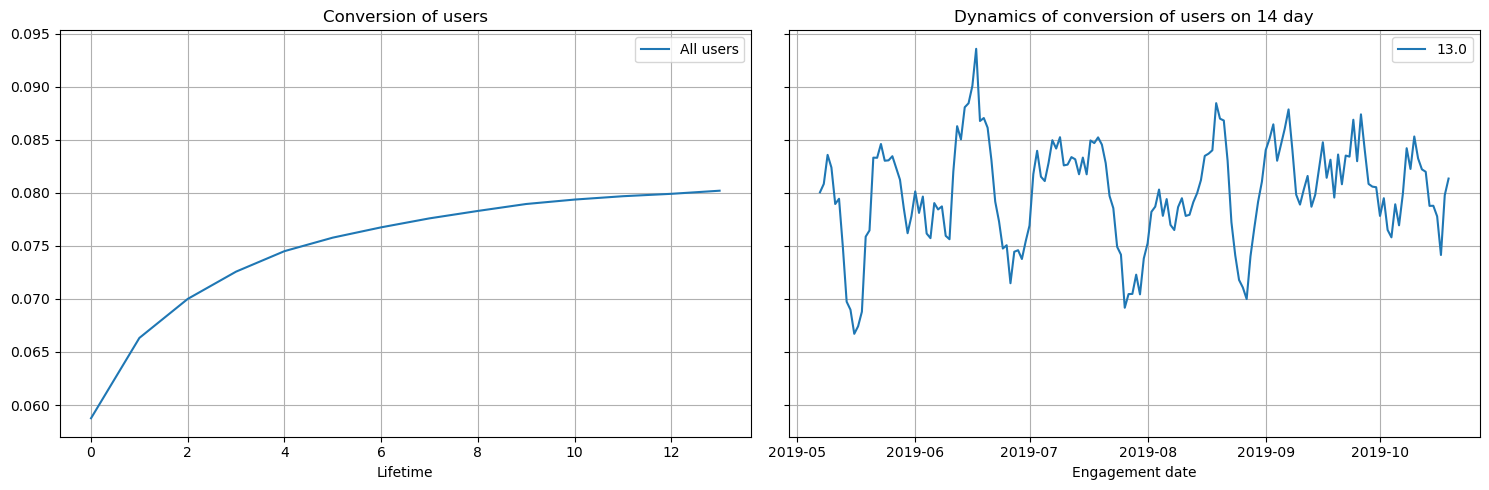

In [90]:
plot_conversion(conversion_grouped, conversion_history, horizon_days) 

The conversion of users as a whole, without grouping by dates and other signs, after the 6th lifetime (end of 1 week) noticeably slows down growth. It is quite low - 8% of users become buyers within 2 weeks. There is still a lot of room for growth.
In dynamics, the conversion rate on the 14th day is approximately at the same level. Again, we see that an increase in advertising costs does not lead to an increase in conversion. If you work on the conversion, you can improve LTV.

Retention.

In [91]:
retention_raw, retention_grouped, retention_history  = get_retention(
    profiles,
    visits,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
)

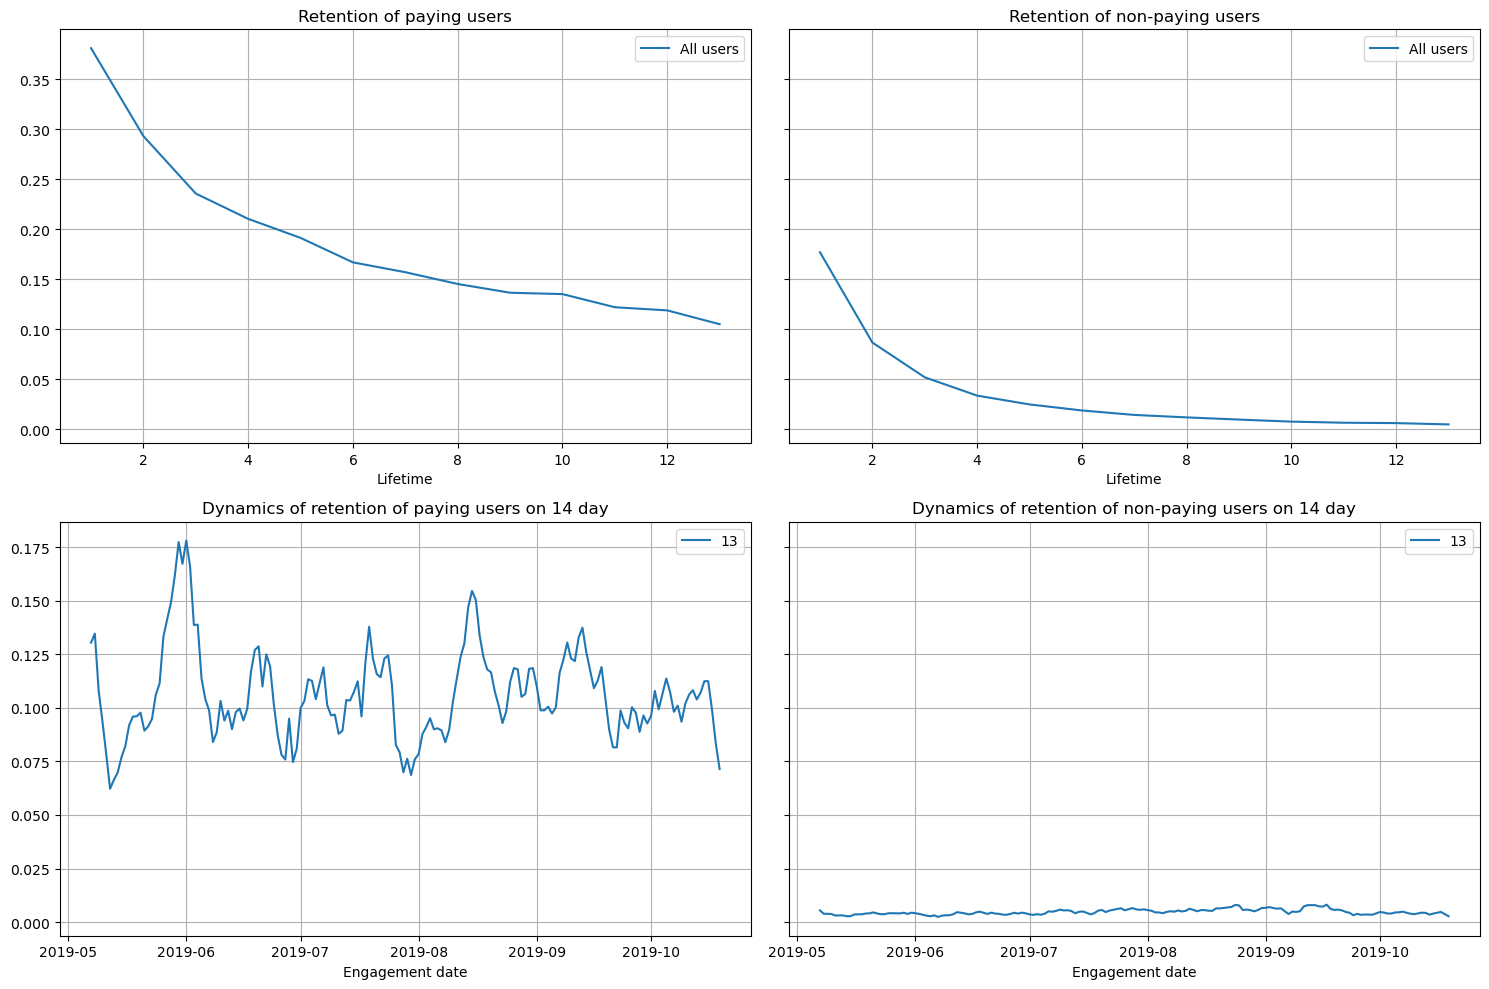

In [92]:
plot_retention(retention_grouped, retention_history, horizon_days) 

In general, we see that only 10% of paying users continue to log into the application on the 10th day after the first login. At the same time, retention does not grow in dynamics, as well as conversion. That is, it is necessary to change advertising in favor of those channels and devices where retention and conversion are growing.
If we talk about non-paying users, then by the end of the second week almost no one enters the application. 

The retention of paying users at the end of the second week in dynamics in October fell significantly. This may mean that advertising in October attracted customers who are less interested in the application, fewer target customers. Or the application does not meet the expectations of users. Even despite the purchase, they began to lose interest in it.

Accordingly, it is possible that the channels of attraction used in October attract fewer quality customers. Or some innovations in the application scare away users.

#### Let's analyze the payback of advertising by device

##### LTV and ROI charts, charts of LTV, CAC and ROI in dynamics

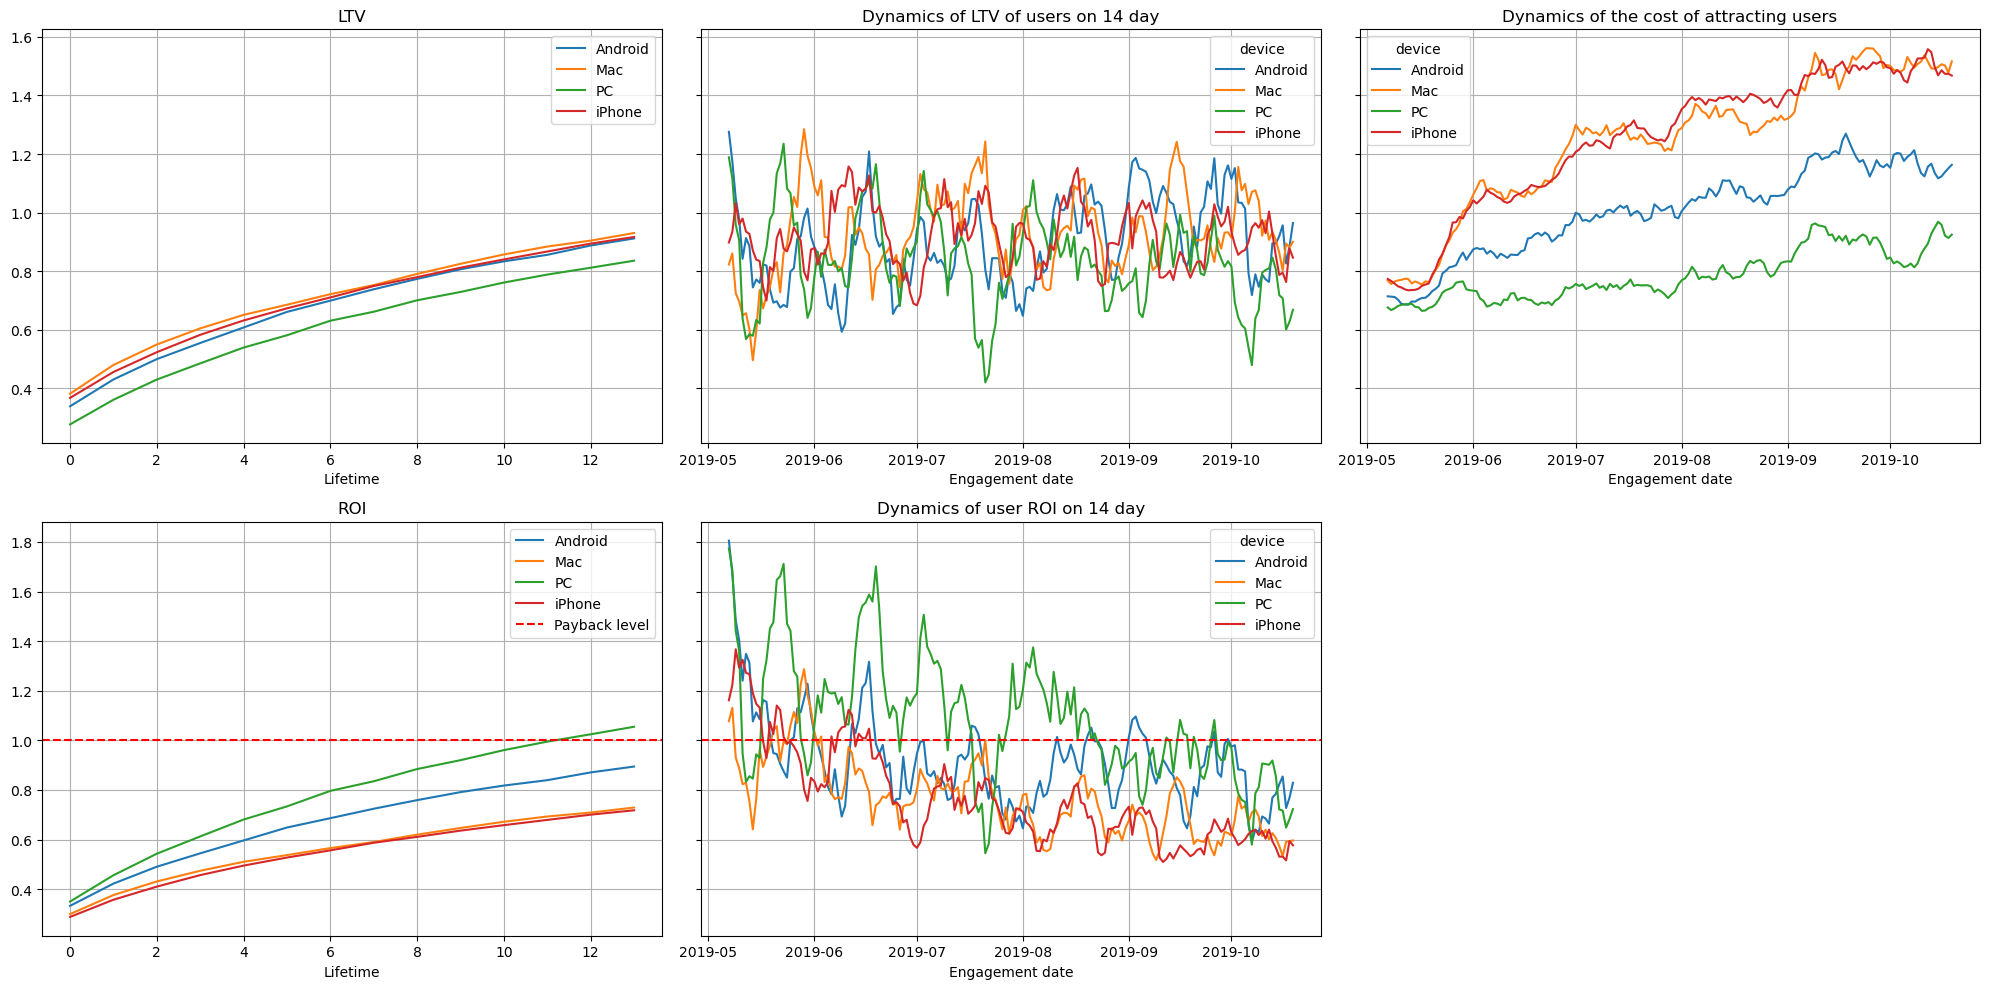

In [93]:
dimensions = ['device']

ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_ltv_roi(ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days) 

The cost of advertising expenses per user using a PC is the lowest. It was this device that showed an ROI above 1 in total for the period under review from May to October. That is, the investment in advertising for users with these devices has paid off. But still, judging by the dynamics of ROI since the second half of August, even PC users have not been paying off stably.

LTV is almost the same for Android, iPhone and Mac, and PC lags behind the top three. But the cost of advertising for a PC is lower than everyone else, so its ROI is better. This may indicate that the quality of advertising is a key factor, and it should be reduced.

##### Study the conversion by device

In [94]:
conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles,
    orders,
    observation_date,
    horizon_days,
    dimensions=['device'],
    ignore_horizon=False)

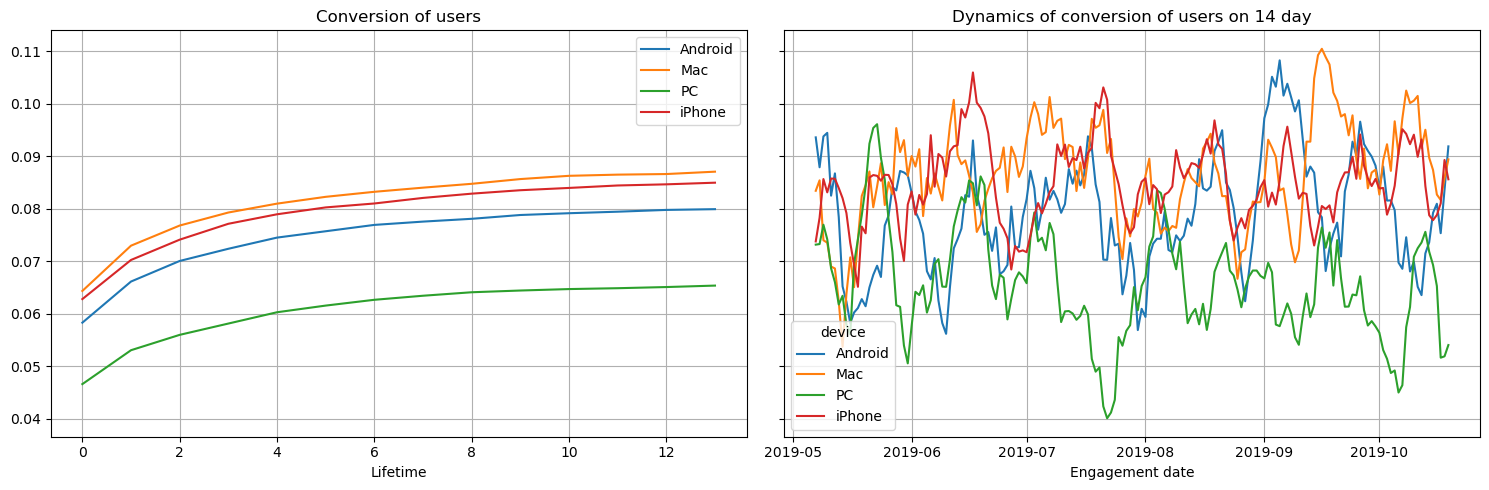

In [95]:
plot_conversion(conversion_grouped, conversion_history, horizon_days) 

The conversion rate is the best for Mac and iPhone. But again, we remember that only the PC pays off. If we find suitable advertising channels for Mac and iPhone, as well as find the right countries where advertising works, then we can significantly improve the indicators. This is also important because the iPhone is the most popular device among users. Through it, we can attract more customers and we need to use it.

#####  Retention by device

In [96]:
retention_raw, retention_grouped, retention_history  = get_retention(
    profiles,
    visits,
    observation_date,
    horizon_days,
    dimensions=['device'],
    ignore_horizon=False,
)

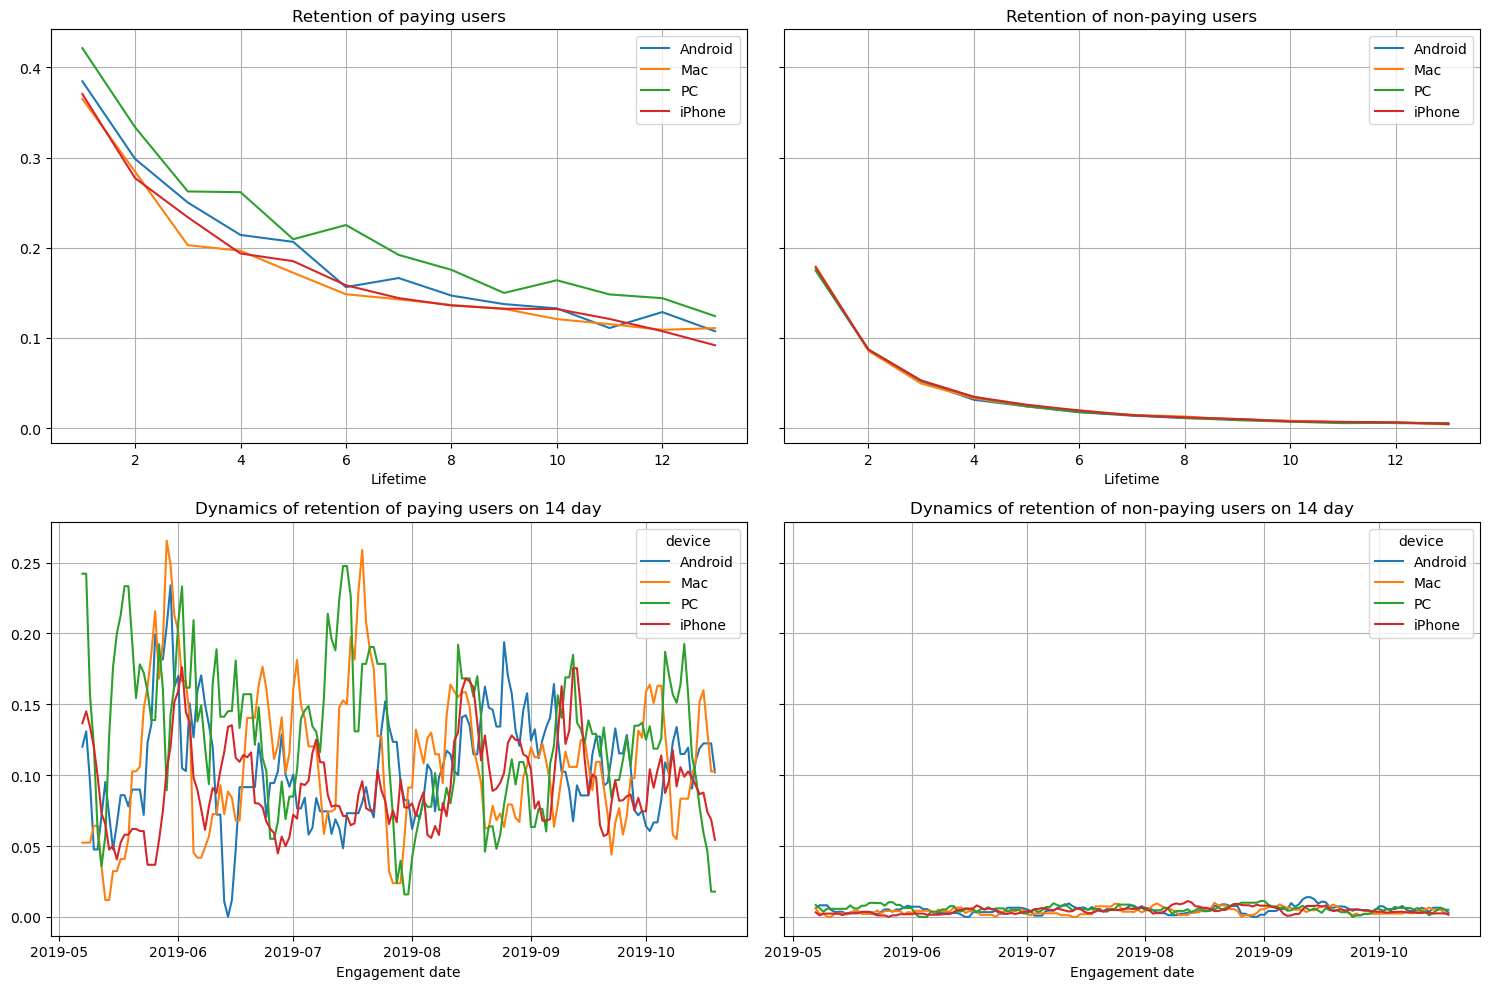

In [97]:
plot_retention(retention_grouped, retention_history, horizon_days) 

The retention rate of non-paying users is the same across all devices. For paying PC users, it is slightly better than the rest.
PC retention has been deteriorating over the past few weeks. The retention of other users in dynamics is also changing quite a lot, but in a narrower range and does not fall as much as the PC in recent weeks.

#### Analysis of the payback of advertising by country. LTV and ROI graphs, as well as LTV, CAC and ROI dynamics graphs¶

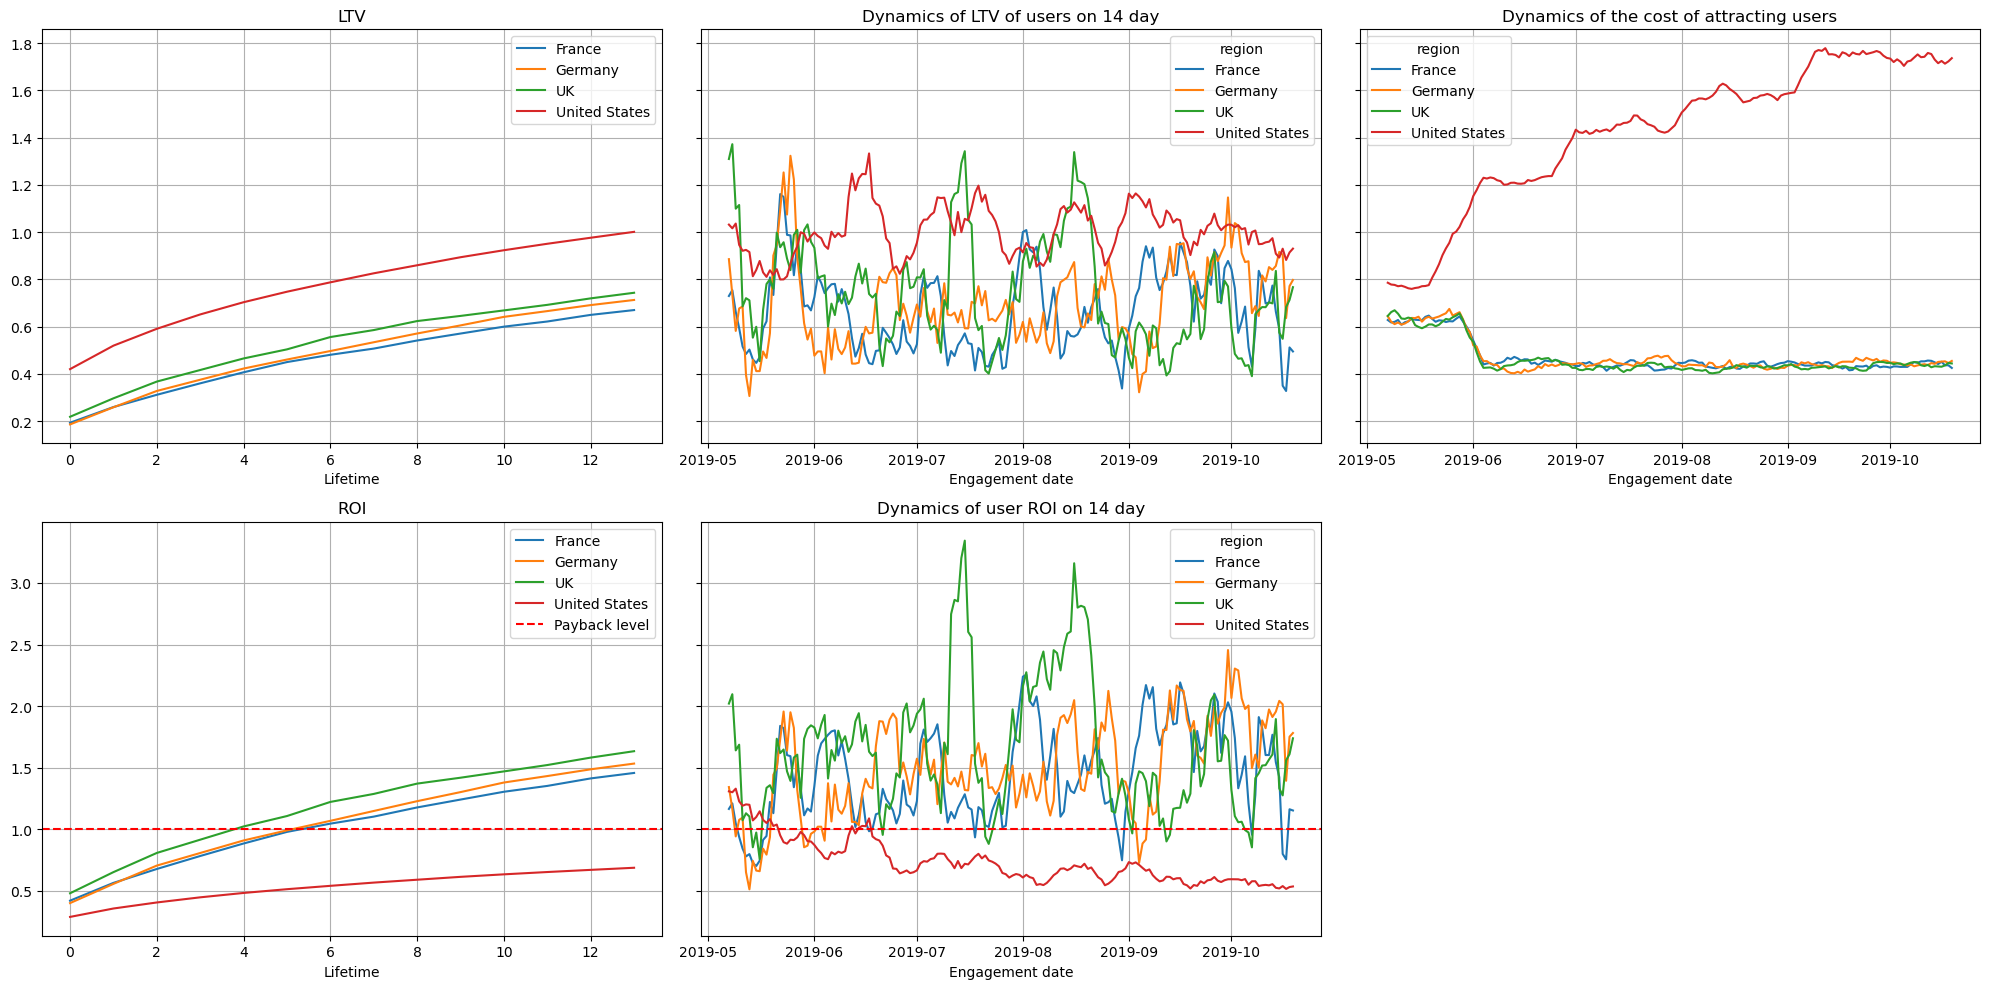

In [98]:
dimensions = ['region']

ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_ltv_roi(ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days) 

All countries, both in dynamics and in general pay off with the exception of the USA. At the same time, LTV in the USA is the highest, but advertising costs are much higher, so it is urgent to revise the advertising strategy in the USA. Advertising in the United States is a weak link, and it pulls the indicators down.

Let's see what the grouping by device looks like if we exclude users from the USA.

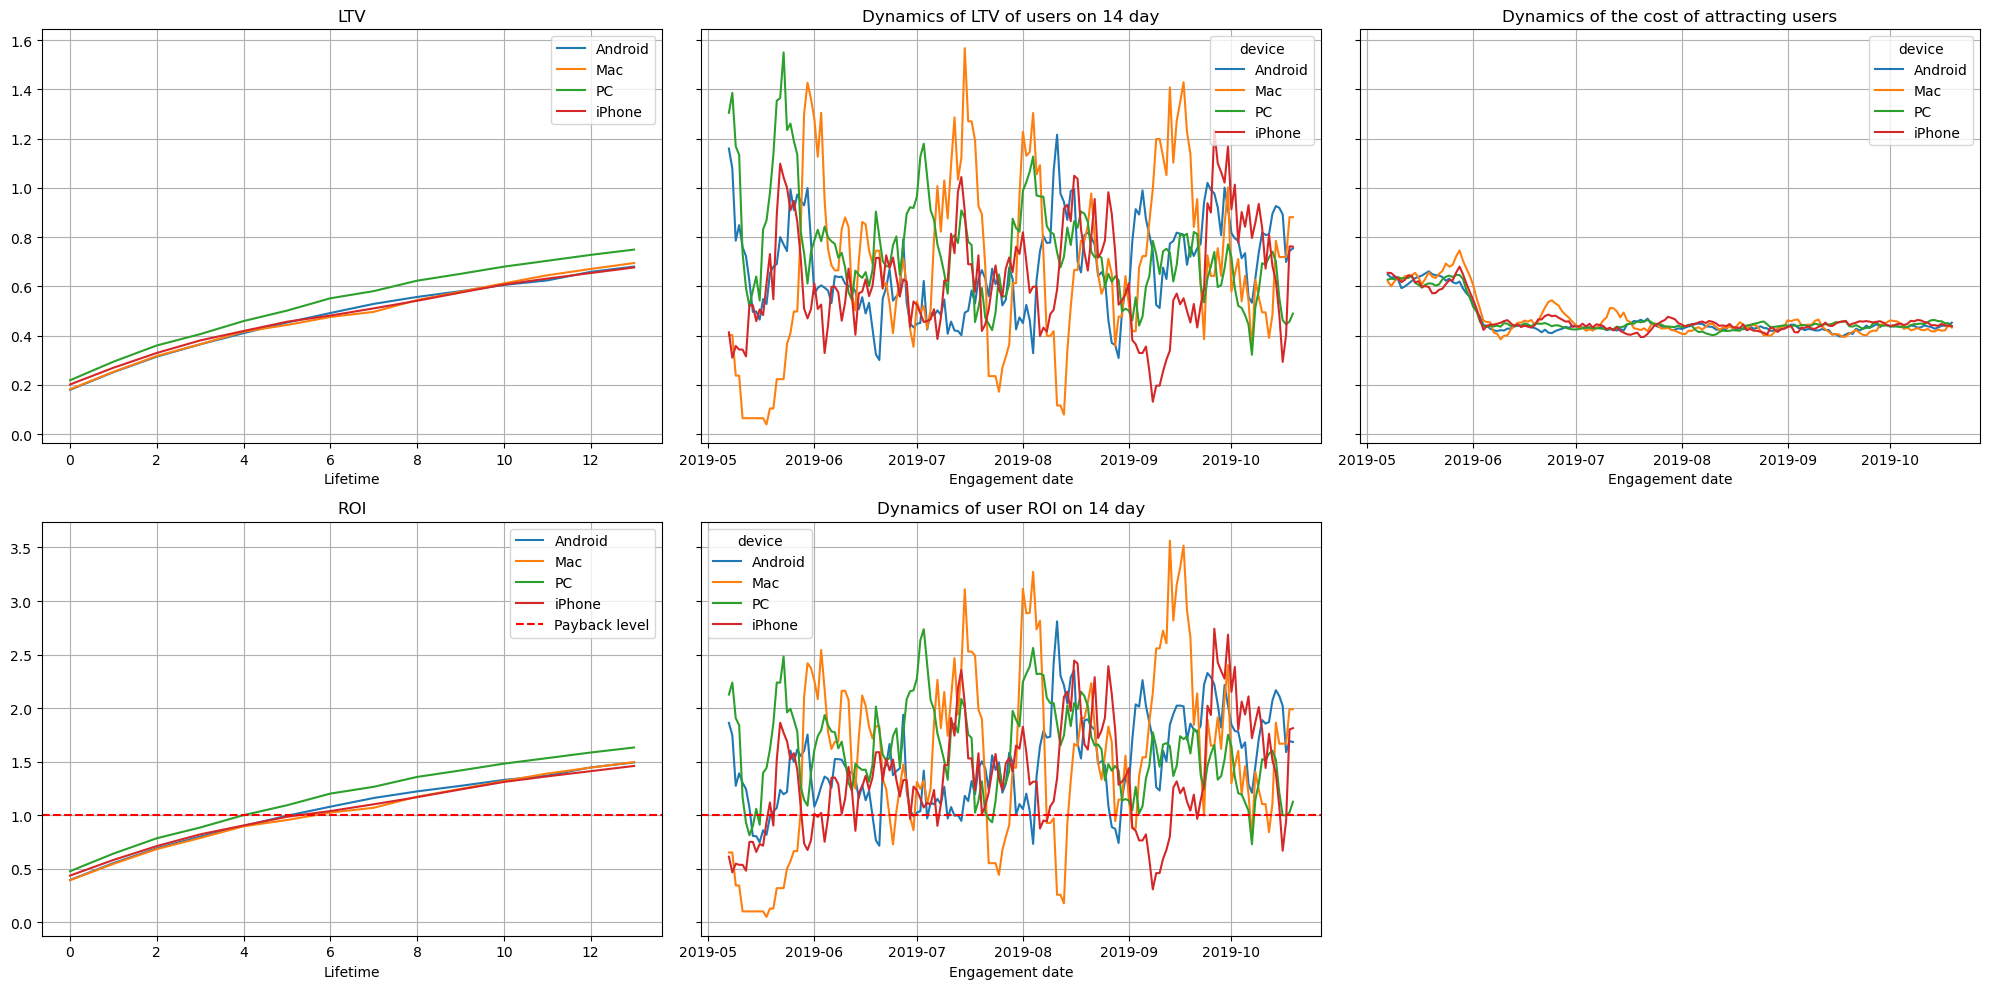

In [99]:
dimensions = ['device']

profiles_not_USA = profiles.query('region != "United States"')

ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles_not_USA, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_ltv_roi(ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days) 

Advertising for users outside the US pays off best for PC. Judging by the dynamics of ROI on the 14th day, sometimes advertising for Mac and iPhone does not pay off. For Android and PC, it pays off stably. Let's look separately at PC and Android.

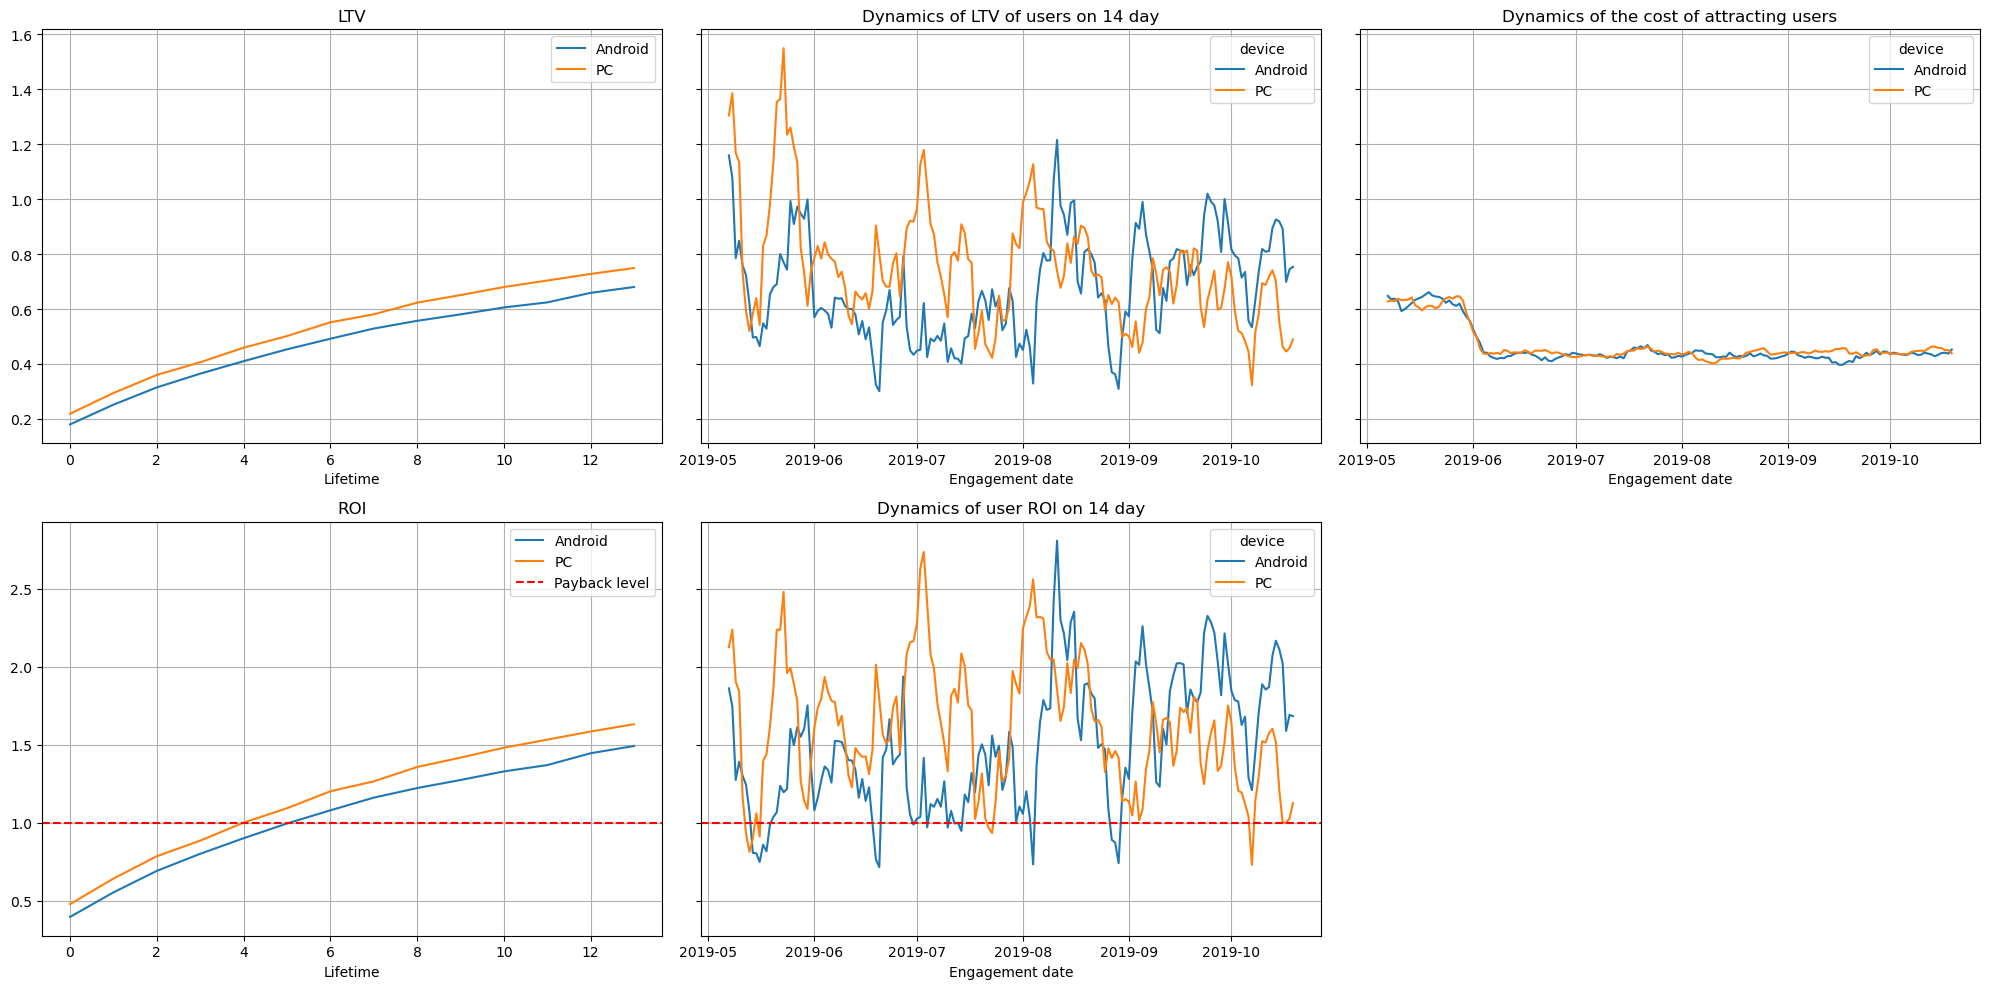

In [100]:
dimensions = ['device']

profiles_not_USA_PC_Android = profiles.query('region != "United States" and device in ["PC","Android"]')

ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles_not_USA_PC_Android, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_ltv_roi(ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days)

The dynamics of payback for the PC on the 14th day says that, starting from August, there is a decrease in payback. Android has always had a lot of volatility, the trend is not visible.

Let's see which devices show the best and worst payback in the USA.

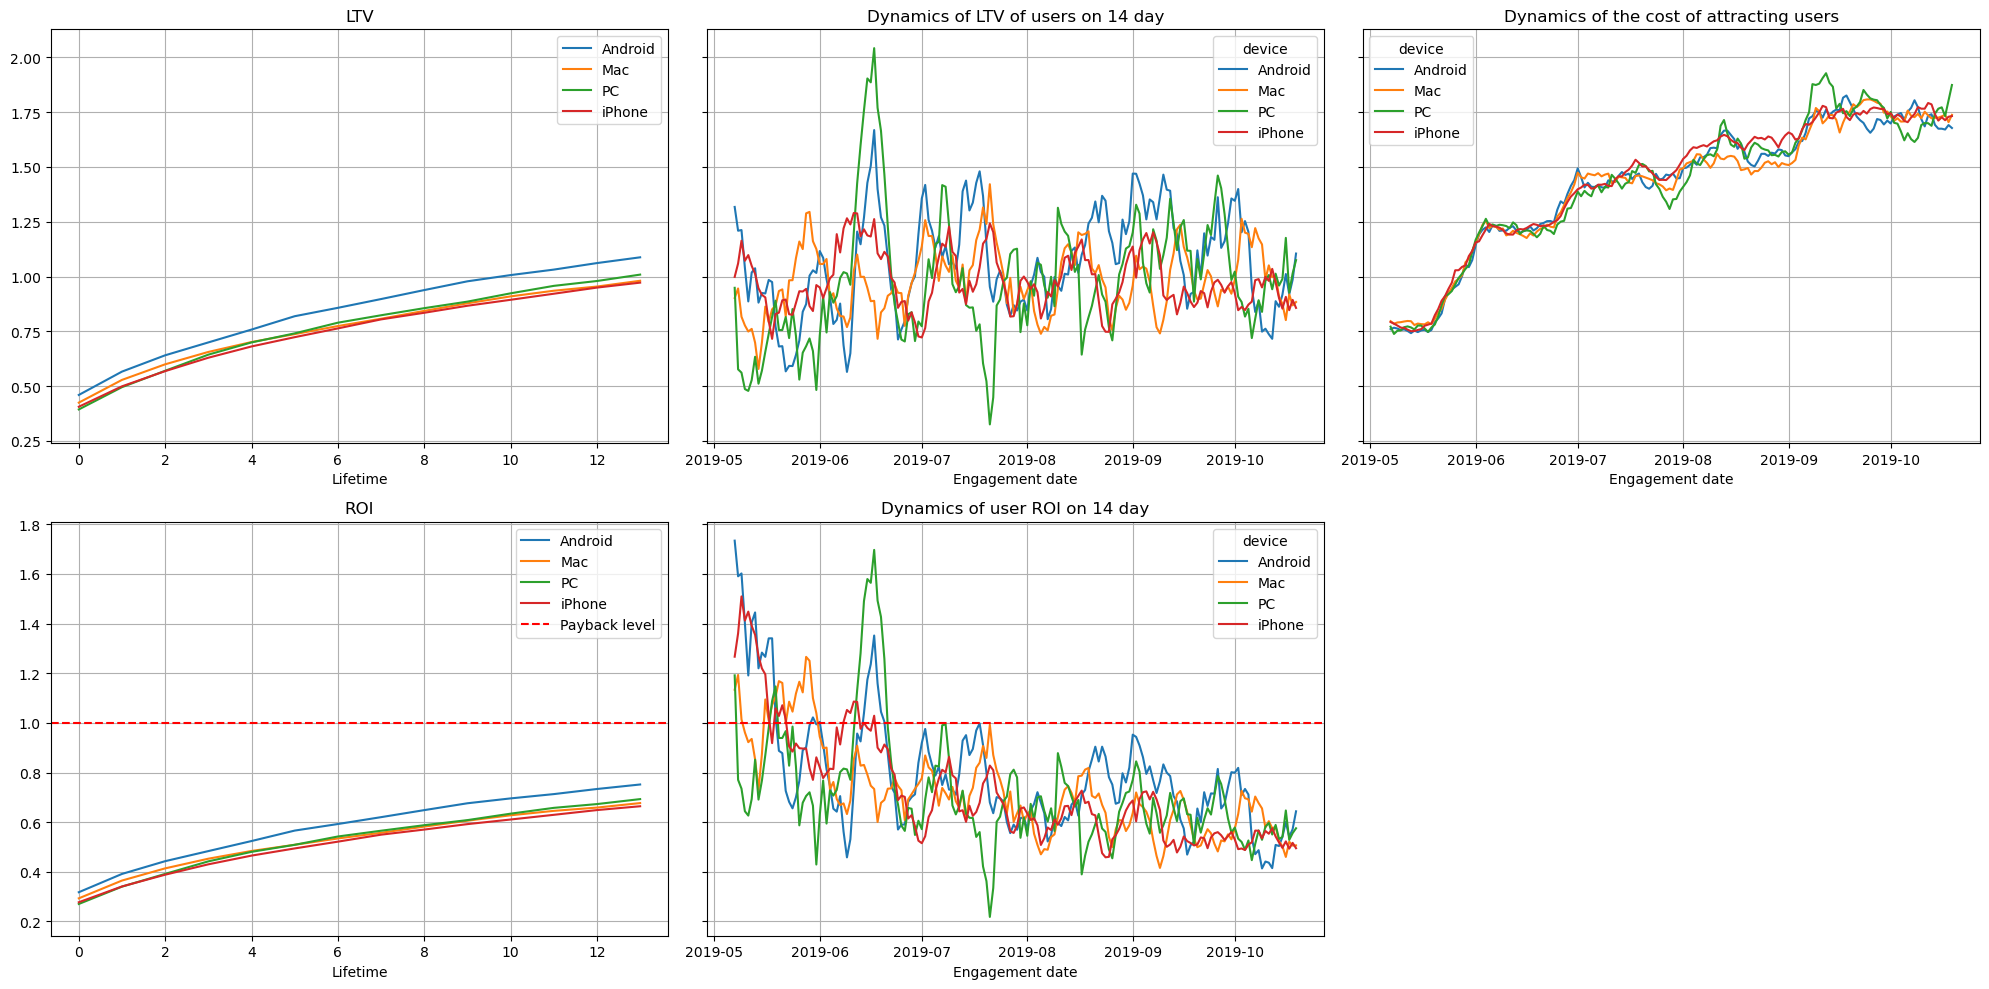

In [101]:
dimensions = ['device']

profiles_USA = profiles.query('region == "United States"')

ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles_USA, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_ltv_roi(ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days)

So far, it has not been possible to choose the best and worst devices for the USA. Everything doesn't pay off. Perhaps a breakdown by channels will give an answer.

##### Let's study retention by country

In [102]:
retention_raw, retention_grouped, retention_history  = get_retention(
    profiles,
    visits,
    observation_date,
    horizon_days,
    dimensions=['region'],
    ignore_horizon=False,
)

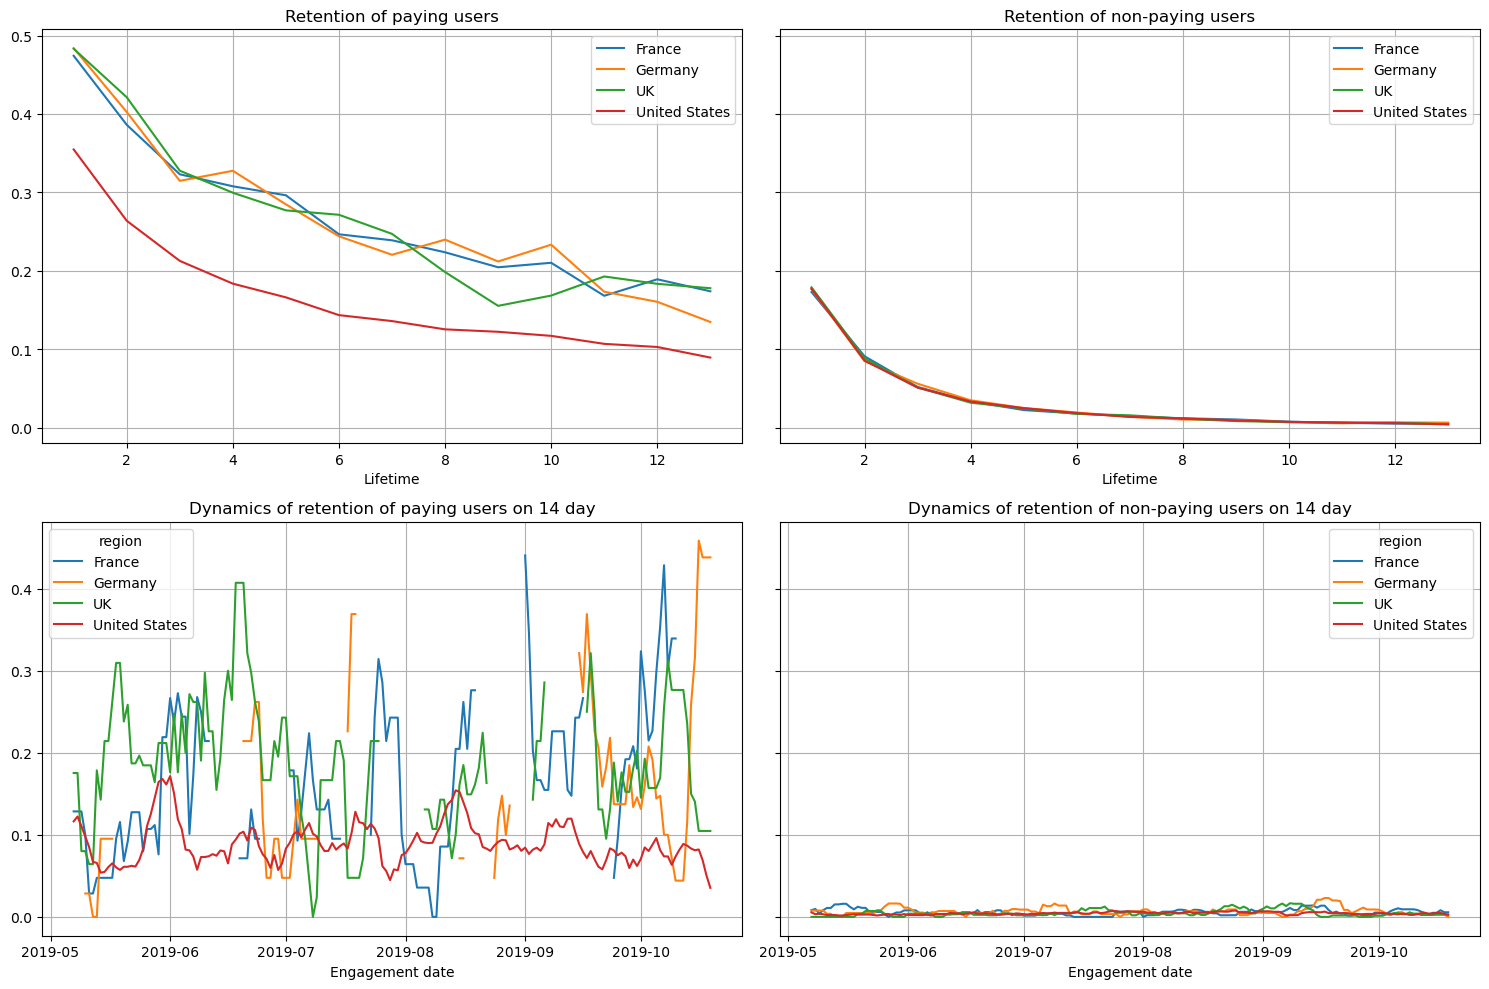

In [103]:
plot_retention(retention_grouped, retention_history, horizon_days) 

The retention of paying users in the USA is the smallest. The rest of the countries are comparable. For non-paying users, the retention in all countries is almost the same.\
Retention of US users is important, as this country accounts for the largest share of customers. The retention of users in Germany sharply shot up in the second half of October. It will be possible to see which channels and devices were involved in advertising for German users in October.

##### Conversion by country

In [104]:
conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles,
    orders,
    observation_date,
    horizon_days,
    dimensions=['region'],
    ignore_horizon=False)

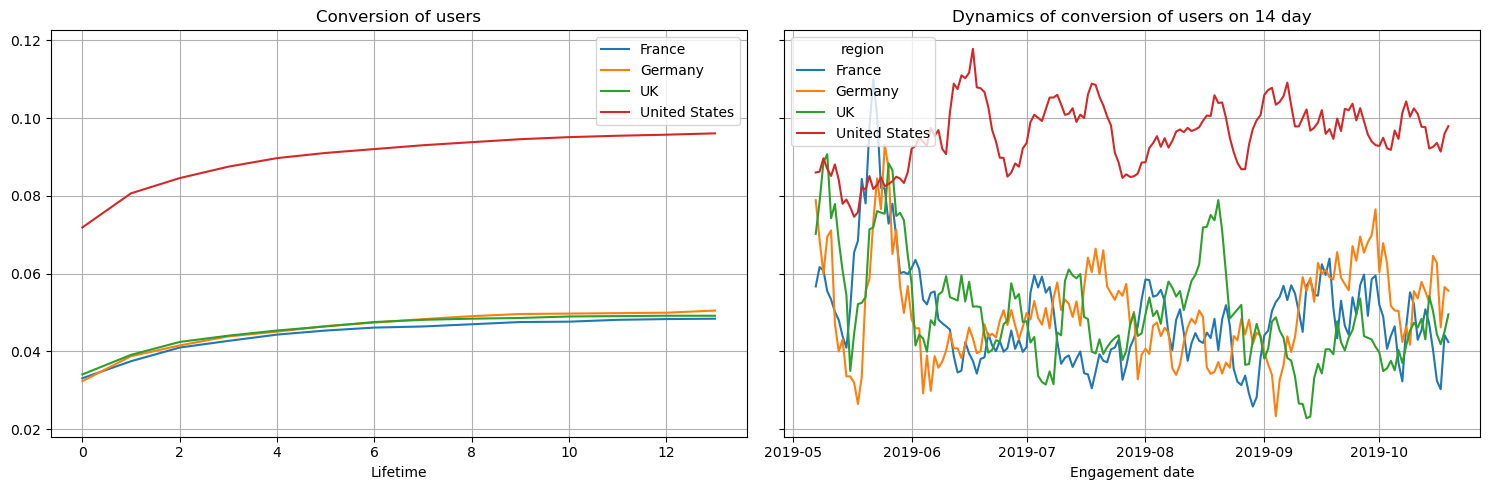

In [105]:
plot_conversion(conversion_grouped, conversion_history, horizon_days) 

The conversion rate of users from the USA is the highest. It remains only to raise the retention and with a high conversion it will be possible to increase revenue.

#### Let's analyze the payback of advertising by advertising channels

##### Firstly, let's look at all countries

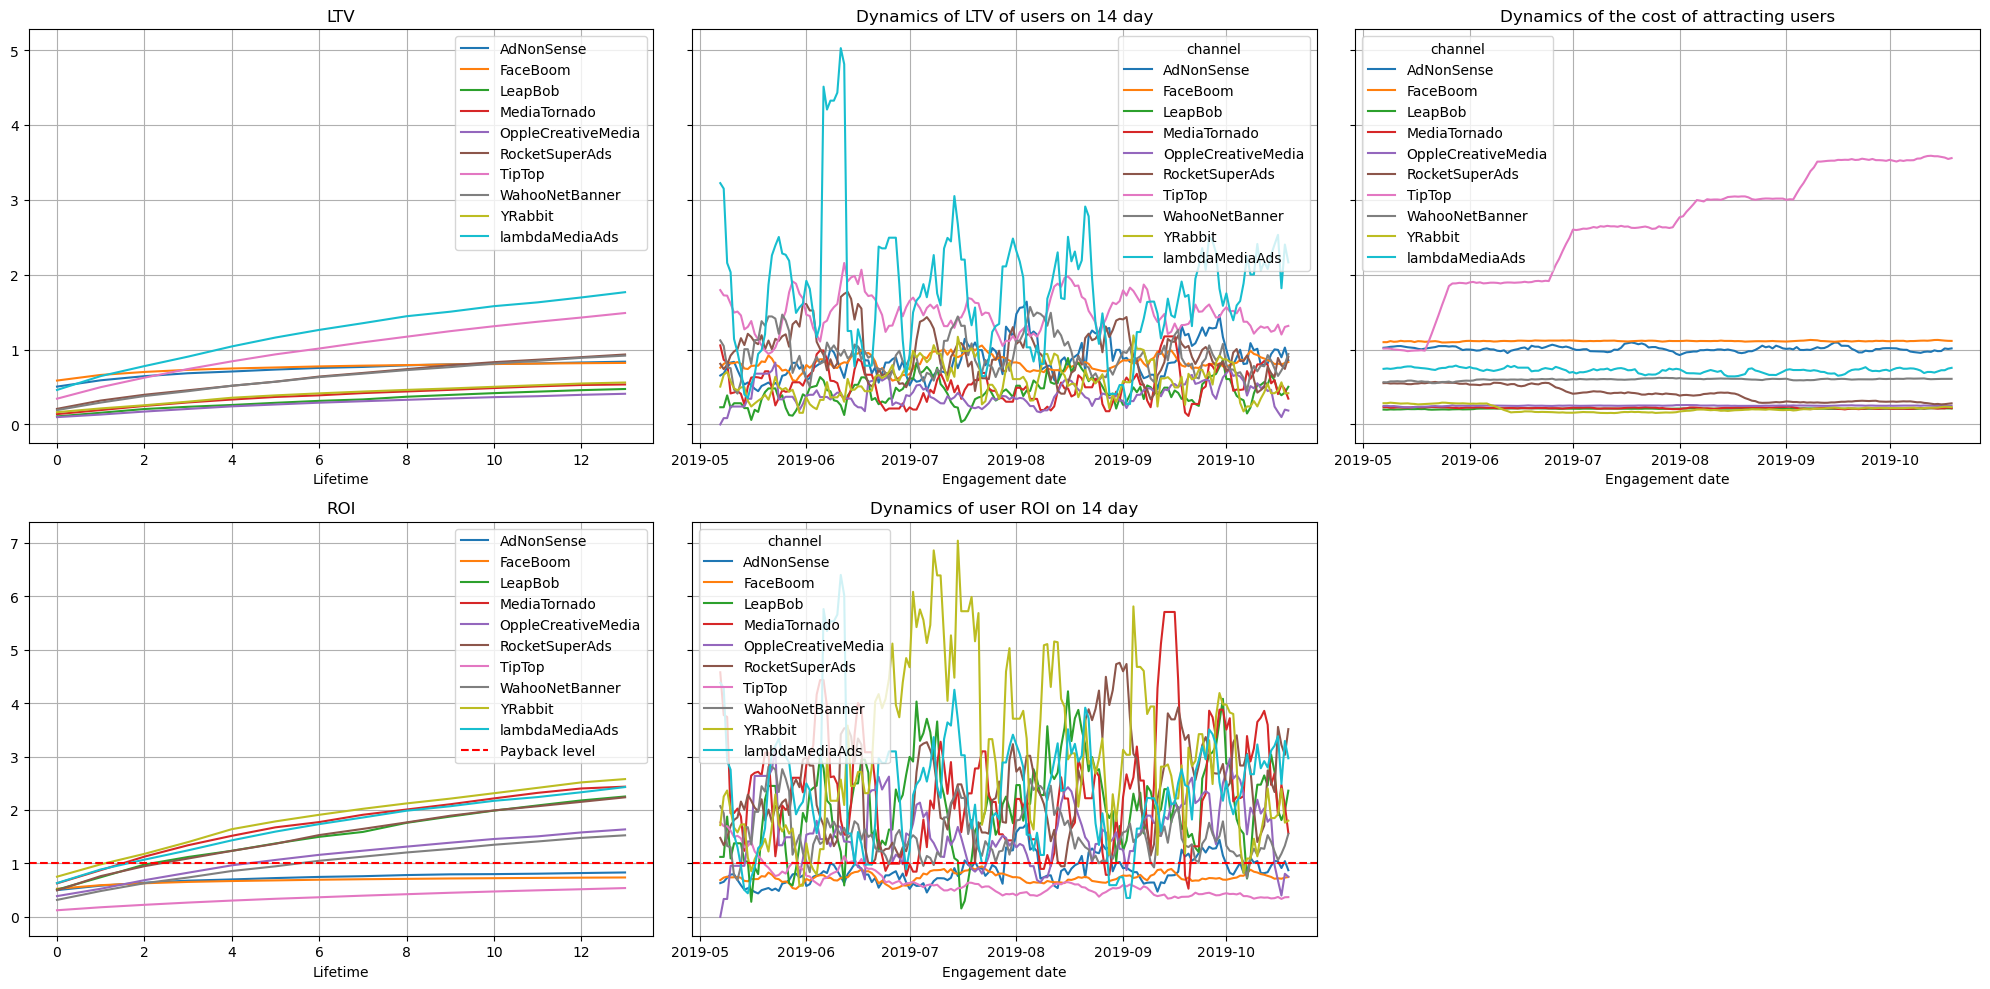

In [106]:
dimensions = ['channel']

ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_ltv_roi(ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days)

Let's see which channels did not pay off, and what payback they have in dynamics.

In [107]:
roi_less1 = roi_grouped[roi_grouped[13]<1]
roi_less1

cohort_size       cac       0.0       1.0       2.0       3.0  \
channel                                                                     
AdNonSense         3702  1.008023  0.501010  0.584460  0.639288  0.678069   
FaceBoom          27544  1.113419  0.526040  0.593510  0.629343  0.654599   
TipTop            18498  2.757774  0.124575  0.180359  0.226321  0.268272   

                 4.0       5.0       6.0       7.0       8.0       9.0  \
channel                                                                  
AdNonSense  0.701069  0.726752  0.748147  0.761519  0.782922  0.796294   
FaceBoom    0.671035  0.682914  0.695801  0.704818  0.711685  0.719204   
TipTop      0.305449  0.339298  0.367570  0.397585  0.424763  0.451627   

                10.0      11.0      12.0      13.0  
channel                                             
AdNonSense  0.800573  0.808597  0.820631  0.831337  
FaceBoom    0.724119  0.729488  0.734210  0.737790  
TipTop      0.475535  0.497310  0.517679  0.539532

In [108]:
roi_less1 = roi_less1.drop(columns=['cohort_size', 'cac'])

roi_history_less1 = roi_history.query('channel in ["AdNonSense", "FaceBoom", "TipTop"]')
cac_history_less1 = roi_history_less1[['cac']]
roi_history_less1 = roi_history_less1.drop(columns=['cohort_size', 'cac'])

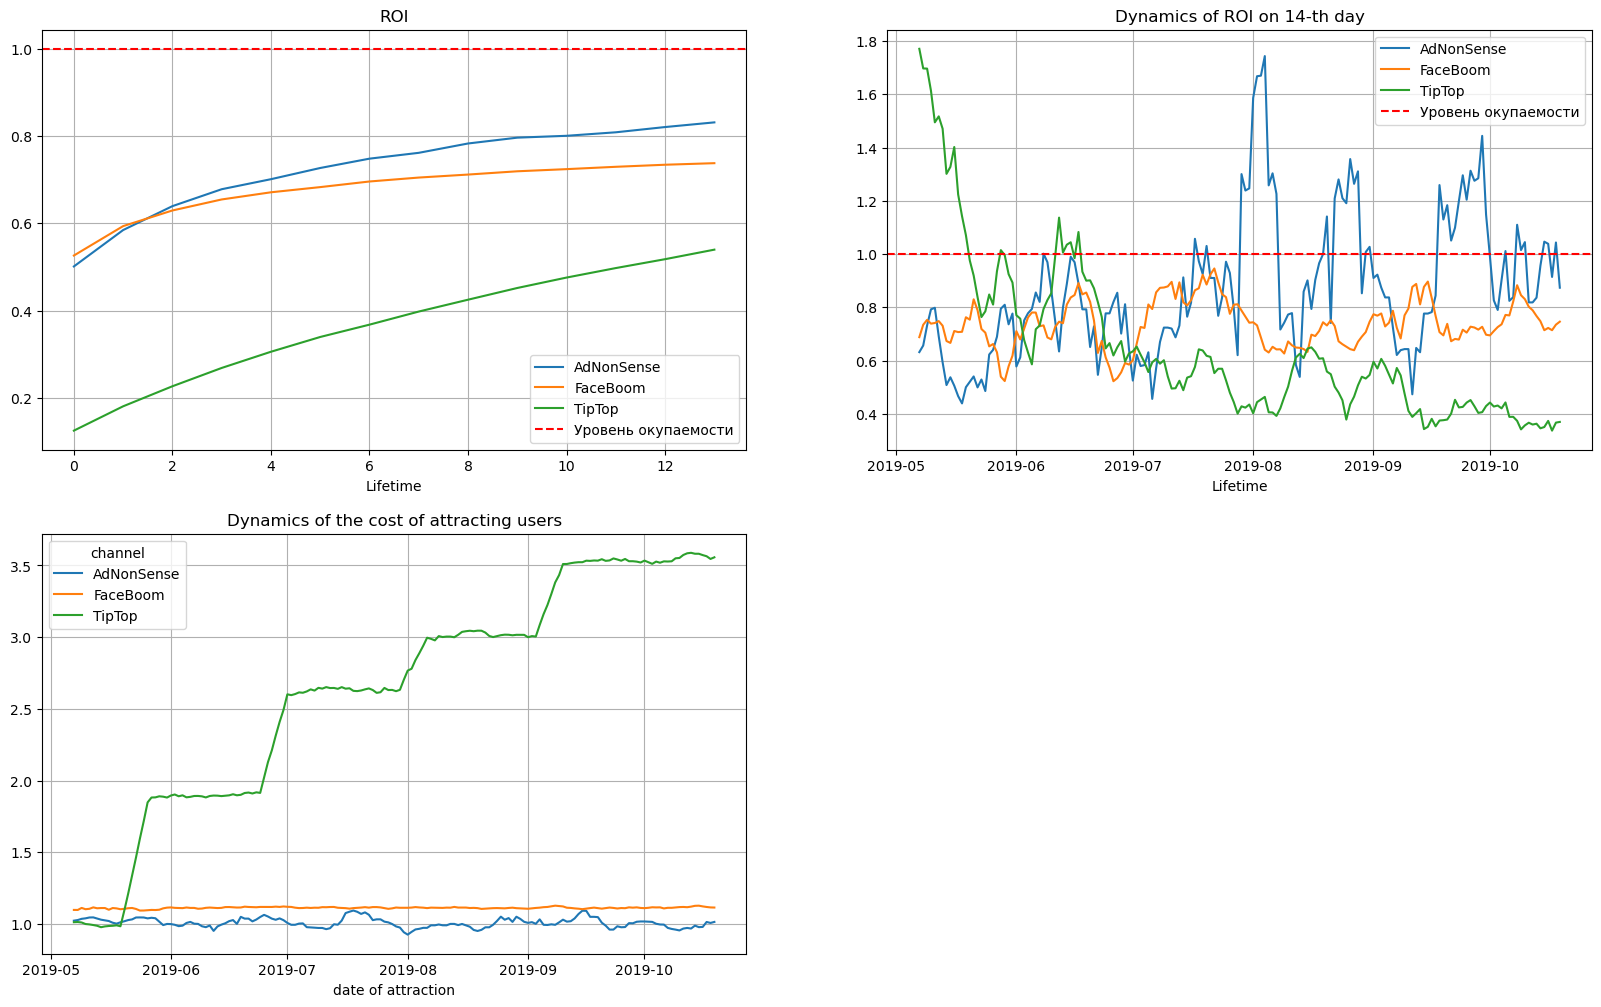

In [109]:
plt.figure(figsize=(20, 12))

ax1 = plt.subplot(2, 2, 1)
roi_less1.T.plot(grid=True, ax=ax1)
plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
plt.legend()
plt.xlabel('Lifetime')
plt.title('ROI')

ax2 = plt.subplot(2, 2, 2)
columns = [name for name in roi_history.index.names if name not in ['dt']]
roi_history_less1 = roi_history_less1.pivot_table(
    index='dt', columns=columns, values=13, aggfunc='mean')
filter_data(roi_history_less1, 7).plot(grid=True, ax=ax2)    
plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
plt.legend()
plt.xlabel('Lifetime')
plt.title('Dynamics of ROI on 14-th day')

ax3 = plt.subplot(2, 2, 3)
columns = [name for name in cac_history_less1.index.names if name not in ['dt']]
cac_history_less1 = cac_history_less1.pivot_table(
index='dt', columns=columns, values='cac', aggfunc='mean')
filter_data(cac_history_less1, 7).plot(grid=True, ax=ax3)
plt.xlabel('date of attraction')
plt.title('Dynamics of the cost of attracting users')


plt.show()

We get that those advertising sources that cost the most have not paid off. Didn't pay off: "Ad Non Sense", "Faceboom", "Tip Top".

That is, we need to move away from these advertising sources, since sales do not allow us to cover the cost of such advertising. Now let's look at the profitability of advertising sources excluding the United States.

##### Payback of advertising channels in Europe

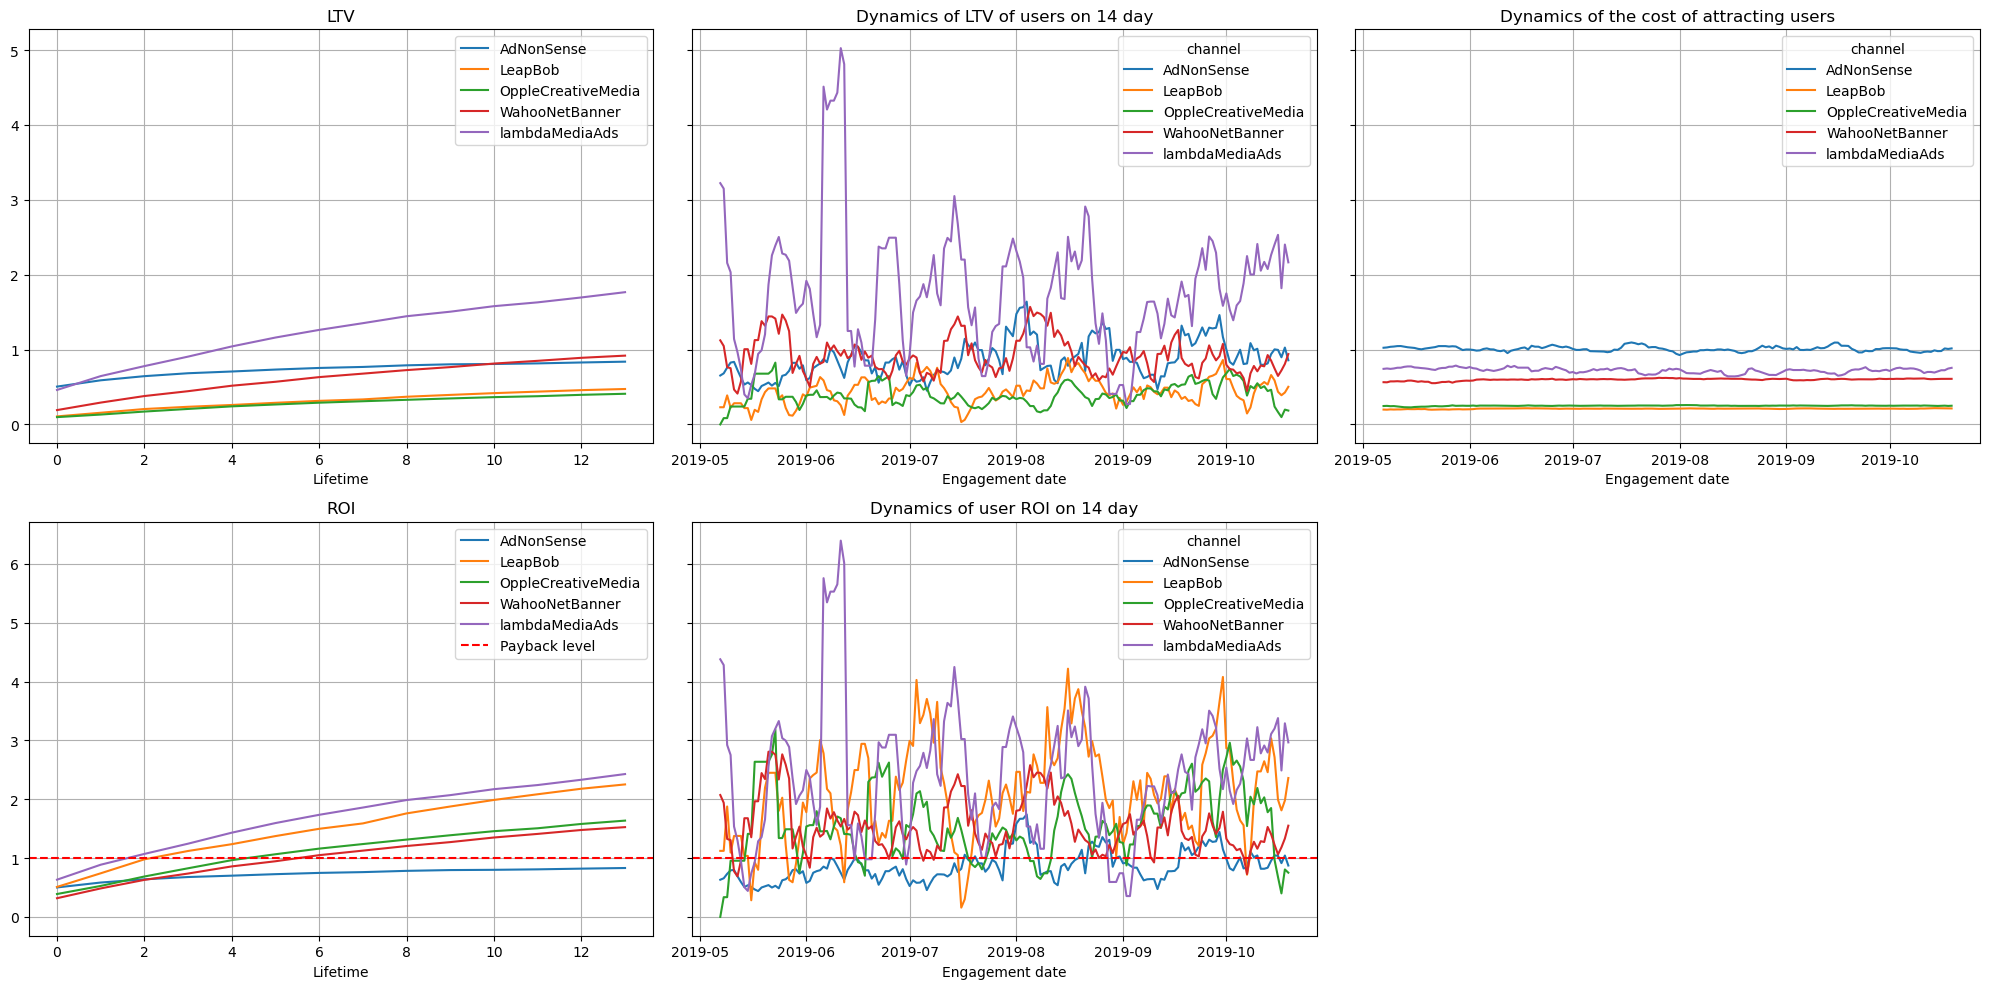

In [110]:
profiles_not_USA = profiles.query('region != "United States"')

dimensions = ['channel']

ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles_not_USA, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_ltv_roi(ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days)

The AdNonSense channel is still not paying off. So we need to give it up. LambdaMediaAds and LeapBob have the best ROI in dynamics and for the period from May to October. If the retention and conversion are good, then we can advertise through them more often.

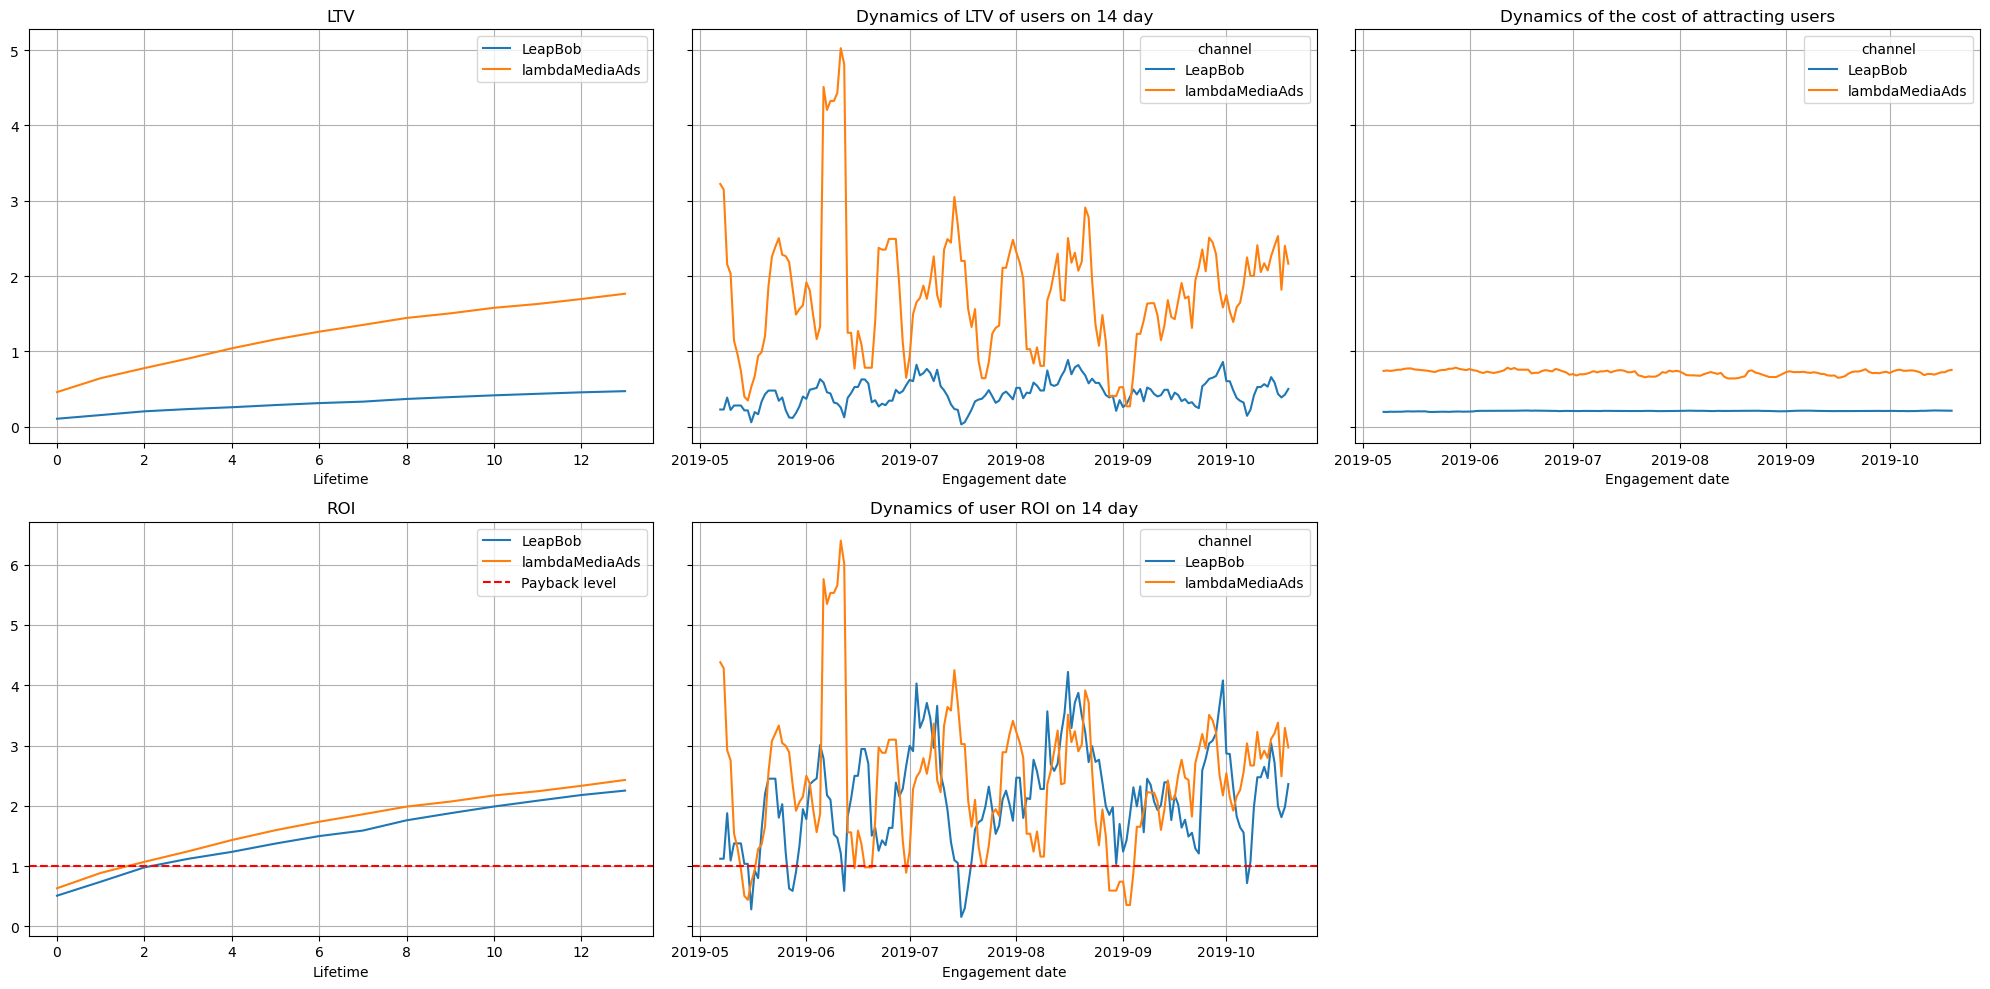

In [111]:
profiles_not_USA_best_roi = profiles.query('region != "United States" and channel in ["lambdaMediaAds", "LeapBob"]')

dimensions = ['channel']

ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles_not_USA_best_roi, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_ltv_roi(ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days)

#####  Conversion and retention of all profitable channels in Europe

In [112]:
profiles_not_USA_best_roi = (profiles
.query('region != "United States" and channel in ["lambdaMediaAds", "LeapBob", "OppleCreativeMedia","WahooNetBanner"]'))

conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles_not_USA_best_roi,
    orders,
    observation_date,
    horizon_days,
    dimensions=['region'],
    ignore_horizon=False)

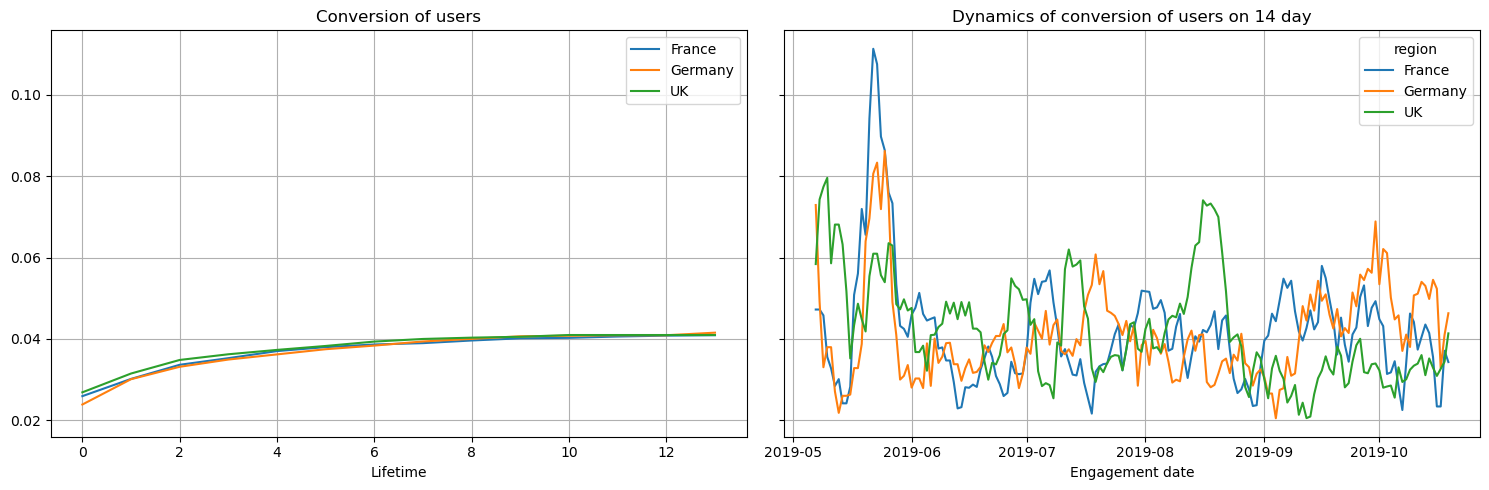

In [113]:
plot_conversion(conversion_grouped, conversion_history, horizon_days) 

By country, the conversion rate is the same in Europe. Let's see what is broken down by channels.

In [114]:
profiles_not_USA_best_roi = (profiles
.query('region != "United States" and channel in ["lambdaMediaAds", "LeapBob", "OppleCreativeMedia","WahooNetBanner"]'))

conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles_not_USA_best_roi,
    orders,
    observation_date,
    horizon_days,
    dimensions=['channel'],
    ignore_horizon=False)

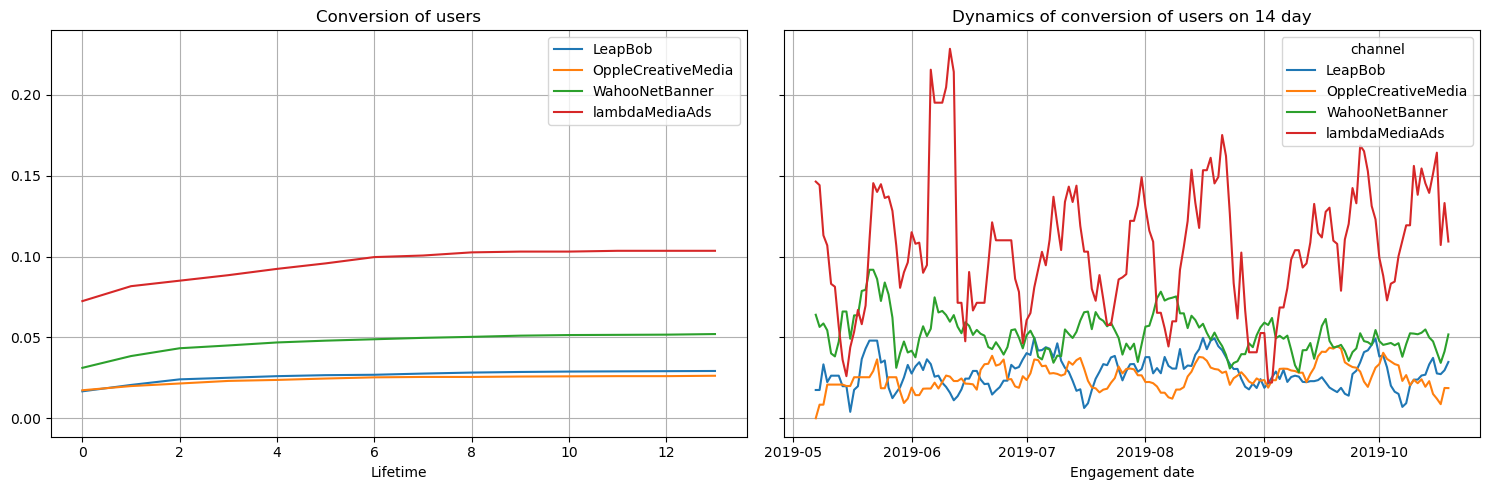

In [115]:
plot_conversion(conversion_grouped, conversion_history, horizon_days) 

"lambdaMediaAds" has a good conversion rate, but "LeapBob", "OppleCreativeMedia" and "WahooNetBanner" have a low one. Let's look at the retention.

In [116]:
retention_raw, retention_grouped, retention_history  = get_retention(
    profiles_not_USA_best_roi,
    visits,
    observation_date,
    horizon_days,
    dimensions=['region'],
    ignore_horizon=False,
)

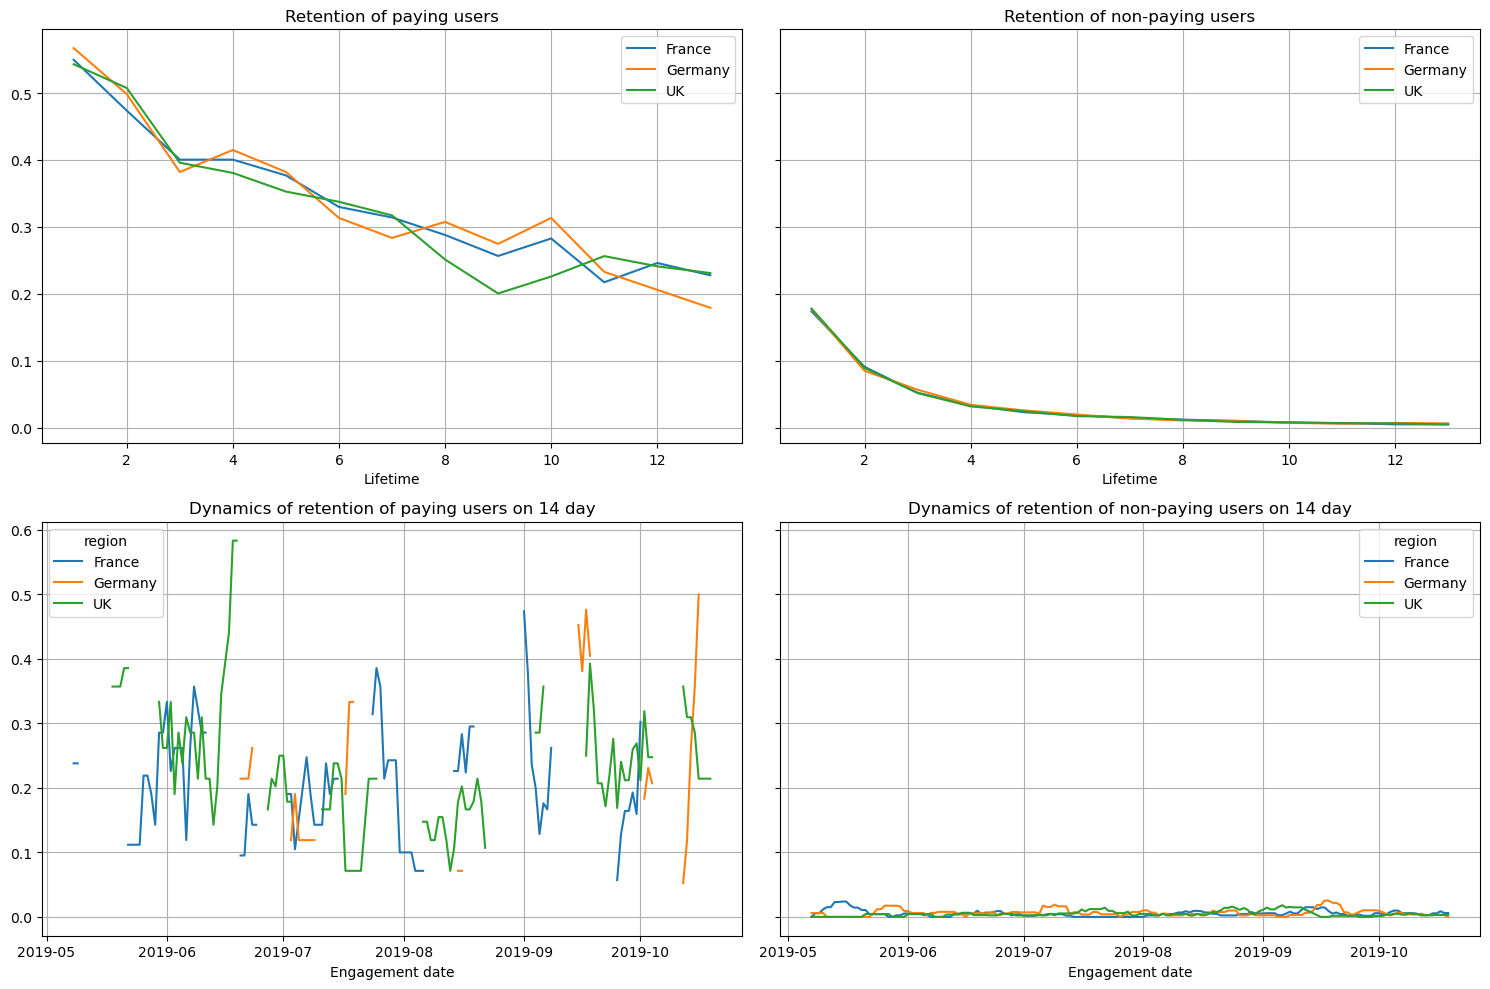

In [117]:
plot_retention(retention_grouped, retention_history, horizon_days) 

Retention by country for profitable channels is approximately the same. Let's look at the breakdown by channels.

In [118]:
retention_raw, retention_grouped, retention_history  = get_retention(
    profiles_not_USA_best_roi,
    visits,
    observation_date,
    horizon_days,
    dimensions=['channel'],
    ignore_horizon=False,
)

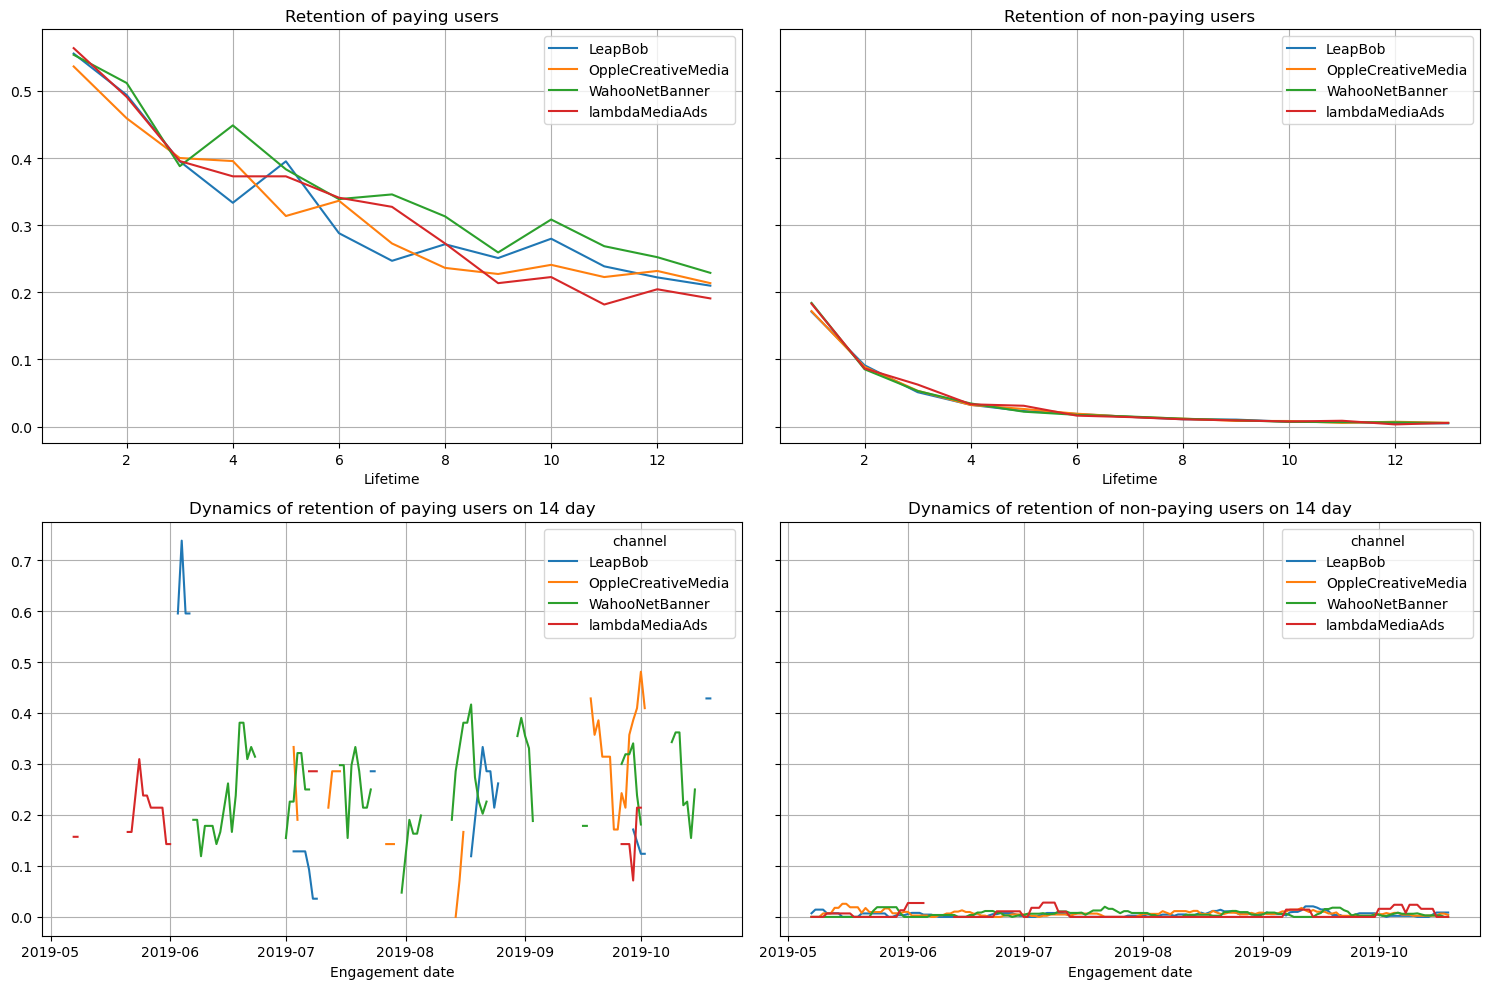

In [119]:
plot_retention(retention_grouped, retention_history, horizon_days) 

Retention is close to all cost-effective sources of users for Europe. But given the fact that lambdaMediaAds has a significantly higher conversion rate, it is better to attract users from lambdaMediaAds in Europe.

##### Let's look at the payback of advertising in the USA

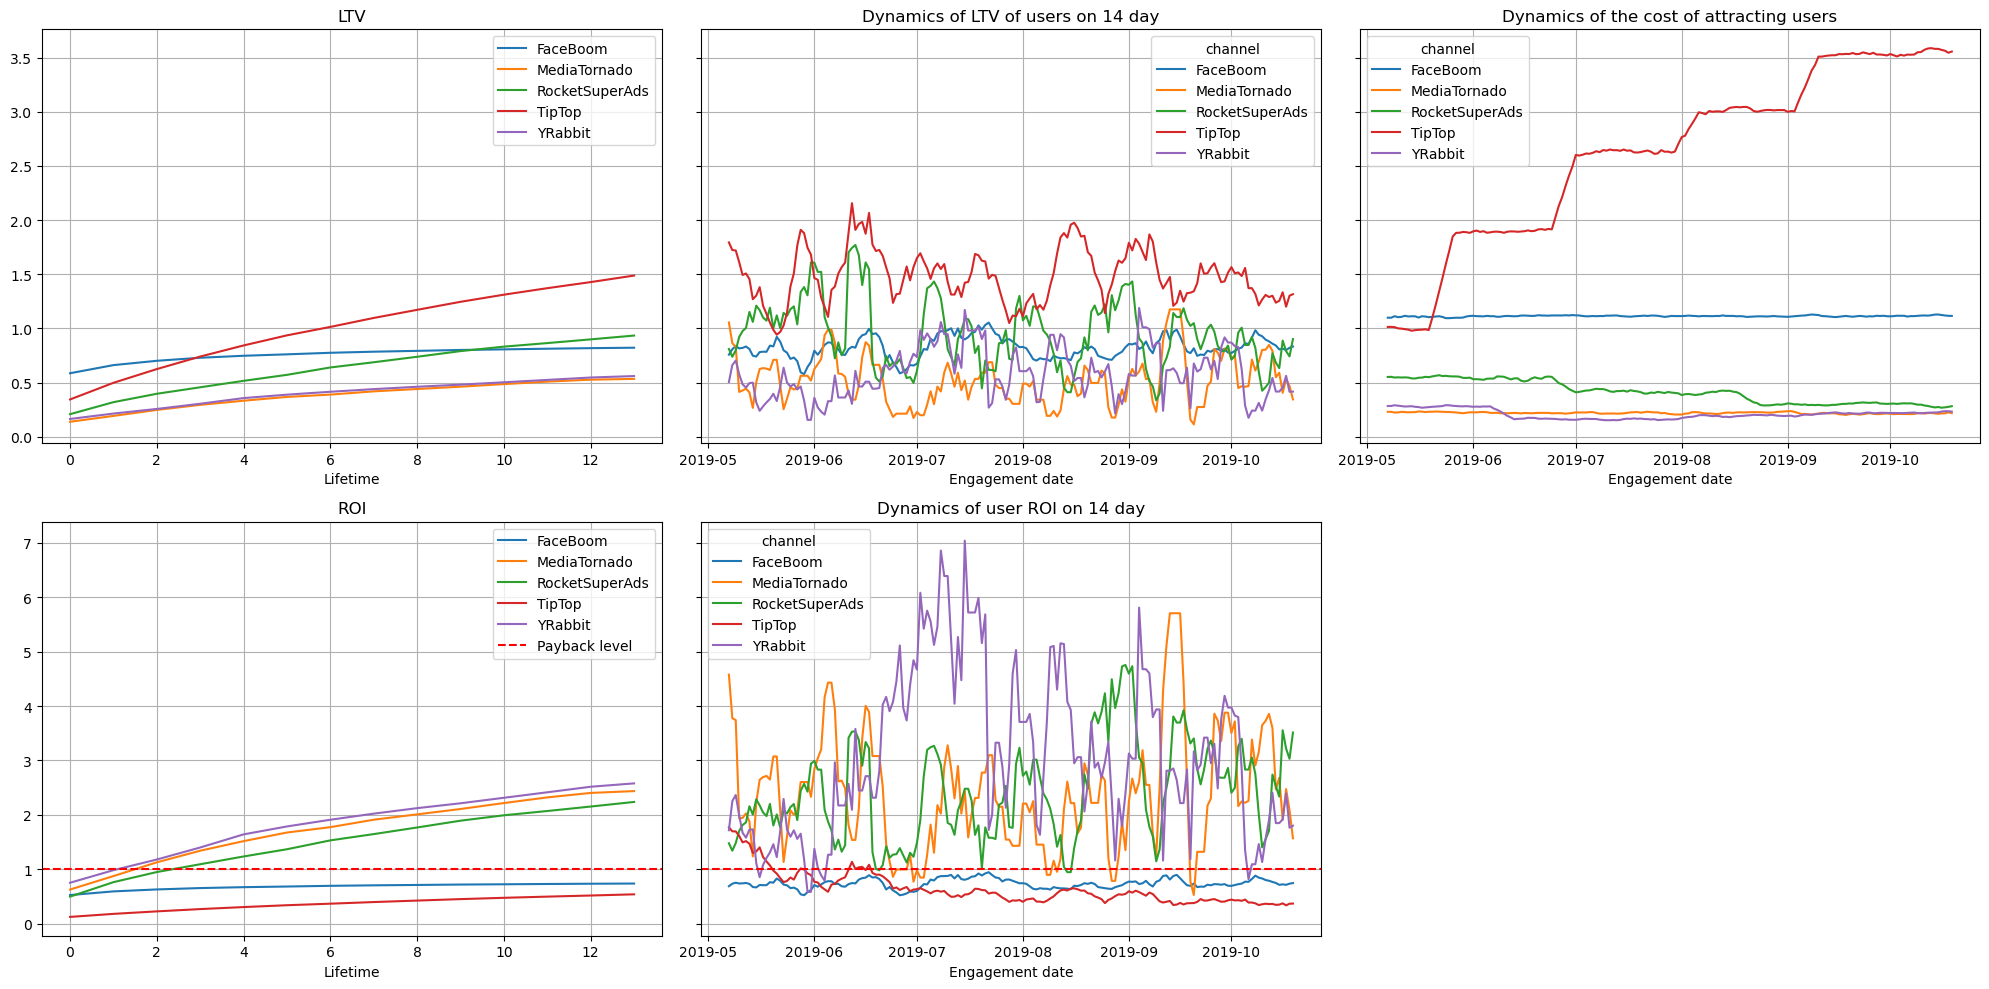

In [120]:
profiles_USA = profiles.query('region == "United States"')

dimensions = ['channel']

ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles_USA, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_ltv_roi(ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days)

It turns out that things may not be bad in the USA. YRabbit, MediaTornado, RocketSuperAds are cost-effective channels of attraction. The most important problem is TipTop and Faceboom. They must be abandoned. Again, we see that LTV of TipTop is misleading, the huge costs for this channel play a decisive role.

##### Let's look at the retention of advertising in the United States from profitable channels

In [121]:
profiles_USA_best_roi = (profiles
.query('region == "United States" and channel in ["YRabbit", "MediaTornado", "RocketSuperAds"]'))

retention_raw, retention_grouped, retention_history  = get_retention(
    profiles_USA_best_roi,
    visits,
    observation_date,
    horizon_days,
    dimensions=['channel'],
    ignore_horizon=False,
)

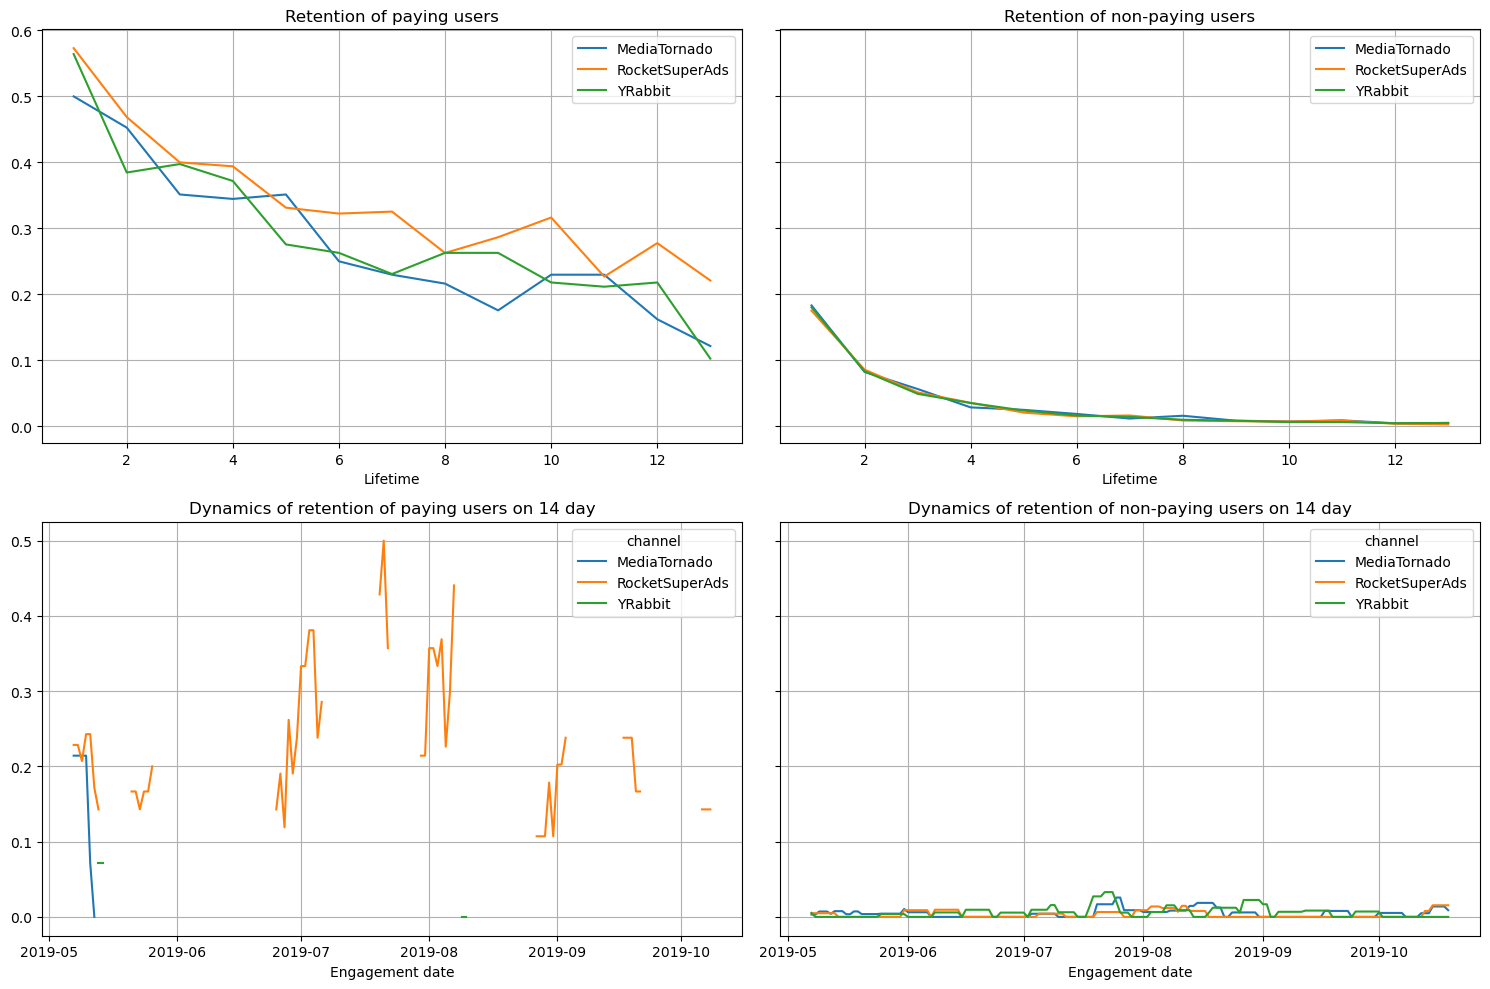

In [122]:
plot_retention(retention_grouped, retention_history, horizon_days) 

At the end of the second week, the retention of paying users at RocketSuperAds is about 2 times higher than at YRabbit, MediaTornado. Let's see what's going on with the conversion.

##### Let's look at the conversion of advertising in the USA from profitable channels

In [123]:
profiles_USA_best_roi = (profiles
        .query('region == "United States" and channel in ["YRabbit", "MediaTornado", "RocketSuperAds"]'))

conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles_USA_best_roi,
    orders,
    observation_date,
    horizon_days,
    dimensions=['channel'],
    ignore_horizon=False)

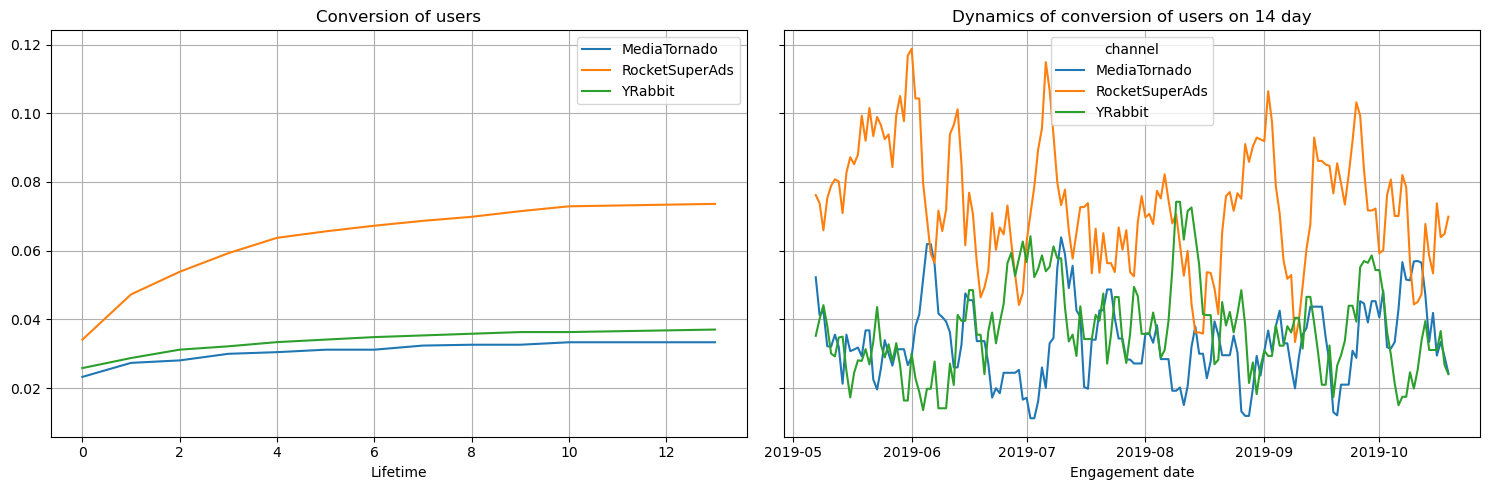

In [124]:
plot_conversion(conversion_grouped, conversion_history, horizon_days) 

To our delight, there is a clear leader and this is "RocketSuperAds", which has a higher retention rate. And the conversion rate is better in dynamics. The conversion rate of "RocketSuperAds" is about 2 times higher than that of competitors.
Based on this, we can say that the best choice of an advertising source in the USA is "RocketSuperAds".

#### Let's look at cost-effective channels of attraction in the USA and not in the USA, taking into account devices

##### ROI of cost-effective channels in Europe

In [125]:
dimensions = ['device']

ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles_not_USA_best_roi, orders, observation_date, horizon_days, dimensions=dimensions
)

roi_grouped = roi_grouped.drop(columns=['cohort_size', 'cac'])

roi_history = roi_history.drop(columns=['cohort_size', 'cac'])

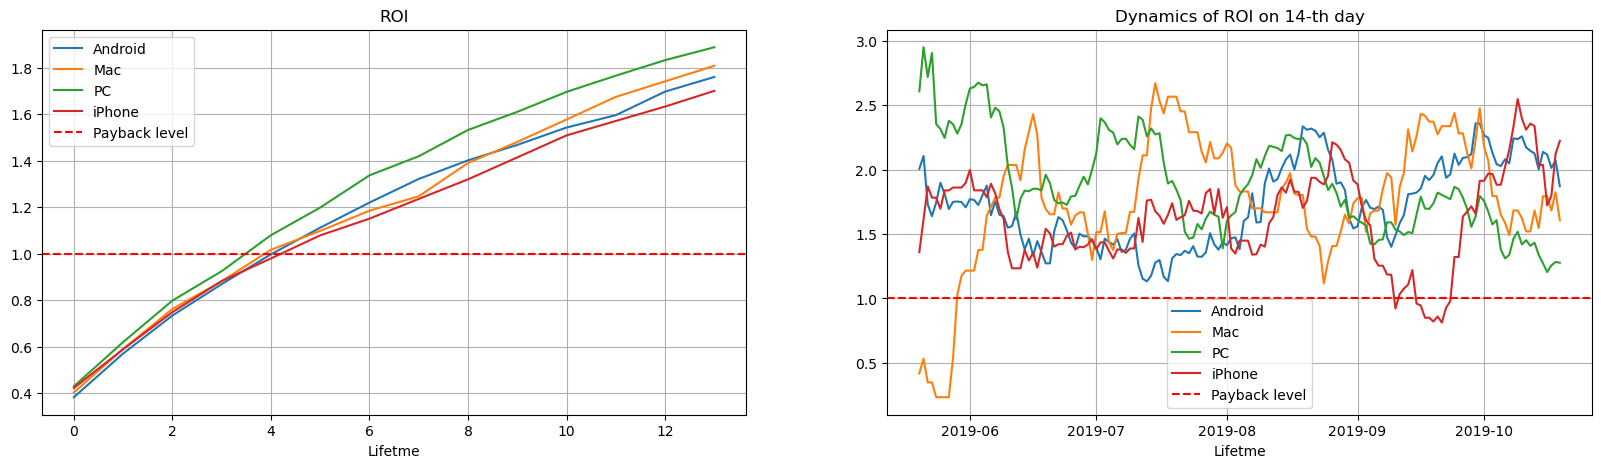

In [126]:
plt.figure(figsize=(20, 5))

ax1 = plt.subplot(1, 2, 1)
roi_grouped.T.plot(grid=True, ax=ax1)
plt.axhline(y=1, color='red', linestyle='--', label='Payback level')
plt.legend()
plt.xlabel('Lifetme')
plt.title('ROI')

ax2 = plt.subplot(1, 2, 2)
columns = [name for name in roi_history.index.names if name not in ['dt']]
roi_history = roi_history.pivot_table(
    index='dt', columns=columns, values=13, aggfunc='mean')
filter_data(roi_history, 20).plot(grid=True, ax=ax2)    
plt.axhline(y=1, color='red', linestyle='--', label='Payback level')
plt.legend()
plt.xlabel('Lifetme')
plt.title('Dynamics of ROI on 14-th day')

plt.show()

The best users who come from these sources use PC and Mac. But the overall ROI is close enough for all devices. Based on the dynamics of ROI, we can say that users with Mac and iPhone are sometimes unprofitable.

##### Conversion and retention in Europe by devices for cost-effective channels

In [127]:
conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles_not_USA_best_roi,
    orders,
    observation_date,
    horizon_days,
    dimensions=['device'],
    ignore_horizon=False)

#conversion_raw.head()

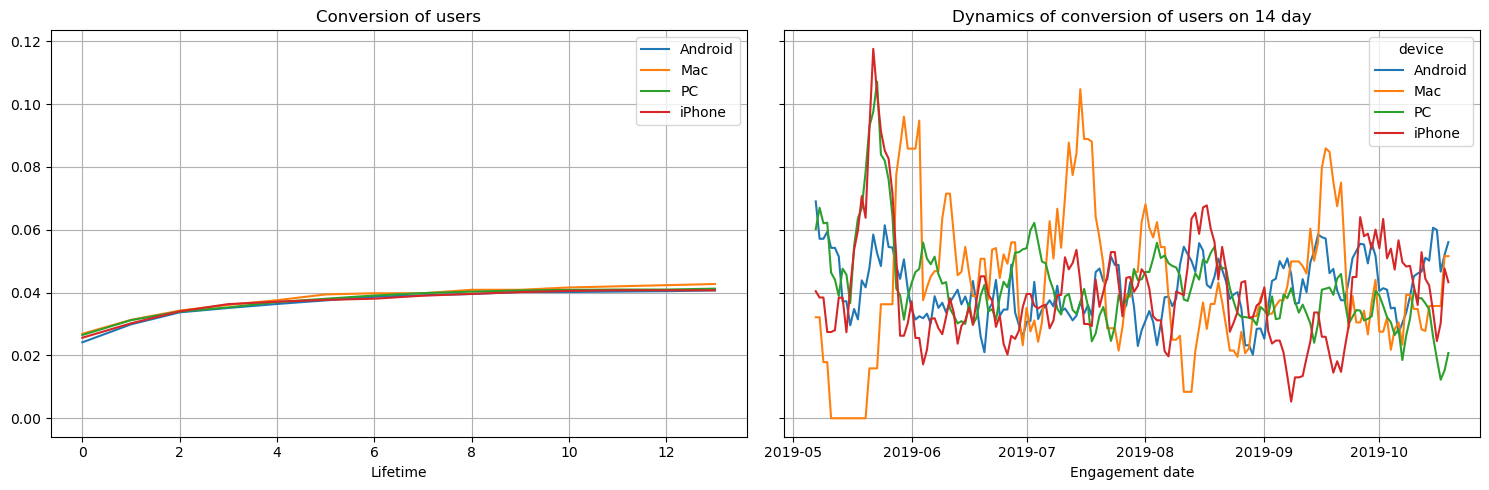

In [128]:
plot_conversion(conversion_grouped, conversion_history, horizon_days) 

The conversion rate in Europe is the same for all devices for cost-effective channels.

In [129]:
retention_raw, retention_grouped, retention_history  = get_retention(
    profiles_not_USA_best_roi,
    visits,
    observation_date,
    horizon_days,
    dimensions=['device'],
    ignore_horizon=False,
)

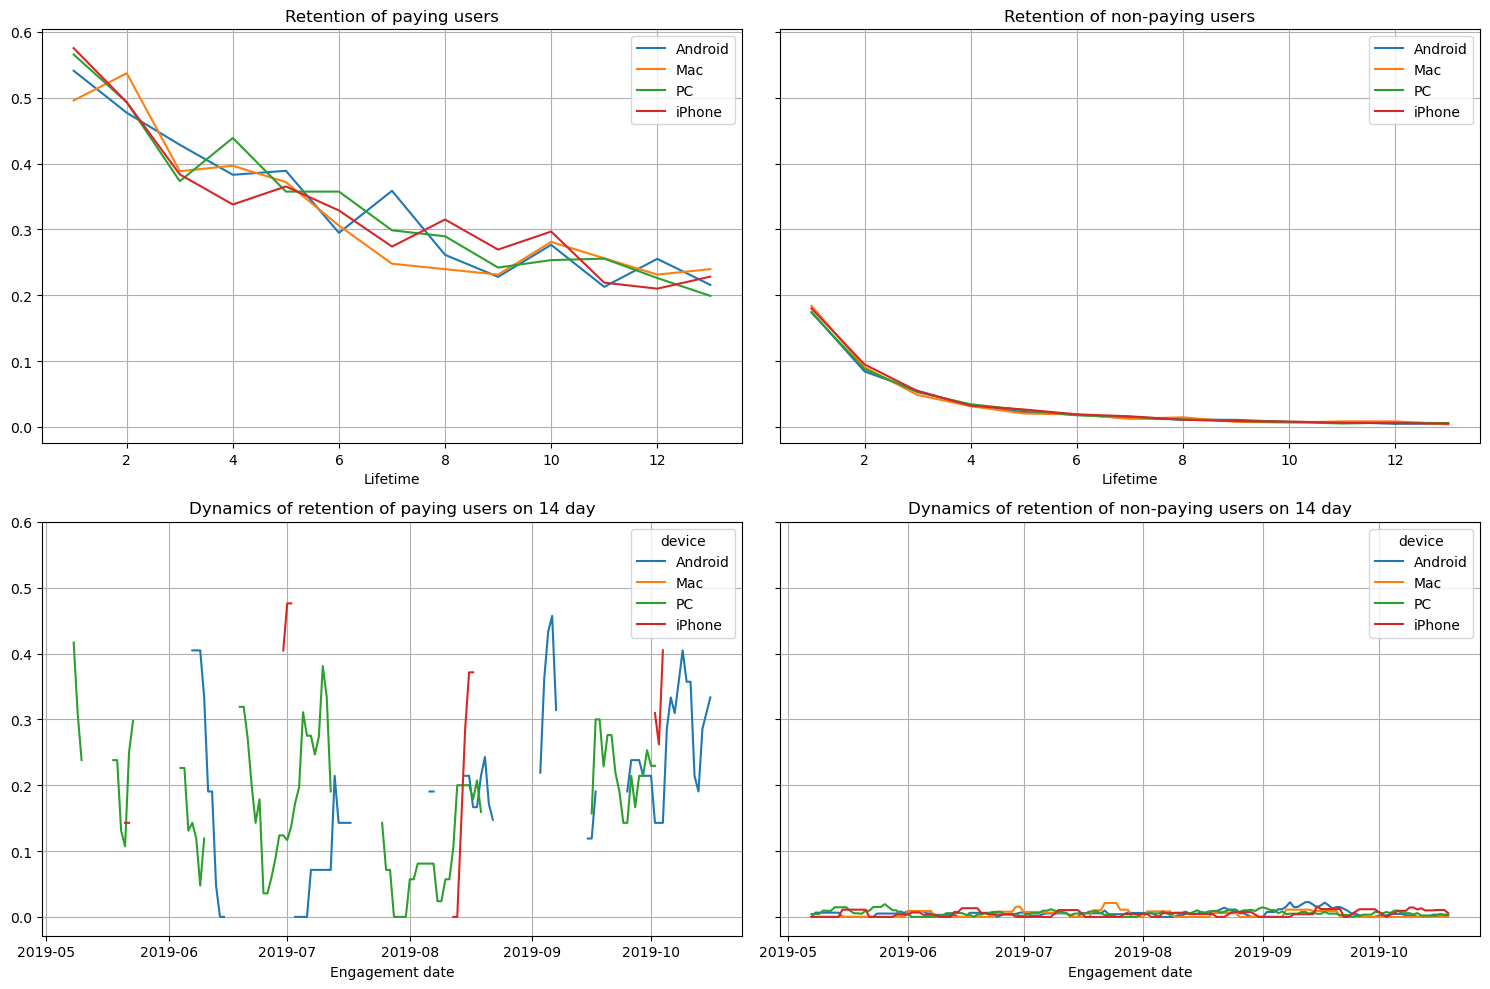

In [130]:
plot_retention(retention_grouped, retention_history, horizon_days) 

Retention as well as conversion in Europe are very close.

##### ROI of profitable channels in the USA

In [131]:
dimensions = ['device']

ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles_USA_best_roi, orders, observation_date, horizon_days, dimensions=dimensions
)

roi_grouped = roi_grouped.drop(columns=['cohort_size', 'cac'])

roi_history = roi_history.drop(columns=['cohort_size', 'cac'])

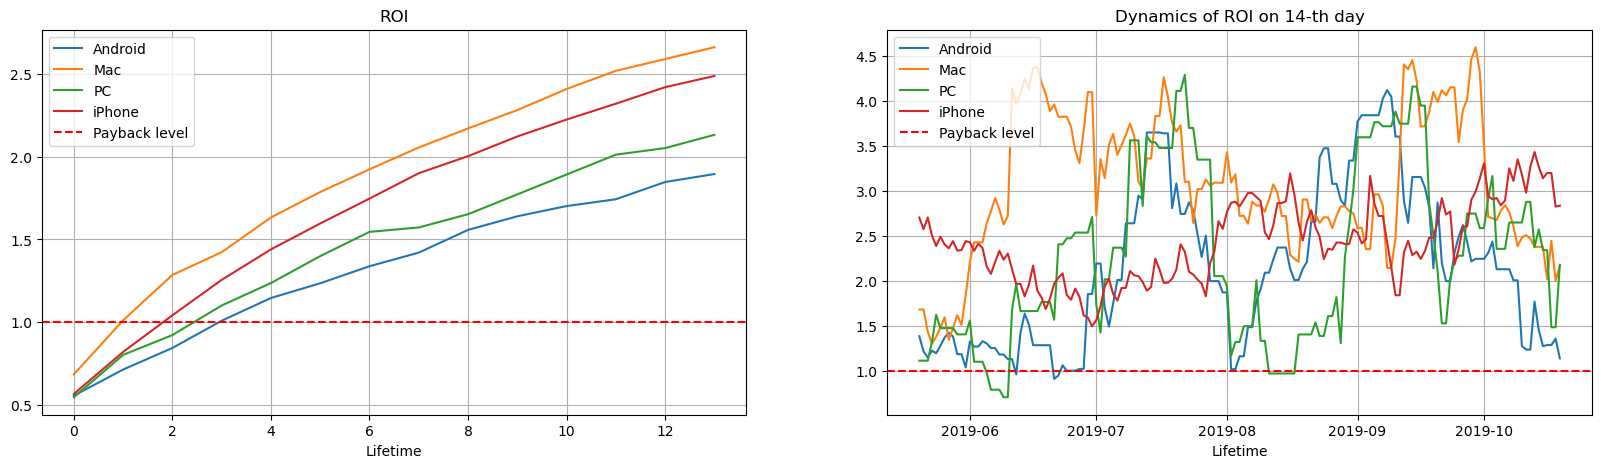

In [132]:
plt.figure(figsize=(20, 5))

ax1 = plt.subplot(1, 2, 1)
roi_grouped.T.plot(grid=True, ax=ax1)
plt.axhline(y=1, color='red', linestyle='--', label='Payback level')
plt.legend()
plt.xlabel('Lifetime')
plt.title('ROI')

ax2 = plt.subplot(1, 2, 2)
columns = [name for name in roi_history.index.names if name not in ['dt']]
roi_history = roi_history.pivot_table(
    index='dt', columns=columns, values=13, aggfunc='mean')
filter_data(roi_history, 20).plot(grid=True, ax=ax2)    
plt.axhline(y=1, color='red', linestyle='--', label='Payback level')
plt.legend()
plt.xlabel('Lifetime')
plt.title('Dynamics of ROI on 14-th day')

plt.show()

The best users who come from cost-effective sources use iPhones and Macs. The dynamics of ROI suggests that recently all advertising companies have been profitable, but the iPhone has more stable results.

It can be seen that the dynamics of the ROI of the 14th day decreases throughout October for all devices except the iPhone. The dynamics graph shows strong fluctuations, and this may be seasonality. We also set the parameter 20 for the moving average to smooth out fluctuations, this can also affect, then the ROI recovery will be noticeably later.

Let's look at the conversion rates for the same profiles. We will calculate the conversion dynamics with a period of 7 at the moving average.

##### Conversion and retention in the USA by device for cost-effective channels

In [133]:
conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles_USA_best_roi,
    orders,
    observation_date,
    horizon_days,
    dimensions=['device'],
    ignore_horizon=False)

#conversion_raw.head()

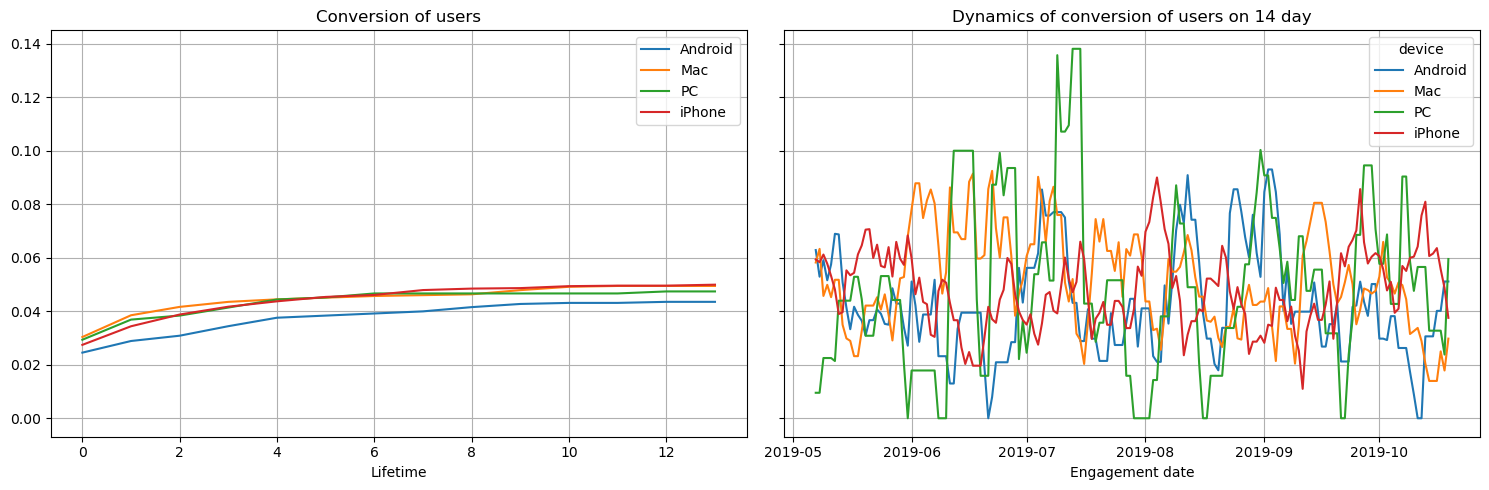

In [134]:
plot_conversion(conversion_grouped, conversion_history, horizon_days) 

Conversions are very similar, it can be noted that the iPhone also shows a more stable dynamics of the 14th day.

In [135]:
profiles_USA_best_roi = (profiles
        .query('region == "United States" and channel in ["YRabbit", "MediaTornado", "RocketSuperAds"]'))

retention_raw, retention_grouped, retention_history  = get_retention(
    profiles_USA_best_roi,
    visits,
    observation_date,
    horizon_days,
    dimensions=['device'],
    ignore_horizon=False,
)

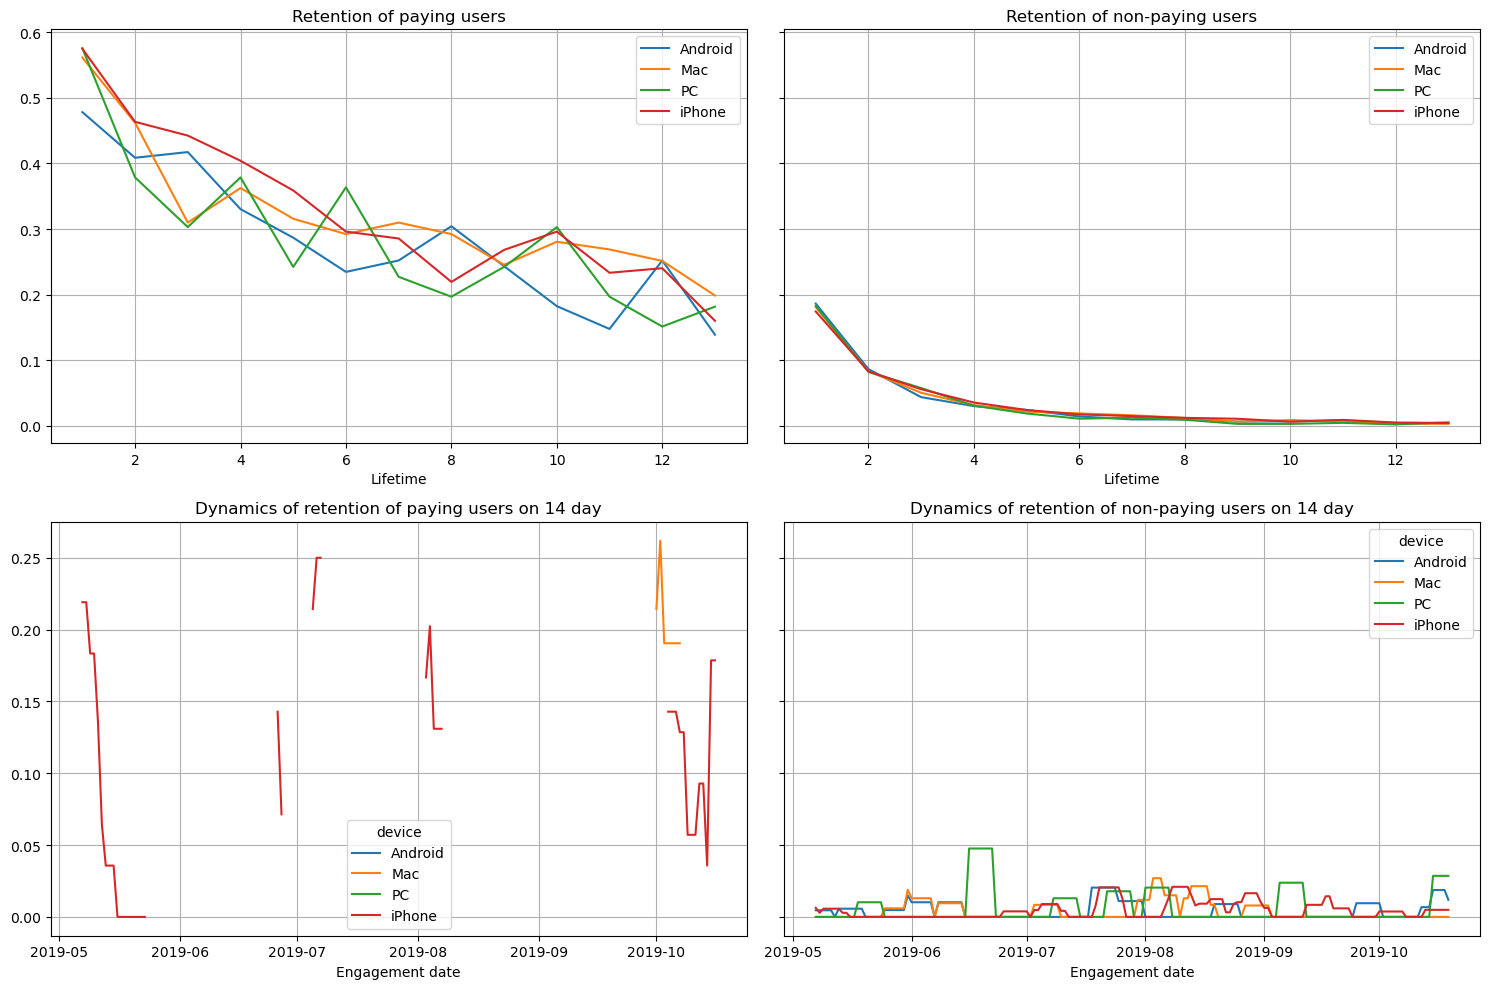

In [136]:
plot_retention(retention_grouped, retention_history, horizon_days) 

But in retention the dynamics of October is bad. There is a downward trend across all devices. Subsequently, this can greatly reduce the LTV, and hence the ROI.

#### Let's study the conversion and retention of channels in the USA

To do this, let's look at the conversion and retention across all US channels, and see how unprofitable "TipTop", "FaceBoom" look against the general background.

In [137]:
profiles_USA = (profiles
        .query('region == "United States"'))

conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles_USA,
    orders,
    observation_date,
    horizon_days,
    dimensions=['channel'],
    ignore_horizon=False)

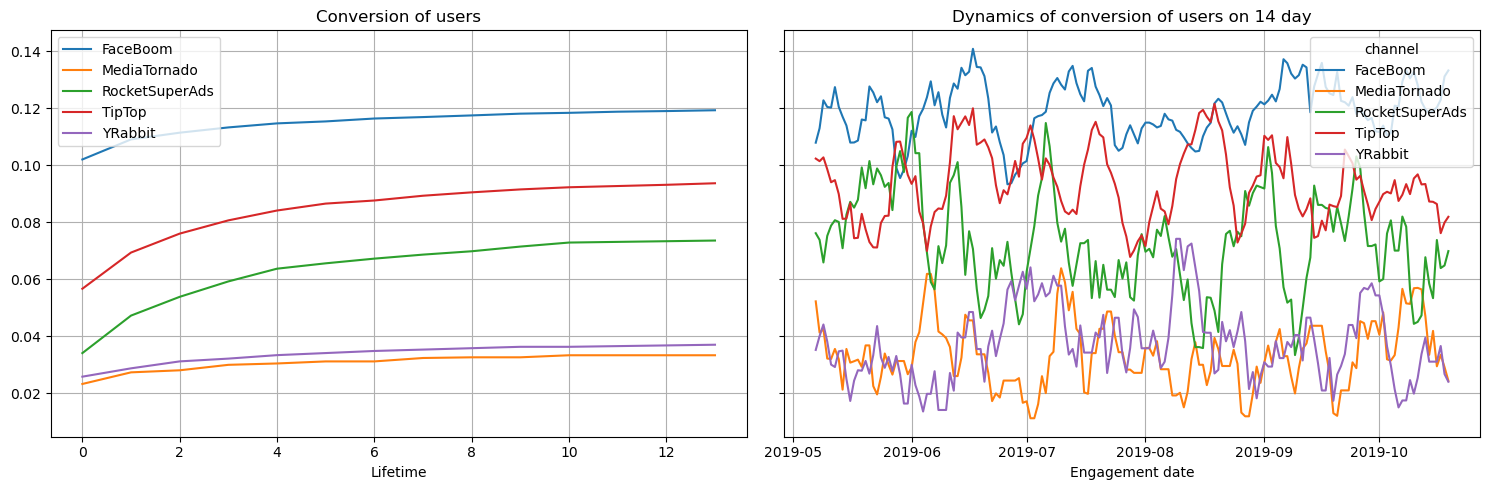

In [138]:
plot_conversion(conversion_grouped, conversion_history, horizon_days) 

The conversion rate is higher than all of the two unprofitable channels: "TipTop", "Faceboom".

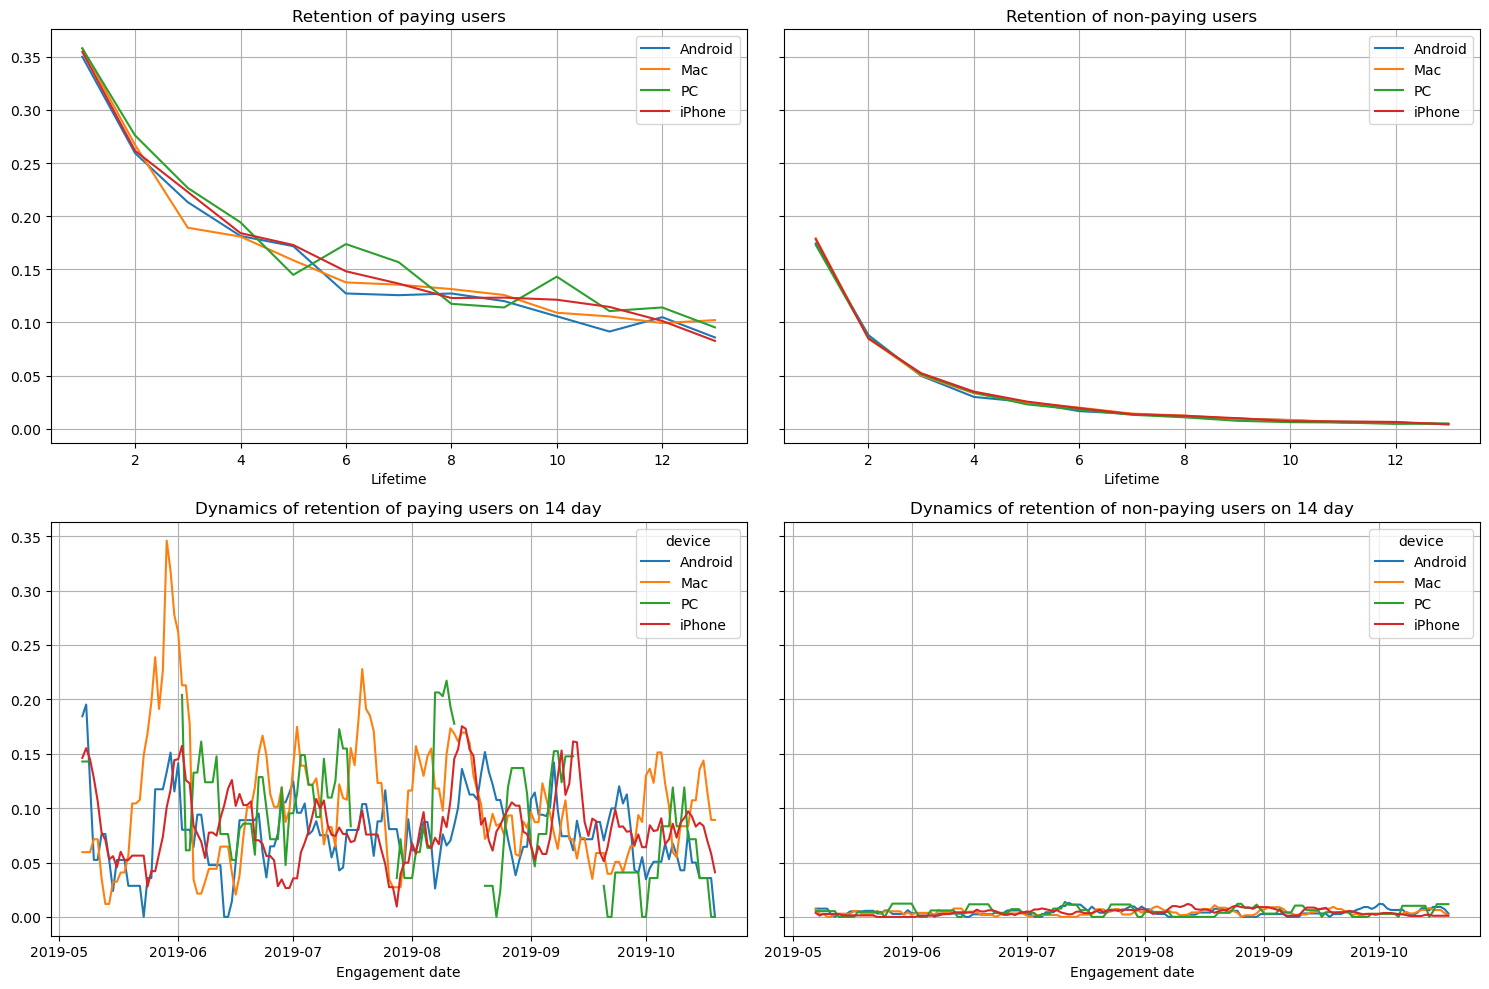

In [139]:
retention_raw, retention_grouped, retention_history  = get_retention(
    profiles_USA,
    visits,
    observation_date,
    horizon_days,
    dimensions=['device'],
    ignore_horizon=False,
)

plot_retention(retention_grouped, retention_history, horizon_days) 

The retention of all channels of attraction in the USA is very close.
Accordingly, we draw a general conclusion from the channels of attraction in the United States that the main problem of unprofitable channels is the high cost. Since retention and conversion are no worse than in other regions.

#### Let's study the conversion and retention of unprofitable channels in Europe

In [140]:
profiles_EU = (profiles
        .query('region != "United States"'))

conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles_EU,
    orders,
    observation_date,
    horizon_days,
    dimensions=['channel'],
    ignore_horizon=False)

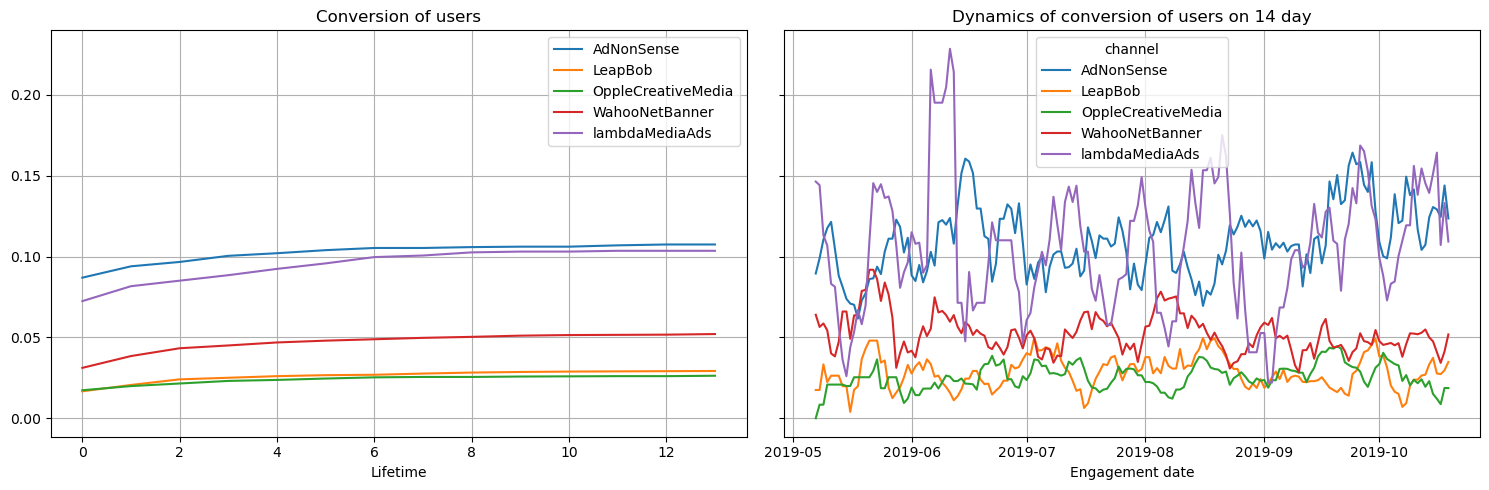

In [141]:
plot_conversion(conversion_grouped, conversion_history, horizon_days) 

The non-paying "AdNonSense" has the highest conversion rate. But it doesn't help.

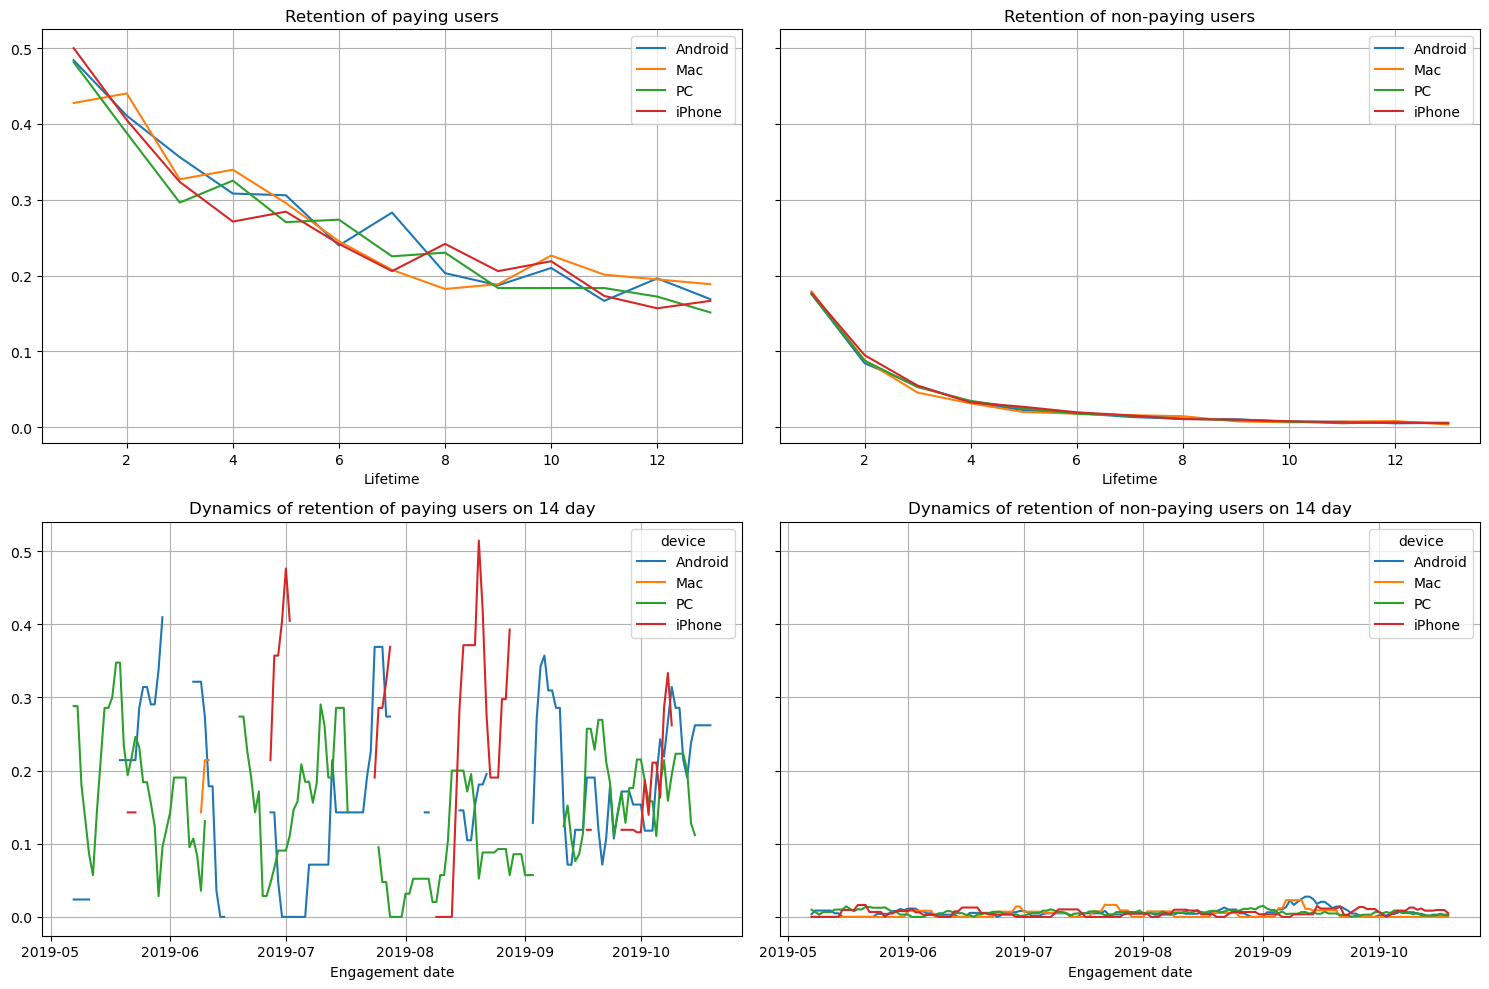

In [142]:
retention_raw, retention_grouped, retention_history  = get_retention(
    profiles_EU,
    visits,
    observation_date,
    horizon_days,
    dimensions=dimensions,
    ignore_horizon=False,
)

plot_retention(retention_grouped, retention_history, horizon_days)

But the retention of "AdNonSense" is catastrophically small. This is an additional reason for its unprofitability along with high user costs.

#### Conclusion on section 5

* In general, the advertising campaign for the period from May to October is unprofitable. LTV is stagnating in dynamics, and costs are rising. Therefore, the ROI is less than 1.

* The conversion of users as a whole, without grouping by dates and other signs, after the 6th lifetime (end of 1 week) noticeably slows down growth. It is quite low - 8% of users become buyers within 2 weeks. There is still a lot of room for growth. In dynamics, the conversion rate on the 14th day is approximately at the same level. Again, we see that an increase in advertising costs does not lead to an increase in conversion. If we work on the conversion, we can improve LTV.

* Only 10% of paying users continue to log in to the app on the 10th day after the first login. At the same time, retention does not grow in dynamics, as well as conversion. That is, it is necessary to change advertising in favor of those profitable channels and devices where retention and conversion are growing in dynamics

* The cost of advertising is a key factor in reducing profitability, and it is necessary to move away from expensive and unprofitable advertising channels. 

* The cost of advertising expenses per user using a PC is the lowest. Only this device showed an ROI above 1 in total for the period under review from May to October.

* The conversion rate is the best for Mac and iPhone. But only the PC pays off. If you find suitable advertising channels for Mac and iPhone, as well as find the right countries where advertising works, then you can significantly improve the indicators. This is also important because the iPhone is the most popular device among users.


* Broken down by country, only the USA has an ROI below 1. Again, due to the fact that the cost of advertising in this country is the highest.
The ROI of the other countries are close.

* Retention of paying users in the USA is the smallest. The rest of the countries are comparable. For non-paying users, the retention in all countries is almost the same.
Retention of US users is important, as this country accounts for the largest share of customers.

* The conversion rate of users from the USA is the highest. It remains only to raise the retention and with a high conversion it will be possible to increase revenue.

* Advertising for users in Europe pays off best for PC. For profitable advertising channels in Europe, retention and conversion for all devices are almost the same, so you can not be afraid to invest in such advertising for PC.

* For cost-effective US channels, Mac and iPhone have the best ROI. At the same time, retention and conversion are comparable across all devices for cost-effective channels in the USA.

* Advertising in "AdNonSense", "Faceboom", "TipTop" does not pay off. These channels have the highest cost of attracting a single client.

* In Europe, the channels "lambdaMediaAds", "LeapBob", "OppleCreativeMedia" and "WahooNetBanner" are profitable.

* Among cost-effective channels in Europe, "lambdaMediaAds" has the best conversion, retention is comparable for all channels. Therefore, for European countries it is better to choose "lambdaMediaAds".

* In European countries, only the "AdNonSense" Channel does not pay off due to the lowest retention among all channels and high user costs.

* In the USA, "YRabbit", "MediaTornado", "RocketSuperAds" are profitable channels of attraction. 

* Among the cost-effective sources of users in the USA, "RocketSuperAds" is the best. It has the best conversion and retention.

* The most important problem in the USA is "TipTop" and "Faceboom", they are unprofitable.

* At the same time, "TipTop" and "Faceboom" in the USA have the best conversion and the same retention as other channels. Therefore, user costs are a key negative factor.

* For cost-effective channels in Europe, the best ROI is shown by PC and Mac. Conversions and retention by device are similar.

* For cost-effective channels in the USA, the best ROI is shown by iPhone and Mac. Conversions and retention by device are similar.

### Final conclusions

- The reasons for the inefficiency of attracting users.
- Recommendations for the marketing department.

In general, the advertising campaign is unprofitable. 
There are two weak areas:
* The USA is the only country where an advertising campaign is completely unprofitable. 
At the same time, the USA accounts for approximately 65% of all users. Therefore, the US indicators drag down the entire campaign. 
The main reason for the unprofitability of the campaign in the USA is the advertising channels "TipTop" and "Faceboom". 
At the same time, "TipTop" and "Faceboom" in the USA have the best conversion and the same retention as other channels. 
But the user costs of these channels are growing regularly and are the largest among all sources. Therefore, expenses are a key negative factor.
* Total loss of the main advertising channels.\
Advertising in "AdNonSense", "FaceBoom", "TipTop" does not pay off. Together, these channels account for 86% of all advertising expenses. And FaceBoom and TipTop account for about 82% in total. 
"FaceBoom" and "TipTop" are used only in the USA. And the key reason for their unprofitability has already been announced - a high CAC.
"AdNonSense" is used only in Europe. This is the only advertising channel in Europe that does not pay off. This is due to the lowest retention among all channels and high user costs.


**The analysis allows us to give advice on improving advertising in the USA and Europe.**\
**In the USA:**
* In the USA, "YRabbit", "MediaTornado", "RocketSuperAds" are profitable channels of attraction.
Among the cost-effective sources of users in the USA, "RocketSuperAds" is the best. It has the best conversion and retention.

* For cost-effective channels in the USA, the best ROI is shown by iPhone and Mac. Conversions and retention by device are similar. Moreover, in the grouping by devices without additional filters, the conversion is the best for Mac and iPhone. These devices pull up the total conversion in the USA. Considering all this, we can safely focus on these devices in advertising in the United States in profitable channels.

**In Europe:**
* In Europe, the channels "lambdaMediaAds", "LeapBob", "OppleCreativeMedia" and "WahooNetBanner" are profitable. 
Among the cost-effective channels in Europe, "lambdaMediaAds" has the best conversion, the retention of all channels is comparable. Therefore, for European countries it is better to choose "lambdaMediaAds".
* For cost-effective channels in Europe, the best ROI is shown by PC and Mac. Conversions and retention across all devices in Europe are similar. Therefore, we can safely focus on advertising on PC and Mac in Europe.